In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('SampleSubmission.csv')
var = pd.read_csv('VariableDescription.csv')

In [4]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


In [5]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,9,11802,P,99,0,6306,8,2,2,2,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id0
1,255,2713,C,99,0,4409,4,2,2,2,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1
2,201,152,M,22,0,3603,4,2,2,2,...,2016,67871456.0,0.0,0.0,12093451.0,NaN,NaN,NaN,NaN,test_id2
3,302,7698,M,22,0,4203,4,2,2,2,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3
4,152,544,P,99,0,6307,4,2,2,2,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id4


In [6]:
print(train.shape)
print(test.shape)

(25053, 121)
(10738, 120)


In [7]:
sample.head()

,id,target
0,test_id0,2
1,test_id1,0
2,test_id2,2
3,test_id3,1
4,test_id4,2


In [8]:
id = test[['id']]

In [9]:
id.shape

(10738, 1)

In [10]:
# missing_data = train.isnull()
# for col in missing_data.columns.values.tolist():
#     print(col)
#     print(missing_data[col].value_counts())

In [11]:
train.dropna(thresh = train.shape[0]*0.6, axis = 1, inplace = True)
test.dropna(thresh = test.shape[0]*0.6, axis = 1, inplace = True)

In [12]:
print(train.shape)
print(test.shape)

(25053, 91)
(10738, 90)


In [13]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,49,14185,P,99,1,6101,4,2,2,2,...,0.0,0.0,0.0,58912000.0,0.0,2530630.0,0.0,2013,13.575957,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,0.0,0.0,0.0,3425295.0,0.0,10924985.0,0.0,2013,11.692894,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2015,0.000000,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2015,16.237871,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,0.0,0.0,0.0,21604529.0,0.0,0.0,0.0,2015,13.399983,train_id4


In [14]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA072018,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,id
0,9,11802,P,99,0,6306,8,2,2,2,...,0.0,0.0,0.0,0.0,14283733.0,0.0,0.0,2.546400e+06,2015,test_id0
1,255,2713,C,99,0,4409,4,2,2,2,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,test_id1
2,201,152,M,22,0,3603,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.109489e+09,2016,test_id2
3,302,7698,M,22,0,4203,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.115383e+08,2013,test_id3
4,152,544,P,99,0,6307,4,2,2,2,...,0.0,0.0,0.0,0.0,7204844.0,0.0,0.0,0.000000e+00,2013,test_id4


In [15]:
train['CTR_CATEGO_X'].value_counts()

M    12809
C     6835
P     5398
N       11
Name: CTR_CATEGO_X, dtype: int64

In [16]:
test['CTR_CATEGO_X'].value_counts()

M    5622
C    2807
P    2309
Name: CTR_CATEGO_X, dtype: int64

In [17]:
dropper = train[train['CTR_CATEGO_X'] == 'N']

In [18]:
dropper.index

Int64Index([883, 2012, 2620, 4314, 11843, 16559, 17014, 18485, 19294, 19472,
            23361],
           dtype='int64')

In [19]:
train.drop(dropper.index, axis = 0, inplace = True)

In [20]:
print(train.shape)
print(test.shape)

(25042, 91)
(10738, 90)


In [21]:
col1 = train.columns
col2 = test.columns

In [22]:
train = train.fillna(-999)
test = test.fillna(-999)

In [23]:
train['id'] = train['id'].map(train['id'].value_counts())

test['id'] = test['id'].map(test['id'].value_counts())

In [24]:
# from sklearn.preprocessing import LabelEncoder

In [25]:
# le = LabelEncoder()

In [26]:
# train['EXE_EXERCI'] = le.fit_transform(train['EXE_EXERCI'])

In [27]:
# train['RES_ANNIMP'] = le.fit_transform(train['RES_ANNIMP'])

In [28]:
cat = pd.get_dummies(train['CTR_CATEGO_X'])

In [29]:
cat2 = pd.get_dummies(test['CTR_CATEGO_X'])

In [30]:
cat2

,C,M,P
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
10733,1,0,0
10734,0,1,0
10735,0,1,0
10736,0,1,0


In [31]:
train = pd.concat([train, cat], axis = 1)

In [32]:
test = pd.concat([test, cat2], axis = 1)

In [33]:
data = train.drop(['target', 'CTR_CATEGO_X'], axis = 1)

In [34]:
test.drop(['CTR_CATEGO_X'], axis = 1, inplace = True)

In [35]:
target = train['target']

In [36]:
print(data.shape)
print(target.shape)

(25042, 92)
(25042,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [39]:
cat = CatBoostRegressor(iterations = 50, depth = 3, learning_rate = 0.1, loss_function = 'RMSE')

In [40]:
cat.fit(X_train, y_train,eval_set = (X_test, y_test), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6.9504433	test: 7.0043594	best: 7.0043594 (0)	total: 71.6ms	remaining: 3.51s
1:	learn: 6.8487065	test: 6.9012750	best: 6.9012750 (1)	total: 83.6ms	remaining: 2s
2:	learn: 6.7653739	test: 6.8180721	best: 6.8180721 (2)	total: 98ms	remaining: 1.53s
3:	learn: 6.7032621	test: 6.7532159	best: 6.7532159 (3)	total: 110ms	remaining: 1.26s
4:	learn: 6.6484460	test: 6.6966128	best: 6.6966128 (4)	total: 122ms	remaining: 1.09s
5:	learn: 6.5958107	test: 6.6440320	best: 6.6440320 (5)	total: 139ms	remaining: 1.02s
6:	learn: 6.5521956	test: 6.5997909	best: 6.5997909 (6)	total: 151ms	remaining: 926ms
7:	learn: 6.5192262	test: 6.5668115	best: 6.5668115 (7)	total: 162ms	remaining: 851ms
8:	learn: 6.4921153	test: 6.5389490	best: 6.5389490 (8)	total: 174ms	remaining: 792ms
9:	learn: 6.4704330	test: 6.5162101	best: 6.5162101 (9)	total: 186ms	remaining: 742ms
10:	learn: 6.4489376	test: 6.4941215	best: 6.4941215 (10)	total: 196ms	remaining: 696ms
11:	learn: 6.4303299	test: 6.4761705	best: 6.4761705 (

In [41]:
cat.score(X_test, y_test)

0.23265274044887596

In [42]:
features = [c for c in data.columns if c not in ['target']]

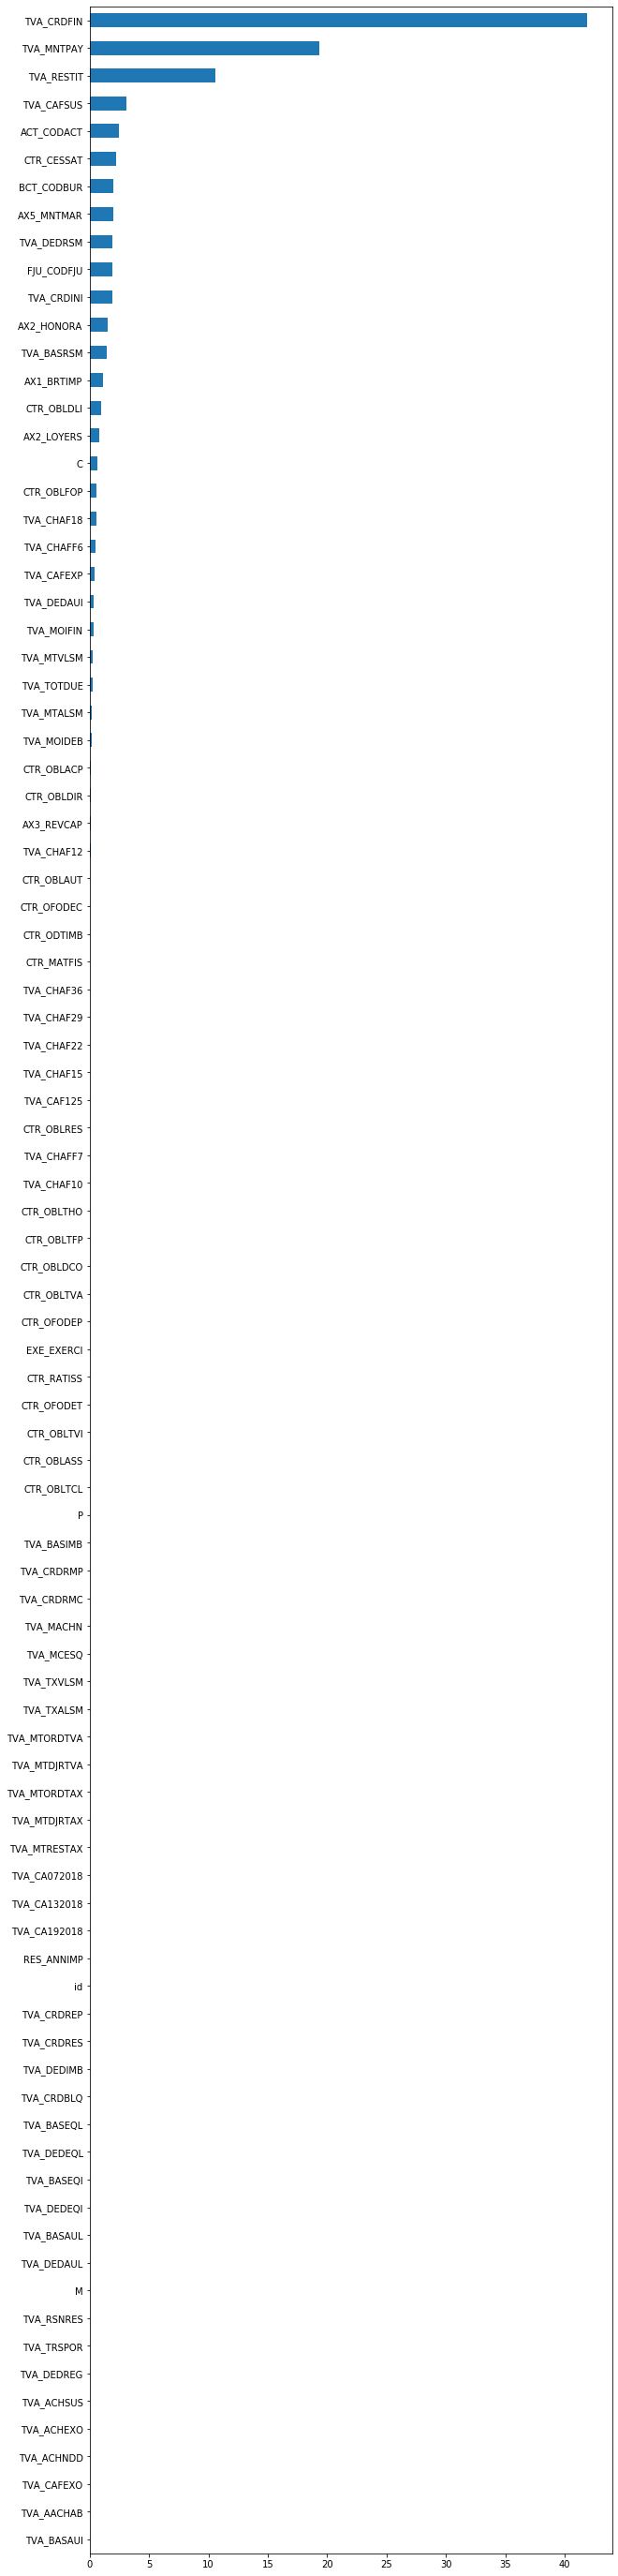

In [43]:
fi = pd.Series(index=features, data= cat.feature_importances_)
_ = plt.figure(figsize=(10, 50))
_ = fi.sort_values().plot(kind='barh')

In [44]:
fi_df = pd.DataFrame(index=features, data=cat.feature_importances_)

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [45]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [46]:
fi_df.tail(60)

,cols,imp
12,CTR_OFODEC,0.031176
73,TVA_TXALSM,0.000000
64,TVA_CRDRES,0.000000
63,TVA_CRDBLQ,0.000000
62,TVA_AACHAB,0.000000
66,TVA_CRDREP,0.000000
67,TVA_CRDRMC,0.000000
68,TVA_MACHN,0.000000
69,TVA_MCESQ,0.000000
61,TVA_CAFEXO,0.000000


In [47]:
semi_useless = fi_df[fi_df['imp'] < 0.03]['cols'].to_list()

In [48]:
len(semi_useless)

59

In [49]:
data = data.drop(semi_useless,axis=1)
test = test.drop(semi_useless,axis=1)

In [50]:
lgb = LGBMRegressor(num_leaves=200, min_data_in_leaf=3,
                    objective='regression',
                    max_depth=-1,learning_rate=0.05, 
                    boosting_type='gbdt', 
                    feature_fraction=0.60,
                    lambda_l1=1,lambda_l2=1, 
                    metric='rmse', 
                    num_iterations=4000)

xgb = XGBRegressor(n_estimators = 5000, max_depth = 30, 
                     reg_lambda = 80,random_state = 30,
                     learning_rate=0.3, gamma = 1.5)

In [51]:
from sklearn.model_selection import KFold
max_iter = 15
kf = KFold(n_splits=max_iter,shuffle=False)

In [52]:
from sklearn.metrics import mean_squared_error as mse

In [53]:
lgb_scores = []
lgb_test_pred = np.zeros(len(test))
lgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(data)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = data.iloc[tr_in],data.iloc[te_in]
    y_train,y_test = target.iloc[tr_in],target.iloc[te_in]
    
    lgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    lgb_scores.append(np.sqrt(mse(y_test,lgb.predict(X_test))))
    
    lgb_train_pred += lgb.predict(data)
    lgb_test_pred += lgb.predict(test)

==================================Fold0=============================================


C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 6.96704	valid_1's rmse: 6.93066
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.86346	valid_1's rmse: 6.85186
[3]	training's rmse: 6.77756	valid_1's rmse: 6.79116
[4]	training's rmse: 6.70042	valid_1's rmse: 6.74242
[5]	training's rmse: 6.61852	valid_1's rmse: 6.68883
[6]	training's rmse: 6.536	valid_1's rmse: 6.63377
[7]	training's rmse: 6.46333	valid_1's rmse: 6.5873
[8]	training's rmse: 6.38984	valid_1's rmse: 6.54017
[9]	training's rmse: 6.32619	valid_1's rmse: 6.5021
[10]	training's rmse: 6.26892	valid_1's rmse: 6.46967
[11]	training's rmse: 6.21075	valid_1's rmse: 6.43577
[12]	training's rmse: 6.16317	valid_1's rmse: 6.40883
[13]	training's rmse: 6.11971	valid_1's rmse: 6.38621
[14]	training's rmse: 6.07224	valid_1's rmse: 6.36068
[15]	training's rmse: 6.01971	valid_1's rmse: 6.33152
[16]	training's rmse: 5.96871	valid_1's rmse: 6.31073
[17]	training's rmse: 5.91681	valid_1's rmse: 6.2818
[18]	training's rmse: 5.86889	vali

[158]	training's rmse: 3.80394	valid_1's rmse: 5.77057
[159]	training's rmse: 3.79634	valid_1's rmse: 5.77251
[160]	training's rmse: 3.78807	valid_1's rmse: 5.76996
[161]	training's rmse: 3.78211	valid_1's rmse: 5.7683
[162]	training's rmse: 3.77293	valid_1's rmse: 5.76608
[163]	training's rmse: 3.76497	valid_1's rmse: 5.76322
[164]	training's rmse: 3.75943	valid_1's rmse: 5.76401
[165]	training's rmse: 3.75039	valid_1's rmse: 5.7617
[166]	training's rmse: 3.74452	valid_1's rmse: 5.76106
[167]	training's rmse: 3.73592	valid_1's rmse: 5.76092
[168]	training's rmse: 3.72846	valid_1's rmse: 5.7602
[169]	training's rmse: 3.72144	valid_1's rmse: 5.75948
[170]	training's rmse: 3.71384	valid_1's rmse: 5.75805
[171]	training's rmse: 3.70768	valid_1's rmse: 5.75632
[172]	training's rmse: 3.70116	valid_1's rmse: 5.75548
[173]	training's rmse: 3.69509	valid_1's rmse: 5.7554
[174]	training's rmse: 3.68775	valid_1's rmse: 5.75466
[175]	training's rmse: 3.68155	valid_1's rmse: 5.75505
[176]	training

[309]	training's rmse: 2.99409	valid_1's rmse: 5.71016
[310]	training's rmse: 2.99055	valid_1's rmse: 5.70931
[311]	training's rmse: 2.98685	valid_1's rmse: 5.70844
[312]	training's rmse: 2.9826	valid_1's rmse: 5.70957
[313]	training's rmse: 2.97703	valid_1's rmse: 5.70941
[314]	training's rmse: 2.97273	valid_1's rmse: 5.70999
[315]	training's rmse: 2.96879	valid_1's rmse: 5.71055
[316]	training's rmse: 2.96515	valid_1's rmse: 5.70968
[317]	training's rmse: 2.96034	valid_1's rmse: 5.70917
[318]	training's rmse: 2.9578	valid_1's rmse: 5.70851
[319]	training's rmse: 2.95342	valid_1's rmse: 5.70868
[320]	training's rmse: 2.9499	valid_1's rmse: 5.70813
[321]	training's rmse: 2.94493	valid_1's rmse: 5.70687
[322]	training's rmse: 2.9399	valid_1's rmse: 5.70758
[323]	training's rmse: 2.93659	valid_1's rmse: 5.7073
[324]	training's rmse: 2.93374	valid_1's rmse: 5.70649
[325]	training's rmse: 2.92995	valid_1's rmse: 5.70668
[326]	training's rmse: 2.92762	valid_1's rmse: 5.70634
[327]	training'

[468]	training's rmse: 2.45081	valid_1's rmse: 5.68004
[469]	training's rmse: 2.44846	valid_1's rmse: 5.67965
[470]	training's rmse: 2.4454	valid_1's rmse: 5.67947
[471]	training's rmse: 2.44234	valid_1's rmse: 5.67908
[472]	training's rmse: 2.43983	valid_1's rmse: 5.67763
[473]	training's rmse: 2.43582	valid_1's rmse: 5.67769
[474]	training's rmse: 2.43273	valid_1's rmse: 5.67708
[475]	training's rmse: 2.43094	valid_1's rmse: 5.67704
[476]	training's rmse: 2.42773	valid_1's rmse: 5.67643
[477]	training's rmse: 2.42406	valid_1's rmse: 5.67601
[478]	training's rmse: 2.42196	valid_1's rmse: 5.67578
[479]	training's rmse: 2.41811	valid_1's rmse: 5.67415
[480]	training's rmse: 2.41449	valid_1's rmse: 5.67425
[481]	training's rmse: 2.41264	valid_1's rmse: 5.67358
[482]	training's rmse: 2.4094	valid_1's rmse: 5.67307
[483]	training's rmse: 2.40681	valid_1's rmse: 5.67355
[484]	training's rmse: 2.40315	valid_1's rmse: 5.67412
[485]	training's rmse: 2.40021	valid_1's rmse: 5.67464
[486]	traini

[622]	training's rmse: 2.05201	valid_1's rmse: 5.67172
[623]	training's rmse: 2.04917	valid_1's rmse: 5.67147
[624]	training's rmse: 2.04476	valid_1's rmse: 5.67167
[625]	training's rmse: 2.04115	valid_1's rmse: 5.67087
[626]	training's rmse: 2.03864	valid_1's rmse: 5.67034
[627]	training's rmse: 2.03686	valid_1's rmse: 5.67036
[628]	training's rmse: 2.03516	valid_1's rmse: 5.67107
[629]	training's rmse: 2.03289	valid_1's rmse: 5.67141
[630]	training's rmse: 2.02917	valid_1's rmse: 5.67143
[631]	training's rmse: 2.02752	valid_1's rmse: 5.67146
[632]	training's rmse: 2.02461	valid_1's rmse: 5.67124
[633]	training's rmse: 2.02163	valid_1's rmse: 5.67153
[634]	training's rmse: 2.01911	valid_1's rmse: 5.67192
[635]	training's rmse: 2.01713	valid_1's rmse: 5.67207
[636]	training's rmse: 2.0157	valid_1's rmse: 5.67207
[637]	training's rmse: 2.0142	valid_1's rmse: 5.67188
[638]	training's rmse: 2.01138	valid_1's rmse: 5.67144
[639]	training's rmse: 2.00832	valid_1's rmse: 5.67103
[640]	traini

[781]	training's rmse: 1.7447	valid_1's rmse: 5.66204
[782]	training's rmse: 1.74368	valid_1's rmse: 5.66181
[783]	training's rmse: 1.74288	valid_1's rmse: 5.66161
[784]	training's rmse: 1.74126	valid_1's rmse: 5.66171
[785]	training's rmse: 1.73965	valid_1's rmse: 5.66183
[786]	training's rmse: 1.7378	valid_1's rmse: 5.66213
[787]	training's rmse: 1.73632	valid_1's rmse: 5.66195
[788]	training's rmse: 1.73463	valid_1's rmse: 5.66212
[789]	training's rmse: 1.73213	valid_1's rmse: 5.66226
[790]	training's rmse: 1.73084	valid_1's rmse: 5.6623
[791]	training's rmse: 1.72941	valid_1's rmse: 5.66246
[792]	training's rmse: 1.72851	valid_1's rmse: 5.66213
[793]	training's rmse: 1.72781	valid_1's rmse: 5.66211
[794]	training's rmse: 1.72612	valid_1's rmse: 5.66199
[795]	training's rmse: 1.72361	valid_1's rmse: 5.66215
[796]	training's rmse: 1.7225	valid_1's rmse: 5.66215
[797]	training's rmse: 1.72101	valid_1's rmse: 5.66213
[798]	training's rmse: 1.72018	valid_1's rmse: 5.66234
[799]	training

[936]	training's rmse: 1.5421	valid_1's rmse: 5.663
[937]	training's rmse: 1.54048	valid_1's rmse: 5.66294
[938]	training's rmse: 1.53841	valid_1's rmse: 5.6631
[939]	training's rmse: 1.53734	valid_1's rmse: 5.6632
[940]	training's rmse: 1.53569	valid_1's rmse: 5.66319
[941]	training's rmse: 1.53411	valid_1's rmse: 5.66323
[942]	training's rmse: 1.53295	valid_1's rmse: 5.66332
[943]	training's rmse: 1.53121	valid_1's rmse: 5.6632
[944]	training's rmse: 1.53033	valid_1's rmse: 5.66324
[945]	training's rmse: 1.52928	valid_1's rmse: 5.66323
[946]	training's rmse: 1.52656	valid_1's rmse: 5.66325
[947]	training's rmse: 1.52582	valid_1's rmse: 5.66343
[948]	training's rmse: 1.52193	valid_1's rmse: 5.66332
[949]	training's rmse: 1.52086	valid_1's rmse: 5.66317
[950]	training's rmse: 1.52	valid_1's rmse: 5.6633
[951]	training's rmse: 1.51868	valid_1's rmse: 5.66316
[952]	training's rmse: 1.51734	valid_1's rmse: 5.66331
[953]	training's rmse: 1.5156	valid_1's rmse: 5.66327
[954]	training's rmse

[1084]	training's rmse: 1.37537	valid_1's rmse: 5.66488
[1085]	training's rmse: 1.37342	valid_1's rmse: 5.66519
[1086]	training's rmse: 1.37281	valid_1's rmse: 5.6653
[1087]	training's rmse: 1.37175	valid_1's rmse: 5.66537
[1088]	training's rmse: 1.37125	valid_1's rmse: 5.66535
[1089]	training's rmse: 1.37057	valid_1's rmse: 5.66528
[1090]	training's rmse: 1.36933	valid_1's rmse: 5.66547
[1091]	training's rmse: 1.36778	valid_1's rmse: 5.66585
[1092]	training's rmse: 1.36717	valid_1's rmse: 5.66585
[1093]	training's rmse: 1.36654	valid_1's rmse: 5.66599
[1094]	training's rmse: 1.36599	valid_1's rmse: 5.66603
[1095]	training's rmse: 1.36482	valid_1's rmse: 5.66536
[1096]	training's rmse: 1.36451	valid_1's rmse: 5.66519
[1097]	training's rmse: 1.36336	valid_1's rmse: 5.66542
[1098]	training's rmse: 1.36086	valid_1's rmse: 5.66584
[1099]	training's rmse: 1.36009	valid_1's rmse: 5.66604
[1100]	training's rmse: 1.35891	valid_1's rmse: 5.66599
[1101]	training's rmse: 1.35836	valid_1's rmse: 5

[1240]	training's rmse: 1.25199	valid_1's rmse: 5.67027
[1241]	training's rmse: 1.25077	valid_1's rmse: 5.67022
[1242]	training's rmse: 1.25048	valid_1's rmse: 5.67018
[1243]	training's rmse: 1.24946	valid_1's rmse: 5.67047
[1244]	training's rmse: 1.24898	valid_1's rmse: 5.67049
[1245]	training's rmse: 1.24836	valid_1's rmse: 5.67036
[1246]	training's rmse: 1.24677	valid_1's rmse: 5.67017
[1247]	training's rmse: 1.24607	valid_1's rmse: 5.67019
[1248]	training's rmse: 1.2453	valid_1's rmse: 5.67031
[1249]	training's rmse: 1.24354	valid_1's rmse: 5.66993
[1250]	training's rmse: 1.24229	valid_1's rmse: 5.66983
[1251]	training's rmse: 1.24164	valid_1's rmse: 5.66968
[1252]	training's rmse: 1.24048	valid_1's rmse: 5.66977
[1253]	training's rmse: 1.23854	valid_1's rmse: 5.66908
[1254]	training's rmse: 1.23783	valid_1's rmse: 5.66918
[1255]	training's rmse: 1.23753	valid_1's rmse: 5.66905
[1256]	training's rmse: 1.23549	valid_1's rmse: 5.66856
[1257]	training's rmse: 1.23487	valid_1's rmse: 5

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 6.94655	valid_1's rmse: 7.22808
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.84557	valid_1's rmse: 7.13991
[3]	training's rmse: 6.76043	valid_1's rmse: 7.06735
[4]	training's rmse: 6.6826	valid_1's rmse: 7.00537
[5]	training's rmse: 6.6026	valid_1's rmse: 6.9395
[6]	training's rmse: 6.522	valid_1's rmse: 6.87454
[7]	training's rmse: 6.4502	valid_1's rmse: 6.82113
[8]	training's rmse: 6.37672	valid_1's rmse: 6.7633
[9]	training's rmse: 6.31421	valid_1's rmse: 6.71707
[10]	training's rmse: 6.25789	valid_1's rmse: 6.67443
[11]	training's rmse: 6.1987	valid_1's rmse: 6.62914
[12]	training's rmse: 6.15034	valid_1's rmse: 6.60021
[13]	training's rmse: 6.10803	valid_1's rmse: 6.56891
[14]	training's rmse: 6.06151	valid_1's rmse: 6.53717
[15]	training's rmse: 6.00754	valid_1's rmse: 6.4961
[16]	training's rmse: 5.95693	valid_1's rmse: 6.46115
[17]	training's rmse: 5.90553	valid_1's rmse: 6.42209
[18]	training's rmse: 5.85797	valid_1'

[153]	training's rmse: 3.86034	valid_1's rmse: 5.84229
[154]	training's rmse: 3.85155	valid_1's rmse: 5.84239
[155]	training's rmse: 3.84487	valid_1's rmse: 5.84226
[156]	training's rmse: 3.83952	valid_1's rmse: 5.84317
[157]	training's rmse: 3.83277	valid_1's rmse: 5.84167
[158]	training's rmse: 3.82716	valid_1's rmse: 5.84126
[159]	training's rmse: 3.81951	valid_1's rmse: 5.84115
[160]	training's rmse: 3.81308	valid_1's rmse: 5.83932
[161]	training's rmse: 3.80604	valid_1's rmse: 5.83859
[162]	training's rmse: 3.79683	valid_1's rmse: 5.83613
[163]	training's rmse: 3.78999	valid_1's rmse: 5.83717
[164]	training's rmse: 3.78392	valid_1's rmse: 5.83569
[165]	training's rmse: 3.7768	valid_1's rmse: 5.83508
[166]	training's rmse: 3.7697	valid_1's rmse: 5.83575
[167]	training's rmse: 3.76411	valid_1's rmse: 5.83631
[168]	training's rmse: 3.75795	valid_1's rmse: 5.83815
[169]	training's rmse: 3.74979	valid_1's rmse: 5.83806
[170]	training's rmse: 3.74229	valid_1's rmse: 5.83739
[171]	traini

[307]	training's rmse: 3.01501	valid_1's rmse: 5.80424
[308]	training's rmse: 3.01172	valid_1's rmse: 5.8037
[309]	training's rmse: 3.00689	valid_1's rmse: 5.80473
[310]	training's rmse: 3.00299	valid_1's rmse: 5.80524
[311]	training's rmse: 2.9994	valid_1's rmse: 5.80485
[312]	training's rmse: 2.99589	valid_1's rmse: 5.80406
[313]	training's rmse: 2.98963	valid_1's rmse: 5.80305
[314]	training's rmse: 2.98552	valid_1's rmse: 5.8037
[315]	training's rmse: 2.98183	valid_1's rmse: 5.80338
[316]	training's rmse: 2.97698	valid_1's rmse: 5.80277
[317]	training's rmse: 2.9739	valid_1's rmse: 5.80242
[318]	training's rmse: 2.9659	valid_1's rmse: 5.79931
[319]	training's rmse: 2.96123	valid_1's rmse: 5.7999
[320]	training's rmse: 2.95757	valid_1's rmse: 5.80014
[321]	training's rmse: 2.95211	valid_1's rmse: 5.79843
[322]	training's rmse: 2.94935	valid_1's rmse: 5.79814
[323]	training's rmse: 2.94572	valid_1's rmse: 5.7982
[324]	training's rmse: 2.94263	valid_1's rmse: 5.79833
[325]	training's 

[461]	training's rmse: 2.46917	valid_1's rmse: 5.77832
[462]	training's rmse: 2.46738	valid_1's rmse: 5.77813
[463]	training's rmse: 2.463	valid_1's rmse: 5.77826
[464]	training's rmse: 2.45979	valid_1's rmse: 5.77841
[465]	training's rmse: 2.4561	valid_1's rmse: 5.77823
[466]	training's rmse: 2.45298	valid_1's rmse: 5.77725
[467]	training's rmse: 2.44981	valid_1's rmse: 5.77727
[468]	training's rmse: 2.44684	valid_1's rmse: 5.77773
[469]	training's rmse: 2.44462	valid_1's rmse: 5.77719
[470]	training's rmse: 2.44134	valid_1's rmse: 5.77751
[471]	training's rmse: 2.43904	valid_1's rmse: 5.77758
[472]	training's rmse: 2.43657	valid_1's rmse: 5.77736
[473]	training's rmse: 2.43412	valid_1's rmse: 5.77738
[474]	training's rmse: 2.4312	valid_1's rmse: 5.77726
[475]	training's rmse: 2.4264	valid_1's rmse: 5.77726
[476]	training's rmse: 2.42287	valid_1's rmse: 5.7767
[477]	training's rmse: 2.42049	valid_1's rmse: 5.77688
[478]	training's rmse: 2.41662	valid_1's rmse: 5.7769
[479]	training's 

[610]	training's rmse: 2.09631	valid_1's rmse: 5.77333
[611]	training's rmse: 2.09421	valid_1's rmse: 5.77291
[612]	training's rmse: 2.09289	valid_1's rmse: 5.77297
[613]	training's rmse: 2.09192	valid_1's rmse: 5.77319
[614]	training's rmse: 2.08925	valid_1's rmse: 5.77264
[615]	training's rmse: 2.08789	valid_1's rmse: 5.77281
[616]	training's rmse: 2.08549	valid_1's rmse: 5.77269
[617]	training's rmse: 2.08413	valid_1's rmse: 5.77267
[618]	training's rmse: 2.08168	valid_1's rmse: 5.7724
[619]	training's rmse: 2.07975	valid_1's rmse: 5.77238
[620]	training's rmse: 2.07789	valid_1's rmse: 5.77215
[621]	training's rmse: 2.07474	valid_1's rmse: 5.77127
[622]	training's rmse: 2.07364	valid_1's rmse: 5.77106
[623]	training's rmse: 2.07218	valid_1's rmse: 5.77085
[624]	training's rmse: 2.0682	valid_1's rmse: 5.77022
[625]	training's rmse: 2.06655	valid_1's rmse: 5.76997
[626]	training's rmse: 2.0643	valid_1's rmse: 5.7693
[627]	training's rmse: 2.06228	valid_1's rmse: 5.7689
[628]	training'

[760]	training's rmse: 1.82882	valid_1's rmse: 5.76852
[761]	training's rmse: 1.82773	valid_1's rmse: 5.76842
[762]	training's rmse: 1.82542	valid_1's rmse: 5.76865
[763]	training's rmse: 1.82435	valid_1's rmse: 5.76841
[764]	training's rmse: 1.82251	valid_1's rmse: 5.76872
[765]	training's rmse: 1.81889	valid_1's rmse: 5.76945
[766]	training's rmse: 1.8182	valid_1's rmse: 5.76974
[767]	training's rmse: 1.81727	valid_1's rmse: 5.77035
[768]	training's rmse: 1.81594	valid_1's rmse: 5.77034
[769]	training's rmse: 1.815	valid_1's rmse: 5.77029
[770]	training's rmse: 1.81391	valid_1's rmse: 5.76995
[771]	training's rmse: 1.8126	valid_1's rmse: 5.76989
[772]	training's rmse: 1.81088	valid_1's rmse: 5.76934
[773]	training's rmse: 1.80985	valid_1's rmse: 5.76924
[774]	training's rmse: 1.80783	valid_1's rmse: 5.7695
[775]	training's rmse: 1.80592	valid_1's rmse: 5.76993
[776]	training's rmse: 1.80498	valid_1's rmse: 5.76981
[777]	training's rmse: 1.80418	valid_1's rmse: 5.77
[778]	training's r

[918]	training's rmse: 1.61333	valid_1's rmse: 5.76591
[919]	training's rmse: 1.61277	valid_1's rmse: 5.76623
[920]	training's rmse: 1.61173	valid_1's rmse: 5.76628
[921]	training's rmse: 1.61069	valid_1's rmse: 5.76684
[922]	training's rmse: 1.60974	valid_1's rmse: 5.76675
[923]	training's rmse: 1.60866	valid_1's rmse: 5.76672
[924]	training's rmse: 1.60791	valid_1's rmse: 5.76701
[925]	training's rmse: 1.60672	valid_1's rmse: 5.767
[926]	training's rmse: 1.6057	valid_1's rmse: 5.76694
[927]	training's rmse: 1.60499	valid_1's rmse: 5.767
[928]	training's rmse: 1.60377	valid_1's rmse: 5.76712
[929]	training's rmse: 1.60278	valid_1's rmse: 5.76716
[930]	training's rmse: 1.60186	valid_1's rmse: 5.76699
[931]	training's rmse: 1.60085	valid_1's rmse: 5.76692
[932]	training's rmse: 1.59965	valid_1's rmse: 5.76715
[933]	training's rmse: 1.59917	valid_1's rmse: 5.76722
[934]	training's rmse: 1.59785	valid_1's rmse: 5.76731
[935]	training's rmse: 1.59613	valid_1's rmse: 5.76734
[936]	training'

[1067]	training's rmse: 1.44006	valid_1's rmse: 5.7658
[1068]	training's rmse: 1.43913	valid_1's rmse: 5.76595
[1069]	training's rmse: 1.43807	valid_1's rmse: 5.76605
[1070]	training's rmse: 1.43687	valid_1's rmse: 5.76608
[1071]	training's rmse: 1.43578	valid_1's rmse: 5.76586
[1072]	training's rmse: 1.43461	valid_1's rmse: 5.7661
[1073]	training's rmse: 1.43403	valid_1's rmse: 5.76634
[1074]	training's rmse: 1.43269	valid_1's rmse: 5.76597
[1075]	training's rmse: 1.43168	valid_1's rmse: 5.76575
[1076]	training's rmse: 1.43055	valid_1's rmse: 5.76623
[1077]	training's rmse: 1.42955	valid_1's rmse: 5.76618
[1078]	training's rmse: 1.42766	valid_1's rmse: 5.76646
[1079]	training's rmse: 1.42592	valid_1's rmse: 5.76619
[1080]	training's rmse: 1.42449	valid_1's rmse: 5.76593
[1081]	training's rmse: 1.42367	valid_1's rmse: 5.76566
[1082]	training's rmse: 1.42294	valid_1's rmse: 5.76574
[1083]	training's rmse: 1.42191	valid_1's rmse: 5.76574
[1084]	training's rmse: 1.42094	valid_1's rmse: 5.

[1217]	training's rmse: 1.28734	valid_1's rmse: 5.76829
[1218]	training's rmse: 1.28686	valid_1's rmse: 5.76822
[1219]	training's rmse: 1.28624	valid_1's rmse: 5.76841
[1220]	training's rmse: 1.28582	valid_1's rmse: 5.76841
[1221]	training's rmse: 1.28529	valid_1's rmse: 5.76838
[1222]	training's rmse: 1.28474	valid_1's rmse: 5.76833
[1223]	training's rmse: 1.28448	valid_1's rmse: 5.76846
[1224]	training's rmse: 1.28403	valid_1's rmse: 5.76842
[1225]	training's rmse: 1.28355	valid_1's rmse: 5.76838
[1226]	training's rmse: 1.28312	valid_1's rmse: 5.7684
[1227]	training's rmse: 1.28267	valid_1's rmse: 5.76828
[1228]	training's rmse: 1.28186	valid_1's rmse: 5.76825
[1229]	training's rmse: 1.28007	valid_1's rmse: 5.76796
[1230]	training's rmse: 1.27893	valid_1's rmse: 5.76824
[1231]	training's rmse: 1.27832	valid_1's rmse: 5.76843
[1232]	training's rmse: 1.27778	valid_1's rmse: 5.76833
[1233]	training's rmse: 1.27744	valid_1's rmse: 5.76843
[1234]	training's rmse: 1.27694	valid_1's rmse: 5

[1366]	training's rmse: 1.18066	valid_1's rmse: 5.77313
[1367]	training's rmse: 1.17955	valid_1's rmse: 5.77313
[1368]	training's rmse: 1.17899	valid_1's rmse: 5.77303
[1369]	training's rmse: 1.17845	valid_1's rmse: 5.77303
[1370]	training's rmse: 1.17792	valid_1's rmse: 5.7729
[1371]	training's rmse: 1.17705	valid_1's rmse: 5.77293
[1372]	training's rmse: 1.17673	valid_1's rmse: 5.77315
[1373]	training's rmse: 1.17566	valid_1's rmse: 5.77335
[1374]	training's rmse: 1.17495	valid_1's rmse: 5.77336
[1375]	training's rmse: 1.17386	valid_1's rmse: 5.7735
[1376]	training's rmse: 1.17324	valid_1's rmse: 5.77357
[1377]	training's rmse: 1.17219	valid_1's rmse: 5.77395
[1378]	training's rmse: 1.17146	valid_1's rmse: 5.77404
[1379]	training's rmse: 1.1707	valid_1's rmse: 5.77393
[1380]	training's rmse: 1.17001	valid_1's rmse: 5.77398
[1381]	training's rmse: 1.1688	valid_1's rmse: 5.77407
[1382]	training's rmse: 1.16814	valid_1's rmse: 5.77388
[1383]	training's rmse: 1.16758	valid_1's rmse: 5.77

[1515]	training's rmse: 1.09582	valid_1's rmse: 5.77709
[1516]	training's rmse: 1.09556	valid_1's rmse: 5.77731
[1517]	training's rmse: 1.09531	valid_1's rmse: 5.77765
[1518]	training's rmse: 1.09498	valid_1's rmse: 5.77762
[1519]	training's rmse: 1.09464	valid_1's rmse: 5.77772
[1520]	training's rmse: 1.09407	valid_1's rmse: 5.77765
[1521]	training's rmse: 1.09349	valid_1's rmse: 5.77785
[1522]	training's rmse: 1.09323	valid_1's rmse: 5.77798
[1523]	training's rmse: 1.09265	valid_1's rmse: 5.77807
[1524]	training's rmse: 1.09224	valid_1's rmse: 5.7781
[1525]	training's rmse: 1.09199	valid_1's rmse: 5.77814
[1526]	training's rmse: 1.09172	valid_1's rmse: 5.77813
[1527]	training's rmse: 1.09118	valid_1's rmse: 5.77799
[1528]	training's rmse: 1.09088	valid_1's rmse: 5.7781
[1529]	training's rmse: 1.09057	valid_1's rmse: 5.77804
[1530]	training's rmse: 1.09019	valid_1's rmse: 5.77817
[1531]	training's rmse: 1.08925	valid_1's rmse: 5.77785
[1532]	training's rmse: 1.08884	valid_1's rmse: 5.

==================================Fold2=============================================
[1]	training's rmse: 6.95619	valid_1's rmse: 7.08668
Training until validation scores don't improve for 500 rounds


C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[2]	training's rmse: 6.85379	valid_1's rmse: 7.0062
[3]	training's rmse: 6.76631	valid_1's rmse: 6.93998
[4]	training's rmse: 6.68994	valid_1's rmse: 6.88731
[5]	training's rmse: 6.6092	valid_1's rmse: 6.82722
[6]	training's rmse: 6.52655	valid_1's rmse: 6.76965
[7]	training's rmse: 6.45414	valid_1's rmse: 6.72063
[8]	training's rmse: 6.37901	valid_1's rmse: 6.66984
[9]	training's rmse: 6.31532	valid_1's rmse: 6.6305
[10]	training's rmse: 6.25871	valid_1's rmse: 6.59901
[11]	training's rmse: 6.19955	valid_1's rmse: 6.5618
[12]	training's rmse: 6.15157	valid_1's rmse: 6.53638
[13]	training's rmse: 6.10899	valid_1's rmse: 6.51082
[14]	training's rmse: 6.06091	valid_1's rmse: 6.48312
[15]	training's rmse: 6.00835	valid_1's rmse: 6.45062
[16]	training's rmse: 5.95695	valid_1's rmse: 6.42027
[17]	training's rmse: 5.90552	valid_1's rmse: 6.39317
[18]	training's rmse: 5.85748	valid_1's rmse: 6.3713
[19]	training's rmse: 5.81298	valid_1's rmse: 6.34641
[20]	training's rmse: 5.77617	valid_1's r

[157]	training's rmse: 3.80199	valid_1's rmse: 5.88797
[158]	training's rmse: 3.79261	valid_1's rmse: 5.88486
[159]	training's rmse: 3.78563	valid_1's rmse: 5.88583
[160]	training's rmse: 3.77874	valid_1's rmse: 5.88522
[161]	training's rmse: 3.77173	valid_1's rmse: 5.88487
[162]	training's rmse: 3.76333	valid_1's rmse: 5.88552
[163]	training's rmse: 3.75636	valid_1's rmse: 5.88464
[164]	training's rmse: 3.75139	valid_1's rmse: 5.88438
[165]	training's rmse: 3.74156	valid_1's rmse: 5.88046
[166]	training's rmse: 3.73682	valid_1's rmse: 5.87935
[167]	training's rmse: 3.72949	valid_1's rmse: 5.87927
[168]	training's rmse: 3.72027	valid_1's rmse: 5.87904
[169]	training's rmse: 3.71371	valid_1's rmse: 5.87946
[170]	training's rmse: 3.70654	valid_1's rmse: 5.87948
[171]	training's rmse: 3.69985	valid_1's rmse: 5.88039
[172]	training's rmse: 3.69519	valid_1's rmse: 5.87917
[173]	training's rmse: 3.68909	valid_1's rmse: 5.87901
[174]	training's rmse: 3.68239	valid_1's rmse: 5.88017
[175]	trai

[309]	training's rmse: 2.99579	valid_1's rmse: 5.85035
[310]	training's rmse: 2.99085	valid_1's rmse: 5.84986
[311]	training's rmse: 2.9875	valid_1's rmse: 5.85044
[312]	training's rmse: 2.98094	valid_1's rmse: 5.84842
[313]	training's rmse: 2.97764	valid_1's rmse: 5.84839
[314]	training's rmse: 2.9748	valid_1's rmse: 5.84809
[315]	training's rmse: 2.97032	valid_1's rmse: 5.84731
[316]	training's rmse: 2.96637	valid_1's rmse: 5.84659
[317]	training's rmse: 2.95922	valid_1's rmse: 5.84479
[318]	training's rmse: 2.95351	valid_1's rmse: 5.8443
[319]	training's rmse: 2.95053	valid_1's rmse: 5.84434
[320]	training's rmse: 2.94564	valid_1's rmse: 5.84262
[321]	training's rmse: 2.94283	valid_1's rmse: 5.84244
[322]	training's rmse: 2.9361	valid_1's rmse: 5.84069
[323]	training's rmse: 2.93169	valid_1's rmse: 5.84114
[324]	training's rmse: 2.92533	valid_1's rmse: 5.84188
[325]	training's rmse: 2.92275	valid_1's rmse: 5.8409
[326]	training's rmse: 2.91867	valid_1's rmse: 5.84032
[327]	training'

[464]	training's rmse: 2.46791	valid_1's rmse: 5.82718
[465]	training's rmse: 2.46395	valid_1's rmse: 5.82645
[466]	training's rmse: 2.46044	valid_1's rmse: 5.82653
[467]	training's rmse: 2.45724	valid_1's rmse: 5.82699
[468]	training's rmse: 2.45386	valid_1's rmse: 5.82735
[469]	training's rmse: 2.45178	valid_1's rmse: 5.82831
[470]	training's rmse: 2.44764	valid_1's rmse: 5.82916
[471]	training's rmse: 2.4453	valid_1's rmse: 5.82914
[472]	training's rmse: 2.44339	valid_1's rmse: 5.83031
[473]	training's rmse: 2.44061	valid_1's rmse: 5.82927
[474]	training's rmse: 2.43841	valid_1's rmse: 5.8284
[475]	training's rmse: 2.43629	valid_1's rmse: 5.82868
[476]	training's rmse: 2.43431	valid_1's rmse: 5.8293
[477]	training's rmse: 2.43244	valid_1's rmse: 5.8291
[478]	training's rmse: 2.42827	valid_1's rmse: 5.82861
[479]	training's rmse: 2.42635	valid_1's rmse: 5.82886
[480]	training's rmse: 2.42297	valid_1's rmse: 5.82873
[481]	training's rmse: 2.41832	valid_1's rmse: 5.82776
[482]	training

[622]	training's rmse: 2.06291	valid_1's rmse: 5.8139
[623]	training's rmse: 2.06105	valid_1's rmse: 5.81355
[624]	training's rmse: 2.05976	valid_1's rmse: 5.81287
[625]	training's rmse: 2.05786	valid_1's rmse: 5.81217
[626]	training's rmse: 2.05573	valid_1's rmse: 5.81224
[627]	training's rmse: 2.05451	valid_1's rmse: 5.81212
[628]	training's rmse: 2.05177	valid_1's rmse: 5.81162
[629]	training's rmse: 2.04909	valid_1's rmse: 5.81149
[630]	training's rmse: 2.04667	valid_1's rmse: 5.81042
[631]	training's rmse: 2.0452	valid_1's rmse: 5.81053
[632]	training's rmse: 2.04185	valid_1's rmse: 5.8102
[633]	training's rmse: 2.04065	valid_1's rmse: 5.81015
[634]	training's rmse: 2.03916	valid_1's rmse: 5.80986
[635]	training's rmse: 2.03706	valid_1's rmse: 5.81025
[636]	training's rmse: 2.03507	valid_1's rmse: 5.81035
[637]	training's rmse: 2.03278	valid_1's rmse: 5.81055
[638]	training's rmse: 2.03065	valid_1's rmse: 5.81027
[639]	training's rmse: 2.02832	valid_1's rmse: 5.81111
[640]	trainin

[780]	training's rmse: 1.76758	valid_1's rmse: 5.81184
[781]	training's rmse: 1.76466	valid_1's rmse: 5.81198
[782]	training's rmse: 1.76349	valid_1's rmse: 5.81215
[783]	training's rmse: 1.76221	valid_1's rmse: 5.81256
[784]	training's rmse: 1.76109	valid_1's rmse: 5.81202
[785]	training's rmse: 1.75948	valid_1's rmse: 5.81176
[786]	training's rmse: 1.75761	valid_1's rmse: 5.81153
[787]	training's rmse: 1.75631	valid_1's rmse: 5.81121
[788]	training's rmse: 1.75497	valid_1's rmse: 5.81108
[789]	training's rmse: 1.75186	valid_1's rmse: 5.81072
[790]	training's rmse: 1.75067	valid_1's rmse: 5.81069
[791]	training's rmse: 1.74919	valid_1's rmse: 5.81075
[792]	training's rmse: 1.74817	valid_1's rmse: 5.81068
[793]	training's rmse: 1.74696	valid_1's rmse: 5.81057
[794]	training's rmse: 1.74608	valid_1's rmse: 5.81058
[795]	training's rmse: 1.74246	valid_1's rmse: 5.80995
[796]	training's rmse: 1.74076	valid_1's rmse: 5.81038
[797]	training's rmse: 1.7379	valid_1's rmse: 5.8101
[798]	traini

[934]	training's rmse: 1.56865	valid_1's rmse: 5.80746
[935]	training's rmse: 1.56711	valid_1's rmse: 5.80753
[936]	training's rmse: 1.56593	valid_1's rmse: 5.80765
[937]	training's rmse: 1.56545	valid_1's rmse: 5.80758
[938]	training's rmse: 1.56454	valid_1's rmse: 5.80754
[939]	training's rmse: 1.56331	valid_1's rmse: 5.80748
[940]	training's rmse: 1.56274	valid_1's rmse: 5.80775
[941]	training's rmse: 1.56174	valid_1's rmse: 5.80767
[942]	training's rmse: 1.56132	valid_1's rmse: 5.80763
[943]	training's rmse: 1.55971	valid_1's rmse: 5.8077
[944]	training's rmse: 1.55798	valid_1's rmse: 5.80794
[945]	training's rmse: 1.55681	valid_1's rmse: 5.80779
[946]	training's rmse: 1.55623	valid_1's rmse: 5.80767
[947]	training's rmse: 1.55542	valid_1's rmse: 5.80769
[948]	training's rmse: 1.55435	valid_1's rmse: 5.80764
[949]	training's rmse: 1.55384	valid_1's rmse: 5.80731
[950]	training's rmse: 1.55256	valid_1's rmse: 5.80715
[951]	training's rmse: 1.55163	valid_1's rmse: 5.80713
[952]	train

[1089]	training's rmse: 1.39281	valid_1's rmse: 5.8095
[1090]	training's rmse: 1.39232	valid_1's rmse: 5.80947
[1091]	training's rmse: 1.39116	valid_1's rmse: 5.80935
[1092]	training's rmse: 1.39031	valid_1's rmse: 5.80907
[1093]	training's rmse: 1.38956	valid_1's rmse: 5.80937
[1094]	training's rmse: 1.38892	valid_1's rmse: 5.80979
[1095]	training's rmse: 1.38837	valid_1's rmse: 5.8096
[1096]	training's rmse: 1.38796	valid_1's rmse: 5.80961
[1097]	training's rmse: 1.38673	valid_1's rmse: 5.80975
[1098]	training's rmse: 1.38514	valid_1's rmse: 5.80998
[1099]	training's rmse: 1.38435	valid_1's rmse: 5.81006
[1100]	training's rmse: 1.38274	valid_1's rmse: 5.81
[1101]	training's rmse: 1.38173	valid_1's rmse: 5.81001
[1102]	training's rmse: 1.3806	valid_1's rmse: 5.80996
[1103]	training's rmse: 1.37977	valid_1's rmse: 5.80975
[1104]	training's rmse: 1.37929	valid_1's rmse: 5.80972
[1105]	training's rmse: 1.3783	valid_1's rmse: 5.80979
[1106]	training's rmse: 1.37683	valid_1's rmse: 5.80996

[1240]	training's rmse: 1.23573	valid_1's rmse: 5.80926
[1241]	training's rmse: 1.2351	valid_1's rmse: 5.80899
[1242]	training's rmse: 1.23428	valid_1's rmse: 5.80907
[1243]	training's rmse: 1.23365	valid_1's rmse: 5.80879
[1244]	training's rmse: 1.23318	valid_1's rmse: 5.80869
[1245]	training's rmse: 1.23269	valid_1's rmse: 5.80865
[1246]	training's rmse: 1.23229	valid_1's rmse: 5.80861
[1247]	training's rmse: 1.2319	valid_1's rmse: 5.80866
[1248]	training's rmse: 1.23037	valid_1's rmse: 5.80863
[1249]	training's rmse: 1.22998	valid_1's rmse: 5.80863
[1250]	training's rmse: 1.22942	valid_1's rmse: 5.80878
[1251]	training's rmse: 1.22867	valid_1's rmse: 5.80886
[1252]	training's rmse: 1.22799	valid_1's rmse: 5.80907
[1253]	training's rmse: 1.22766	valid_1's rmse: 5.80904
[1254]	training's rmse: 1.22707	valid_1's rmse: 5.80888
[1255]	training's rmse: 1.22677	valid_1's rmse: 5.80889
[1256]	training's rmse: 1.22577	valid_1's rmse: 5.80895
[1257]	training's rmse: 1.225	valid_1's rmse: 5.80

[1388]	training's rmse: 1.13892	valid_1's rmse: 5.81506
[1389]	training's rmse: 1.13845	valid_1's rmse: 5.81502
[1390]	training's rmse: 1.13767	valid_1's rmse: 5.81548
[1391]	training's rmse: 1.13682	valid_1's rmse: 5.81573
[1392]	training's rmse: 1.13555	valid_1's rmse: 5.81562
[1393]	training's rmse: 1.1349	valid_1's rmse: 5.81556
[1394]	training's rmse: 1.1345	valid_1's rmse: 5.8157
[1395]	training's rmse: 1.13375	valid_1's rmse: 5.81559
[1396]	training's rmse: 1.13318	valid_1's rmse: 5.81565
[1397]	training's rmse: 1.13238	valid_1's rmse: 5.81535
[1398]	training's rmse: 1.13177	valid_1's rmse: 5.81528
[1399]	training's rmse: 1.13131	valid_1's rmse: 5.81519
[1400]	training's rmse: 1.13081	valid_1's rmse: 5.81528
[1401]	training's rmse: 1.12964	valid_1's rmse: 5.81513
[1402]	training's rmse: 1.12899	valid_1's rmse: 5.81497
[1403]	training's rmse: 1.12842	valid_1's rmse: 5.81502
[1404]	training's rmse: 1.12794	valid_1's rmse: 5.81515
[1405]	training's rmse: 1.1275	valid_1's rmse: 5.81

[1534]	training's rmse: 1.0616	valid_1's rmse: 5.81865
Early stopping, best iteration is:
[1034]	training's rmse: 1.45715	valid_1's rmse: 5.80593
==================================Fold3=============================================
[1]	training's rmse: 6.96621	valid_1's rmse: 6.95294

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.86315	valid_1's rmse: 6.86542
[3]	training's rmse: 6.77722	valid_1's rmse: 6.79433
[4]	training's rmse: 6.69988	valid_1's rmse: 6.73655
[5]	training's rmse: 6.62036	valid_1's rmse: 6.67208
[6]	training's rmse: 6.5391	valid_1's rmse: 6.60755
[7]	training's rmse: 6.46641	valid_1's rmse: 6.55666
[8]	training's rmse: 6.39336	valid_1's rmse: 6.49615
[9]	training's rmse: 6.32985	valid_1's rmse: 6.45452
[10]	training's rmse: 6.27371	valid_1's rmse: 6.41336
[11]	training's rmse: 6.21645	valid_1's rmse: 6.37423
[12]	training's rmse: 6.16768	valid_1's rmse: 6.34308
[13]	training's rmse: 6.125	valid_1's rmse: 6.31705
[14]	training's rmse: 6.07866	valid_1's rmse: 6.29245
[15]	training's rmse: 6.02614	valid_1's rmse: 6.2596
[16]	training's rmse: 5.97558	valid_1's rmse: 6.22726
[17]	training's rmse: 5.92371	valid_1's rmse: 6.196
[18]	training's rmse: 5.87669	valid_1's rmse: 6.16786
[19]	training's rmse: 5.83229	val

[156]	training's rmse: 3.82915	valid_1's rmse: 5.54877
[157]	training's rmse: 3.82123	valid_1's rmse: 5.54755
[158]	training's rmse: 3.81475	valid_1's rmse: 5.54635
[159]	training's rmse: 3.80649	valid_1's rmse: 5.54726
[160]	training's rmse: 3.79837	valid_1's rmse: 5.54534
[161]	training's rmse: 3.78966	valid_1's rmse: 5.54393
[162]	training's rmse: 3.78276	valid_1's rmse: 5.54573
[163]	training's rmse: 3.77453	valid_1's rmse: 5.54523
[164]	training's rmse: 3.769	valid_1's rmse: 5.54407
[165]	training's rmse: 3.76137	valid_1's rmse: 5.54263
[166]	training's rmse: 3.75641	valid_1's rmse: 5.54154
[167]	training's rmse: 3.74879	valid_1's rmse: 5.54091
[168]	training's rmse: 3.74215	valid_1's rmse: 5.54157
[169]	training's rmse: 3.73583	valid_1's rmse: 5.54049
[170]	training's rmse: 3.72991	valid_1's rmse: 5.53965
[171]	training's rmse: 3.72431	valid_1's rmse: 5.53945
[172]	training's rmse: 3.7179	valid_1's rmse: 5.53813
[173]	training's rmse: 3.71122	valid_1's rmse: 5.53819
[174]	trainin

[306]	training's rmse: 3.00119	valid_1's rmse: 5.47951
[307]	training's rmse: 2.99892	valid_1's rmse: 5.47859
[308]	training's rmse: 2.99563	valid_1's rmse: 5.47905
[309]	training's rmse: 2.99085	valid_1's rmse: 5.47836
[310]	training's rmse: 2.98512	valid_1's rmse: 5.47757
[311]	training's rmse: 2.98138	valid_1's rmse: 5.47716
[312]	training's rmse: 2.97556	valid_1's rmse: 5.47568
[313]	training's rmse: 2.96894	valid_1's rmse: 5.47535
[314]	training's rmse: 2.96469	valid_1's rmse: 5.47565
[315]	training's rmse: 2.96098	valid_1's rmse: 5.4754
[316]	training's rmse: 2.95805	valid_1's rmse: 5.47569
[317]	training's rmse: 2.95195	valid_1's rmse: 5.47477
[318]	training's rmse: 2.94618	valid_1's rmse: 5.47443
[319]	training's rmse: 2.94167	valid_1's rmse: 5.47446
[320]	training's rmse: 2.93588	valid_1's rmse: 5.4727
[321]	training's rmse: 2.93134	valid_1's rmse: 5.47291
[322]	training's rmse: 2.92432	valid_1's rmse: 5.47298
[323]	training's rmse: 2.92155	valid_1's rmse: 5.47406
[324]	traini

[455]	training's rmse: 2.467	valid_1's rmse: 5.44871
[456]	training's rmse: 2.46217	valid_1's rmse: 5.44948
[457]	training's rmse: 2.45954	valid_1's rmse: 5.44925
[458]	training's rmse: 2.45546	valid_1's rmse: 5.44962
[459]	training's rmse: 2.45402	valid_1's rmse: 5.44945
[460]	training's rmse: 2.45168	valid_1's rmse: 5.44919
[461]	training's rmse: 2.44971	valid_1's rmse: 5.44936
[462]	training's rmse: 2.44853	valid_1's rmse: 5.44938
[463]	training's rmse: 2.44448	valid_1's rmse: 5.44872
[464]	training's rmse: 2.44155	valid_1's rmse: 5.44787
[465]	training's rmse: 2.43859	valid_1's rmse: 5.44833
[466]	training's rmse: 2.43662	valid_1's rmse: 5.44793
[467]	training's rmse: 2.4346	valid_1's rmse: 5.44724
[468]	training's rmse: 2.43069	valid_1's rmse: 5.44695
[469]	training's rmse: 2.42801	valid_1's rmse: 5.44731
[470]	training's rmse: 2.42585	valid_1's rmse: 5.44647
[471]	training's rmse: 2.42245	valid_1's rmse: 5.44488
[472]	training's rmse: 2.41973	valid_1's rmse: 5.44498
[473]	trainin

[609]	training's rmse: 2.06696	valid_1's rmse: 5.43501
[610]	training's rmse: 2.06449	valid_1's rmse: 5.43404
[611]	training's rmse: 2.06318	valid_1's rmse: 5.43498
[612]	training's rmse: 2.06147	valid_1's rmse: 5.43538
[613]	training's rmse: 2.05958	valid_1's rmse: 5.4353
[614]	training's rmse: 2.05704	valid_1's rmse: 5.43491
[615]	training's rmse: 2.05471	valid_1's rmse: 5.43468
[616]	training's rmse: 2.05227	valid_1's rmse: 5.43399
[617]	training's rmse: 2.05014	valid_1's rmse: 5.43357
[618]	training's rmse: 2.04744	valid_1's rmse: 5.43302
[619]	training's rmse: 2.04558	valid_1's rmse: 5.43326
[620]	training's rmse: 2.04408	valid_1's rmse: 5.43296
[621]	training's rmse: 2.0415	valid_1's rmse: 5.43237
[622]	training's rmse: 2.03971	valid_1's rmse: 5.43263
[623]	training's rmse: 2.0379	valid_1's rmse: 5.43226
[624]	training's rmse: 2.03515	valid_1's rmse: 5.43224
[625]	training's rmse: 2.0318	valid_1's rmse: 5.43174
[626]	training's rmse: 2.0288	valid_1's rmse: 5.43173
[627]	training'

[767]	training's rmse: 1.80137	valid_1's rmse: 5.42745
[768]	training's rmse: 1.80046	valid_1's rmse: 5.42787
[769]	training's rmse: 1.79932	valid_1's rmse: 5.42776
[770]	training's rmse: 1.79824	valid_1's rmse: 5.4277
[771]	training's rmse: 1.79738	valid_1's rmse: 5.428
[772]	training's rmse: 1.79647	valid_1's rmse: 5.428
[773]	training's rmse: 1.79569	valid_1's rmse: 5.42805
[774]	training's rmse: 1.79491	valid_1's rmse: 5.42806
[775]	training's rmse: 1.7934	valid_1's rmse: 5.42778
[776]	training's rmse: 1.79165	valid_1's rmse: 5.42831
[777]	training's rmse: 1.79013	valid_1's rmse: 5.4279
[778]	training's rmse: 1.78691	valid_1's rmse: 5.42914
[779]	training's rmse: 1.78605	valid_1's rmse: 5.4294
[780]	training's rmse: 1.78411	valid_1's rmse: 5.42936
[781]	training's rmse: 1.78296	valid_1's rmse: 5.42953
[782]	training's rmse: 1.7823	valid_1's rmse: 5.4299
[783]	training's rmse: 1.78173	valid_1's rmse: 5.42981
[784]	training's rmse: 1.77807	valid_1's rmse: 5.42955
[785]	training's rms

[920]	training's rmse: 1.59384	valid_1's rmse: 5.42605
[921]	training's rmse: 1.59308	valid_1's rmse: 5.42585
[922]	training's rmse: 1.59228	valid_1's rmse: 5.42578
[923]	training's rmse: 1.59133	valid_1's rmse: 5.42602
[924]	training's rmse: 1.5907	valid_1's rmse: 5.42592
[925]	training's rmse: 1.59021	valid_1's rmse: 5.42587
[926]	training's rmse: 1.58944	valid_1's rmse: 5.42628
[927]	training's rmse: 1.5888	valid_1's rmse: 5.42613
[928]	training's rmse: 1.58698	valid_1's rmse: 5.42628
[929]	training's rmse: 1.5856	valid_1's rmse: 5.42655
[930]	training's rmse: 1.58502	valid_1's rmse: 5.42655
[931]	training's rmse: 1.58443	valid_1's rmse: 5.42653
[932]	training's rmse: 1.58366	valid_1's rmse: 5.42695
[933]	training's rmse: 1.58117	valid_1's rmse: 5.4268
[934]	training's rmse: 1.58071	valid_1's rmse: 5.42677
[935]	training's rmse: 1.57997	valid_1's rmse: 5.4266
[936]	training's rmse: 1.5792	valid_1's rmse: 5.42661
[937]	training's rmse: 1.57859	valid_1's rmse: 5.42673
[938]	training's

[1077]	training's rmse: 1.39545	valid_1's rmse: 5.43229
[1078]	training's rmse: 1.39441	valid_1's rmse: 5.4324
[1079]	training's rmse: 1.39394	valid_1's rmse: 5.43228
[1080]	training's rmse: 1.39279	valid_1's rmse: 5.43221
[1081]	training's rmse: 1.39071	valid_1's rmse: 5.43203
[1082]	training's rmse: 1.3896	valid_1's rmse: 5.43189
[1083]	training's rmse: 1.38889	valid_1's rmse: 5.43243
[1084]	training's rmse: 1.38837	valid_1's rmse: 5.43242
[1085]	training's rmse: 1.38749	valid_1's rmse: 5.43229
[1086]	training's rmse: 1.38683	valid_1's rmse: 5.43224
[1087]	training's rmse: 1.38574	valid_1's rmse: 5.43236
[1088]	training's rmse: 1.38404	valid_1's rmse: 5.43245
[1089]	training's rmse: 1.38246	valid_1's rmse: 5.4328
[1090]	training's rmse: 1.38135	valid_1's rmse: 5.43323
[1091]	training's rmse: 1.3804	valid_1's rmse: 5.43319
[1092]	training's rmse: 1.37953	valid_1's rmse: 5.43333
[1093]	training's rmse: 1.37827	valid_1's rmse: 5.43328
[1094]	training's rmse: 1.37763	valid_1's rmse: 5.43

[1225]	training's rmse: 1.26094	valid_1's rmse: 5.43094
[1226]	training's rmse: 1.26029	valid_1's rmse: 5.43095
[1227]	training's rmse: 1.25956	valid_1's rmse: 5.43094
[1228]	training's rmse: 1.25906	valid_1's rmse: 5.43072
[1229]	training's rmse: 1.25847	valid_1's rmse: 5.43044
[1230]	training's rmse: 1.25805	valid_1's rmse: 5.43044
[1231]	training's rmse: 1.25736	valid_1's rmse: 5.4306
[1232]	training's rmse: 1.25652	valid_1's rmse: 5.43056
[1233]	training's rmse: 1.25568	valid_1's rmse: 5.43037
[1234]	training's rmse: 1.25493	valid_1's rmse: 5.43041
[1235]	training's rmse: 1.25451	valid_1's rmse: 5.43068
[1236]	training's rmse: 1.25411	valid_1's rmse: 5.43039
[1237]	training's rmse: 1.25332	valid_1's rmse: 5.43023
[1238]	training's rmse: 1.25274	valid_1's rmse: 5.43015
[1239]	training's rmse: 1.25236	valid_1's rmse: 5.43
[1240]	training's rmse: 1.25197	valid_1's rmse: 5.43011
[1241]	training's rmse: 1.25109	valid_1's rmse: 5.43033
[1242]	training's rmse: 1.25	valid_1's rmse: 5.4305


[1375]	training's rmse: 1.16553	valid_1's rmse: 5.43256
[1376]	training's rmse: 1.16498	valid_1's rmse: 5.43268
[1377]	training's rmse: 1.16458	valid_1's rmse: 5.43282
[1378]	training's rmse: 1.16398	valid_1's rmse: 5.4327
[1379]	training's rmse: 1.16334	valid_1's rmse: 5.43249
[1380]	training's rmse: 1.16298	valid_1's rmse: 5.43237
[1381]	training's rmse: 1.16226	valid_1's rmse: 5.43235
[1382]	training's rmse: 1.16145	valid_1's rmse: 5.43229
[1383]	training's rmse: 1.16089	valid_1's rmse: 5.43255
[1384]	training's rmse: 1.16061	valid_1's rmse: 5.43235
[1385]	training's rmse: 1.16003	valid_1's rmse: 5.43223
[1386]	training's rmse: 1.1583	valid_1's rmse: 5.43196
[1387]	training's rmse: 1.15787	valid_1's rmse: 5.43191
[1388]	training's rmse: 1.15732	valid_1's rmse: 5.43169
[1389]	training's rmse: 1.1569	valid_1's rmse: 5.43149
[1390]	training's rmse: 1.15653	valid_1's rmse: 5.43131
[1391]	training's rmse: 1.15585	valid_1's rmse: 5.43161
[1392]	training's rmse: 1.15538	valid_1's rmse: 5.4

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[2]	training's rmse: 6.86338	valid_1's rmse: 6.87612
[3]	training's rmse: 6.7768	valid_1's rmse: 6.81276
[4]	training's rmse: 6.69933	valid_1's rmse: 6.75891
[5]	training's rmse: 6.61861	valid_1's rmse: 6.69777
[6]	training's rmse: 6.53713	valid_1's rmse: 6.63815
[7]	training's rmse: 6.46432	valid_1's rmse: 6.5875
[8]	training's rmse: 6.39022	valid_1's rmse: 6.53162
[9]	training's rmse: 6.32732	valid_1's rmse: 6.49048
[10]	training's rmse: 6.27161	valid_1's rmse: 6.45292
[11]	training's rmse: 6.21278	valid_1's rmse: 6.42027
[12]	training's rmse: 6.16518	valid_1's rmse: 6.39307
[13]	training's rmse: 6.12269	valid_1's rmse: 6.36889
[14]	training's rmse: 6.07677	valid_1's rmse: 6.3462
[15]	training's rmse: 6.0241	valid_1's rmse: 6.3175
[16]	training's rmse: 5.9733	valid_1's rmse: 6.28622
[17]	training's rmse: 5.9233	valid_1's rmse: 6.25387
[18]	training's rmse: 5.8765	valid_1's rmse: 6.22036
[19]	training's rmse: 5.83335	valid_1's rmse: 6.1973
[20]	training's rmse: 5.79738	valid_1's rmse:

[159]	training's rmse: 3.82041	valid_1's rmse: 5.68053
[160]	training's rmse: 3.81299	valid_1's rmse: 5.67959
[161]	training's rmse: 3.80825	valid_1's rmse: 5.67903
[162]	training's rmse: 3.80057	valid_1's rmse: 5.67813
[163]	training's rmse: 3.7928	valid_1's rmse: 5.67821
[164]	training's rmse: 3.78629	valid_1's rmse: 5.67906
[165]	training's rmse: 3.7762	valid_1's rmse: 5.67718
[166]	training's rmse: 3.77065	valid_1's rmse: 5.67676
[167]	training's rmse: 3.76353	valid_1's rmse: 5.67692
[168]	training's rmse: 3.75698	valid_1's rmse: 5.67629
[169]	training's rmse: 3.74889	valid_1's rmse: 5.67653
[170]	training's rmse: 3.73954	valid_1's rmse: 5.67611
[171]	training's rmse: 3.73439	valid_1's rmse: 5.67538
[172]	training's rmse: 3.72614	valid_1's rmse: 5.67171
[173]	training's rmse: 3.7193	valid_1's rmse: 5.67206
[174]	training's rmse: 3.71151	valid_1's rmse: 5.67109
[175]	training's rmse: 3.70382	valid_1's rmse: 5.66899
[176]	training's rmse: 3.69775	valid_1's rmse: 5.66754
[177]	trainin

[310]	training's rmse: 3.00702	valid_1's rmse: 5.62817
[311]	training's rmse: 3.00374	valid_1's rmse: 5.62949
[312]	training's rmse: 2.99914	valid_1's rmse: 5.62891
[313]	training's rmse: 2.99309	valid_1's rmse: 5.62835
[314]	training's rmse: 2.9906	valid_1's rmse: 5.62774
[315]	training's rmse: 2.98805	valid_1's rmse: 5.62778
[316]	training's rmse: 2.98434	valid_1's rmse: 5.6275
[317]	training's rmse: 2.98028	valid_1's rmse: 5.62613
[318]	training's rmse: 2.9766	valid_1's rmse: 5.6253
[319]	training's rmse: 2.97015	valid_1's rmse: 5.62585
[320]	training's rmse: 2.96666	valid_1's rmse: 5.62588
[321]	training's rmse: 2.96463	valid_1's rmse: 5.62581
[322]	training's rmse: 2.96187	valid_1's rmse: 5.6263
[323]	training's rmse: 2.95788	valid_1's rmse: 5.62745
[324]	training's rmse: 2.95449	valid_1's rmse: 5.62739
[325]	training's rmse: 2.94962	valid_1's rmse: 5.62747
[326]	training's rmse: 2.94544	valid_1's rmse: 5.62816
[327]	training's rmse: 2.94193	valid_1's rmse: 5.62814
[328]	training'

[466]	training's rmse: 2.45946	valid_1's rmse: 5.60562
[467]	training's rmse: 2.45638	valid_1's rmse: 5.6053
[468]	training's rmse: 2.4531	valid_1's rmse: 5.6042
[469]	training's rmse: 2.44888	valid_1's rmse: 5.60452
[470]	training's rmse: 2.4461	valid_1's rmse: 5.60468
[471]	training's rmse: 2.4424	valid_1's rmse: 5.60411
[472]	training's rmse: 2.43996	valid_1's rmse: 5.60331
[473]	training's rmse: 2.43631	valid_1's rmse: 5.60288
[474]	training's rmse: 2.43337	valid_1's rmse: 5.60206
[475]	training's rmse: 2.43191	valid_1's rmse: 5.60182
[476]	training's rmse: 2.42752	valid_1's rmse: 5.60163
[477]	training's rmse: 2.42469	valid_1's rmse: 5.60078
[478]	training's rmse: 2.42149	valid_1's rmse: 5.60251
[479]	training's rmse: 2.41697	valid_1's rmse: 5.60185
[480]	training's rmse: 2.41457	valid_1's rmse: 5.60153
[481]	training's rmse: 2.41223	valid_1's rmse: 5.60132
[482]	training's rmse: 2.40964	valid_1's rmse: 5.60107
[483]	training's rmse: 2.4077	valid_1's rmse: 5.60056
[484]	training's

[617]	training's rmse: 2.06092	valid_1's rmse: 5.57659
[618]	training's rmse: 2.0585	valid_1's rmse: 5.57558
[619]	training's rmse: 2.0567	valid_1's rmse: 5.57488
[620]	training's rmse: 2.05479	valid_1's rmse: 5.57503
[621]	training's rmse: 2.0522	valid_1's rmse: 5.57455
[622]	training's rmse: 2.05119	valid_1's rmse: 5.57446
[623]	training's rmse: 2.04983	valid_1's rmse: 5.57449
[624]	training's rmse: 2.04851	valid_1's rmse: 5.57468
[625]	training's rmse: 2.04595	valid_1's rmse: 5.57431
[626]	training's rmse: 2.04436	valid_1's rmse: 5.57386
[627]	training's rmse: 2.04297	valid_1's rmse: 5.57427
[628]	training's rmse: 2.04065	valid_1's rmse: 5.57449
[629]	training's rmse: 2.03944	valid_1's rmse: 5.5742
[630]	training's rmse: 2.03809	valid_1's rmse: 5.57424
[631]	training's rmse: 2.0364	valid_1's rmse: 5.57435
[632]	training's rmse: 2.03359	valid_1's rmse: 5.5744
[633]	training's rmse: 2.0323	valid_1's rmse: 5.57416
[634]	training's rmse: 2.03075	valid_1's rmse: 5.57419
[635]	training's 

[771]	training's rmse: 1.79047	valid_1's rmse: 5.5767
[772]	training's rmse: 1.78975	valid_1's rmse: 5.57716
[773]	training's rmse: 1.78771	valid_1's rmse: 5.57712
[774]	training's rmse: 1.78544	valid_1's rmse: 5.57792
[775]	training's rmse: 1.78469	valid_1's rmse: 5.57759
[776]	training's rmse: 1.78311	valid_1's rmse: 5.57761
[777]	training's rmse: 1.78133	valid_1's rmse: 5.5779
[778]	training's rmse: 1.77975	valid_1's rmse: 5.57792
[779]	training's rmse: 1.77875	valid_1's rmse: 5.57794
[780]	training's rmse: 1.77695	valid_1's rmse: 5.57821
[781]	training's rmse: 1.77459	valid_1's rmse: 5.57861
[782]	training's rmse: 1.77056	valid_1's rmse: 5.57732
[783]	training's rmse: 1.76908	valid_1's rmse: 5.57783
[784]	training's rmse: 1.76753	valid_1's rmse: 5.57786
[785]	training's rmse: 1.76582	valid_1's rmse: 5.57869
[786]	training's rmse: 1.76468	valid_1's rmse: 5.57863
[787]	training's rmse: 1.76361	valid_1's rmse: 5.5788
[788]	training's rmse: 1.76238	valid_1's rmse: 5.57862
[789]	trainin

[926]	training's rmse: 1.54863	valid_1's rmse: 5.56921
[927]	training's rmse: 1.54772	valid_1's rmse: 5.56899
[928]	training's rmse: 1.5472	valid_1's rmse: 5.56912
[929]	training's rmse: 1.54634	valid_1's rmse: 5.56916
[930]	training's rmse: 1.54548	valid_1's rmse: 5.56922
[931]	training's rmse: 1.54416	valid_1's rmse: 5.56921
[932]	training's rmse: 1.54285	valid_1's rmse: 5.56898
[933]	training's rmse: 1.5418	valid_1's rmse: 5.56915
[934]	training's rmse: 1.54139	valid_1's rmse: 5.56905
[935]	training's rmse: 1.54063	valid_1's rmse: 5.56868
[936]	training's rmse: 1.53967	valid_1's rmse: 5.56853
[937]	training's rmse: 1.53893	valid_1's rmse: 5.5686
[938]	training's rmse: 1.53796	valid_1's rmse: 5.56857
[939]	training's rmse: 1.53598	valid_1's rmse: 5.56858
[940]	training's rmse: 1.53544	valid_1's rmse: 5.5686
[941]	training's rmse: 1.53492	valid_1's rmse: 5.56851
[942]	training's rmse: 1.53445	valid_1's rmse: 5.56885
[943]	training's rmse: 1.53349	valid_1's rmse: 5.56862
[944]	training

[1079]	training's rmse: 1.38628	valid_1's rmse: 5.56382
[1080]	training's rmse: 1.38544	valid_1's rmse: 5.56367
[1081]	training's rmse: 1.38466	valid_1's rmse: 5.5636
[1082]	training's rmse: 1.38386	valid_1's rmse: 5.56361
[1083]	training's rmse: 1.38322	valid_1's rmse: 5.5635
[1084]	training's rmse: 1.38244	valid_1's rmse: 5.56323
[1085]	training's rmse: 1.3817	valid_1's rmse: 5.56322
[1086]	training's rmse: 1.38116	valid_1's rmse: 5.56325
[1087]	training's rmse: 1.38075	valid_1's rmse: 5.56332
[1088]	training's rmse: 1.38012	valid_1's rmse: 5.56277
[1089]	training's rmse: 1.37849	valid_1's rmse: 5.56272
[1090]	training's rmse: 1.37775	valid_1's rmse: 5.56255
[1091]	training's rmse: 1.37727	valid_1's rmse: 5.56253
[1092]	training's rmse: 1.37676	valid_1's rmse: 5.56265
[1093]	training's rmse: 1.3764	valid_1's rmse: 5.56267
[1094]	training's rmse: 1.37592	valid_1's rmse: 5.56259
[1095]	training's rmse: 1.3746	valid_1's rmse: 5.56272
[1096]	training's rmse: 1.37417	valid_1's rmse: 5.562

[1230]	training's rmse: 1.25338	valid_1's rmse: 5.56375
[1231]	training's rmse: 1.25259	valid_1's rmse: 5.56414
[1232]	training's rmse: 1.2514	valid_1's rmse: 5.56386
[1233]	training's rmse: 1.25103	valid_1's rmse: 5.56365
[1234]	training's rmse: 1.25019	valid_1's rmse: 5.5639
[1235]	training's rmse: 1.24896	valid_1's rmse: 5.56424
[1236]	training's rmse: 1.24849	valid_1's rmse: 5.56421
[1237]	training's rmse: 1.24815	valid_1's rmse: 5.56414
[1238]	training's rmse: 1.24756	valid_1's rmse: 5.56402
[1239]	training's rmse: 1.24705	valid_1's rmse: 5.56425
[1240]	training's rmse: 1.24635	valid_1's rmse: 5.56444
[1241]	training's rmse: 1.24581	valid_1's rmse: 5.56432
[1242]	training's rmse: 1.24494	valid_1's rmse: 5.56437
[1243]	training's rmse: 1.24442	valid_1's rmse: 5.56423
[1244]	training's rmse: 1.24393	valid_1's rmse: 5.56408
[1245]	training's rmse: 1.24312	valid_1's rmse: 5.5643
[1246]	training's rmse: 1.24272	valid_1's rmse: 5.56438
[1247]	training's rmse: 1.24217	valid_1's rmse: 5.5

[1383]	training's rmse: 1.14763	valid_1's rmse: 5.56947
[1384]	training's rmse: 1.14731	valid_1's rmse: 5.56967
[1385]	training's rmse: 1.14644	valid_1's rmse: 5.57011
[1386]	training's rmse: 1.14536	valid_1's rmse: 5.57027
[1387]	training's rmse: 1.14496	valid_1's rmse: 5.57032
[1388]	training's rmse: 1.14475	valid_1's rmse: 5.57043
[1389]	training's rmse: 1.14433	valid_1's rmse: 5.57048
[1390]	training's rmse: 1.14391	valid_1's rmse: 5.57048
[1391]	training's rmse: 1.14353	valid_1's rmse: 5.57056
[1392]	training's rmse: 1.14319	valid_1's rmse: 5.57054
[1393]	training's rmse: 1.14289	valid_1's rmse: 5.57046
[1394]	training's rmse: 1.14265	valid_1's rmse: 5.57055
[1395]	training's rmse: 1.14149	valid_1's rmse: 5.57043
[1396]	training's rmse: 1.14096	valid_1's rmse: 5.57051
[1397]	training's rmse: 1.14059	valid_1's rmse: 5.57067
[1398]	training's rmse: 1.14029	valid_1's rmse: 5.57056
[1399]	training's rmse: 1.13985	valid_1's rmse: 5.57038
[1400]	training's rmse: 1.13955	valid_1's rmse: 

[1536]	training's rmse: 1.07572	valid_1's rmse: 5.57103
[1537]	training's rmse: 1.07501	valid_1's rmse: 5.57093
[1538]	training's rmse: 1.07447	valid_1's rmse: 5.57088
[1539]	training's rmse: 1.07369	valid_1's rmse: 5.57105
[1540]	training's rmse: 1.07348	valid_1's rmse: 5.57101
[1541]	training's rmse: 1.07328	valid_1's rmse: 5.57101
[1542]	training's rmse: 1.07302	valid_1's rmse: 5.57112
[1543]	training's rmse: 1.07268	valid_1's rmse: 5.57111
[1544]	training's rmse: 1.07234	valid_1's rmse: 5.57113
[1545]	training's rmse: 1.07153	valid_1's rmse: 5.57114
[1546]	training's rmse: 1.07122	valid_1's rmse: 5.57117
[1547]	training's rmse: 1.07083	valid_1's rmse: 5.57124
[1548]	training's rmse: 1.07041	valid_1's rmse: 5.57122
[1549]	training's rmse: 1.06991	valid_1's rmse: 5.57132
[1550]	training's rmse: 1.06952	valid_1's rmse: 5.57128
[1551]	training's rmse: 1.06937	valid_1's rmse: 5.57127
[1552]	training's rmse: 1.06865	valid_1's rmse: 5.57126
[1553]	training's rmse: 1.06821	valid_1's rmse: 

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 6.96206	valid_1's rmse: 7.00377
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.85901	valid_1's rmse: 6.9266
[3]	training's rmse: 6.77348	valid_1's rmse: 6.86066
[4]	training's rmse: 6.69612	valid_1's rmse: 6.80391
[5]	training's rmse: 6.61499	valid_1's rmse: 6.74034
[6]	training's rmse: 6.53384	valid_1's rmse: 6.68055
[7]	training's rmse: 6.46126	valid_1's rmse: 6.63012
[8]	training's rmse: 6.38653	valid_1's rmse: 6.57976
[9]	training's rmse: 6.32313	valid_1's rmse: 6.53764
[10]	training's rmse: 6.26699	valid_1's rmse: 6.49923
[11]	training's rmse: 6.20938	valid_1's rmse: 6.46156
[12]	training's rmse: 6.16088	valid_1's rmse: 6.43282
[13]	training's rmse: 6.11875	valid_1's rmse: 6.40271
[14]	training's rmse: 6.07169	valid_1's rmse: 6.37341
[15]	training's rmse: 6.01801	valid_1's rmse: 6.34093
[16]	training's rmse: 5.96686	valid_1's rmse: 6.31131
[17]	training's rmse: 5.91569	valid_1's rmse: 6.28158
[18]	training's rmse: 5.86791	

[154]	training's rmse: 3.83653	valid_1's rmse: 5.7993
[155]	training's rmse: 3.83008	valid_1's rmse: 5.8004
[156]	training's rmse: 3.82365	valid_1's rmse: 5.7996
[157]	training's rmse: 3.81679	valid_1's rmse: 5.79792
[158]	training's rmse: 3.8071	valid_1's rmse: 5.79576
[159]	training's rmse: 3.79879	valid_1's rmse: 5.7957
[160]	training's rmse: 3.79046	valid_1's rmse: 5.79504
[161]	training's rmse: 3.78241	valid_1's rmse: 5.79485
[162]	training's rmse: 3.77604	valid_1's rmse: 5.79514
[163]	training's rmse: 3.76747	valid_1's rmse: 5.79351
[164]	training's rmse: 3.76188	valid_1's rmse: 5.79356
[165]	training's rmse: 3.75525	valid_1's rmse: 5.79263
[166]	training's rmse: 3.75057	valid_1's rmse: 5.79198
[167]	training's rmse: 3.74211	valid_1's rmse: 5.79253
[168]	training's rmse: 3.73682	valid_1's rmse: 5.7921
[169]	training's rmse: 3.72949	valid_1's rmse: 5.79178
[170]	training's rmse: 3.7241	valid_1's rmse: 5.79265
[171]	training's rmse: 3.71708	valid_1's rmse: 5.79158
[172]	training's 

[313]	training's rmse: 2.96574	valid_1's rmse: 5.74676
[314]	training's rmse: 2.96131	valid_1's rmse: 5.74592
[315]	training's rmse: 2.95902	valid_1's rmse: 5.74562
[316]	training's rmse: 2.95507	valid_1's rmse: 5.74558
[317]	training's rmse: 2.95055	valid_1's rmse: 5.745
[318]	training's rmse: 2.94697	valid_1's rmse: 5.74391
[319]	training's rmse: 2.94272	valid_1's rmse: 5.74387
[320]	training's rmse: 2.9375	valid_1's rmse: 5.74402
[321]	training's rmse: 2.93398	valid_1's rmse: 5.74447
[322]	training's rmse: 2.92963	valid_1's rmse: 5.74429
[323]	training's rmse: 2.92633	valid_1's rmse: 5.74435
[324]	training's rmse: 2.92348	valid_1's rmse: 5.74366
[325]	training's rmse: 2.91902	valid_1's rmse: 5.74206
[326]	training's rmse: 2.91416	valid_1's rmse: 5.7422
[327]	training's rmse: 2.91116	valid_1's rmse: 5.74046
[328]	training's rmse: 2.90816	valid_1's rmse: 5.74057
[329]	training's rmse: 2.90361	valid_1's rmse: 5.74026
[330]	training's rmse: 2.89935	valid_1's rmse: 5.74048
[331]	training

[465]	training's rmse: 2.4353	valid_1's rmse: 5.71817
[466]	training's rmse: 2.43369	valid_1's rmse: 5.71802
[467]	training's rmse: 2.43132	valid_1's rmse: 5.7183
[468]	training's rmse: 2.42992	valid_1's rmse: 5.71795
[469]	training's rmse: 2.42737	valid_1's rmse: 5.71796
[470]	training's rmse: 2.42441	valid_1's rmse: 5.71811
[471]	training's rmse: 2.42287	valid_1's rmse: 5.71837
[472]	training's rmse: 2.42038	valid_1's rmse: 5.71774
[473]	training's rmse: 2.41659	valid_1's rmse: 5.71714
[474]	training's rmse: 2.41465	valid_1's rmse: 5.71716
[475]	training's rmse: 2.41275	valid_1's rmse: 5.71727
[476]	training's rmse: 2.41059	valid_1's rmse: 5.71818
[477]	training's rmse: 2.40748	valid_1's rmse: 5.71809
[478]	training's rmse: 2.40522	valid_1's rmse: 5.71789
[479]	training's rmse: 2.4006	valid_1's rmse: 5.71621
[480]	training's rmse: 2.39764	valid_1's rmse: 5.71677
[481]	training's rmse: 2.39402	valid_1's rmse: 5.71739
[482]	training's rmse: 2.39044	valid_1's rmse: 5.71744
[483]	trainin

[621]	training's rmse: 2.07258	valid_1's rmse: 5.7084
[622]	training's rmse: 2.07087	valid_1's rmse: 5.70838
[623]	training's rmse: 2.06961	valid_1's rmse: 5.70852
[624]	training's rmse: 2.06627	valid_1's rmse: 5.70888
[625]	training's rmse: 2.0649	valid_1's rmse: 5.70895
[626]	training's rmse: 2.06207	valid_1's rmse: 5.70917
[627]	training's rmse: 2.06086	valid_1's rmse: 5.70901
[628]	training's rmse: 2.05921	valid_1's rmse: 5.70908
[629]	training's rmse: 2.05706	valid_1's rmse: 5.70973
[630]	training's rmse: 2.05533	valid_1's rmse: 5.71005
[631]	training's rmse: 2.05168	valid_1's rmse: 5.70993
[632]	training's rmse: 2.05054	valid_1's rmse: 5.71028
[633]	training's rmse: 2.04723	valid_1's rmse: 5.71005
[634]	training's rmse: 2.04494	valid_1's rmse: 5.71028
[635]	training's rmse: 2.04278	valid_1's rmse: 5.71068
[636]	training's rmse: 2.04072	valid_1's rmse: 5.71073
[637]	training's rmse: 2.03852	valid_1's rmse: 5.71026
[638]	training's rmse: 2.03713	valid_1's rmse: 5.71063
[639]	traini

[778]	training's rmse: 1.78524	valid_1's rmse: 5.7066
[779]	training's rmse: 1.78322	valid_1's rmse: 5.70739
[780]	training's rmse: 1.78104	valid_1's rmse: 5.70745
[781]	training's rmse: 1.77939	valid_1's rmse: 5.70716
[782]	training's rmse: 1.77821	valid_1's rmse: 5.70702
[783]	training's rmse: 1.77701	valid_1's rmse: 5.70703
[784]	training's rmse: 1.77403	valid_1's rmse: 5.70639
[785]	training's rmse: 1.77245	valid_1's rmse: 5.7065
[786]	training's rmse: 1.77121	valid_1's rmse: 5.70644
[787]	training's rmse: 1.77016	valid_1's rmse: 5.70637
[788]	training's rmse: 1.76901	valid_1's rmse: 5.70638
[789]	training's rmse: 1.76564	valid_1's rmse: 5.70666
[790]	training's rmse: 1.7641	valid_1's rmse: 5.70669
[791]	training's rmse: 1.76139	valid_1's rmse: 5.70599
[792]	training's rmse: 1.76063	valid_1's rmse: 5.70574
[793]	training's rmse: 1.7591	valid_1's rmse: 5.70596
[794]	training's rmse: 1.75747	valid_1's rmse: 5.70588
[795]	training's rmse: 1.75616	valid_1's rmse: 5.70552
[796]	training

[931]	training's rmse: 1.58081	valid_1's rmse: 5.71014
[932]	training's rmse: 1.5781	valid_1's rmse: 5.71012
[933]	training's rmse: 1.57765	valid_1's rmse: 5.70995
[934]	training's rmse: 1.57669	valid_1's rmse: 5.71046
[935]	training's rmse: 1.57614	valid_1's rmse: 5.71027
[936]	training's rmse: 1.5754	valid_1's rmse: 5.71043
[937]	training's rmse: 1.57469	valid_1's rmse: 5.71039
[938]	training's rmse: 1.57422	valid_1's rmse: 5.71049
[939]	training's rmse: 1.57341	valid_1's rmse: 5.71055
[940]	training's rmse: 1.57191	valid_1's rmse: 5.71096
[941]	training's rmse: 1.57117	valid_1's rmse: 5.71081
[942]	training's rmse: 1.57071	valid_1's rmse: 5.71085
[943]	training's rmse: 1.56985	valid_1's rmse: 5.71081
[944]	training's rmse: 1.56945	valid_1's rmse: 5.71083
[945]	training's rmse: 1.56896	valid_1's rmse: 5.71067
[946]	training's rmse: 1.56851	valid_1's rmse: 5.71058
[947]	training's rmse: 1.56789	valid_1's rmse: 5.71023
[948]	training's rmse: 1.56744	valid_1's rmse: 5.70997
[949]	traini

[1086]	training's rmse: 1.41046	valid_1's rmse: 5.71535
[1087]	training's rmse: 1.40963	valid_1's rmse: 5.71532
[1088]	training's rmse: 1.40829	valid_1's rmse: 5.71542
[1089]	training's rmse: 1.40755	valid_1's rmse: 5.71543
[1090]	training's rmse: 1.40665	valid_1's rmse: 5.7155
[1091]	training's rmse: 1.40529	valid_1's rmse: 5.71536
[1092]	training's rmse: 1.40374	valid_1's rmse: 5.71497
[1093]	training's rmse: 1.40288	valid_1's rmse: 5.71481
[1094]	training's rmse: 1.40221	valid_1's rmse: 5.71468
[1095]	training's rmse: 1.40076	valid_1's rmse: 5.71417
[1096]	training's rmse: 1.40004	valid_1's rmse: 5.71409
[1097]	training's rmse: 1.39881	valid_1's rmse: 5.7144
[1098]	training's rmse: 1.39711	valid_1's rmse: 5.71423
[1099]	training's rmse: 1.396	valid_1's rmse: 5.71411
[1100]	training's rmse: 1.39442	valid_1's rmse: 5.71392
[1101]	training's rmse: 1.39314	valid_1's rmse: 5.71399
[1102]	training's rmse: 1.39236	valid_1's rmse: 5.71424
[1103]	training's rmse: 1.39178	valid_1's rmse: 5.71

[1241]	training's rmse: 1.27106	valid_1's rmse: 5.72095
[1242]	training's rmse: 1.27066	valid_1's rmse: 5.72102
[1243]	training's rmse: 1.26974	valid_1's rmse: 5.72116
[1244]	training's rmse: 1.2693	valid_1's rmse: 5.72114
[1245]	training's rmse: 1.26868	valid_1's rmse: 5.72096
[1246]	training's rmse: 1.26553	valid_1's rmse: 5.72119
[1247]	training's rmse: 1.26457	valid_1's rmse: 5.72129
[1248]	training's rmse: 1.26242	valid_1's rmse: 5.72171
[1249]	training's rmse: 1.26029	valid_1's rmse: 5.72175
[1250]	training's rmse: 1.25976	valid_1's rmse: 5.72179
[1251]	training's rmse: 1.25907	valid_1's rmse: 5.72196
[1252]	training's rmse: 1.25663	valid_1's rmse: 5.72177
[1253]	training's rmse: 1.2554	valid_1's rmse: 5.72185
[1254]	training's rmse: 1.25424	valid_1's rmse: 5.72197
[1255]	training's rmse: 1.25337	valid_1's rmse: 5.72218
[1256]	training's rmse: 1.25249	valid_1's rmse: 5.72205
[1257]	training's rmse: 1.25183	valid_1's rmse: 5.72221
[1258]	training's rmse: 1.25133	valid_1's rmse: 5.

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.86064	valid_1's rmse: 6.9081
[3]	training's rmse: 6.77514	valid_1's rmse: 6.84262
[4]	training's rmse: 6.6994	valid_1's rmse: 6.78768
[5]	training's rmse: 6.61864	valid_1's rmse: 6.72191
[6]	training's rmse: 6.53852	valid_1's rmse: 6.65786
[7]	training's rmse: 6.46588	valid_1's rmse: 6.6047
[8]	training's rmse: 6.39218	valid_1's rmse: 6.54838
[9]	training's rmse: 6.32929	valid_1's rmse: 6.49976
[10]	training's rmse: 6.27209	valid_1's rmse: 6.46473
[11]	training's rmse: 6.21327	valid_1's rmse: 6.42845
[12]	training's rmse: 6.16545	valid_1's rmse: 6.39912
[13]	training's rmse: 6.12266	valid_1's rmse: 6.3741
[14]	training's rmse: 6.07637	valid_1's rmse: 6.34729
[15]	training's rmse: 6.02163	valid_1's rmse: 6.31006
[16]	training's rmse: 5.97073	valid_1's rmse: 6.28256
[17]	training's rmse: 5.91939	valid_1's rmse: 6.24721
[18]	training's rmse: 5.87166	valid_1's rmse: 6.22045
[19]	training's rmse: 5.82786	v

[157]	training's rmse: 3.81758	valid_1's rmse: 5.697
[158]	training's rmse: 3.81068	valid_1's rmse: 5.69761
[159]	training's rmse: 3.80239	valid_1's rmse: 5.69803
[160]	training's rmse: 3.79731	valid_1's rmse: 5.6972
[161]	training's rmse: 3.79175	valid_1's rmse: 5.69641
[162]	training's rmse: 3.78613	valid_1's rmse: 5.69578
[163]	training's rmse: 3.7794	valid_1's rmse: 5.69603
[164]	training's rmse: 3.77284	valid_1's rmse: 5.69563
[165]	training's rmse: 3.76484	valid_1's rmse: 5.6951
[166]	training's rmse: 3.75759	valid_1's rmse: 5.69554
[167]	training's rmse: 3.75133	valid_1's rmse: 5.69451
[168]	training's rmse: 3.74385	valid_1's rmse: 5.69393
[169]	training's rmse: 3.73831	valid_1's rmse: 5.69314
[170]	training's rmse: 3.72991	valid_1's rmse: 5.69054
[171]	training's rmse: 3.72431	valid_1's rmse: 5.68911
[172]	training's rmse: 3.7176	valid_1's rmse: 5.68735
[173]	training's rmse: 3.71073	valid_1's rmse: 5.68823
[174]	training's rmse: 3.70318	valid_1's rmse: 5.68671
[175]	training's

[312]	training's rmse: 2.99514	valid_1's rmse: 5.66385
[313]	training's rmse: 2.99105	valid_1's rmse: 5.66306
[314]	training's rmse: 2.98692	valid_1's rmse: 5.66327
[315]	training's rmse: 2.98204	valid_1's rmse: 5.66397
[316]	training's rmse: 2.97883	valid_1's rmse: 5.66258
[317]	training's rmse: 2.97267	valid_1's rmse: 5.66113
[318]	training's rmse: 2.96859	valid_1's rmse: 5.66075
[319]	training's rmse: 2.96502	valid_1's rmse: 5.66128
[320]	training's rmse: 2.96139	valid_1's rmse: 5.66086
[321]	training's rmse: 2.95492	valid_1's rmse: 5.66035
[322]	training's rmse: 2.95179	valid_1's rmse: 5.66113
[323]	training's rmse: 2.94879	valid_1's rmse: 5.66139
[324]	training's rmse: 2.94565	valid_1's rmse: 5.66092
[325]	training's rmse: 2.94096	valid_1's rmse: 5.65885
[326]	training's rmse: 2.93726	valid_1's rmse: 5.65898
[327]	training's rmse: 2.93344	valid_1's rmse: 5.65959
[328]	training's rmse: 2.93141	valid_1's rmse: 5.65915
[329]	training's rmse: 2.92826	valid_1's rmse: 5.65827
[330]	trai

[466]	training's rmse: 2.46758	valid_1's rmse: 5.62782
[467]	training's rmse: 2.46353	valid_1's rmse: 5.6279
[468]	training's rmse: 2.46109	valid_1's rmse: 5.62799
[469]	training's rmse: 2.45758	valid_1's rmse: 5.62781
[470]	training's rmse: 2.45424	valid_1's rmse: 5.62757
[471]	training's rmse: 2.4511	valid_1's rmse: 5.62815
[472]	training's rmse: 2.44902	valid_1's rmse: 5.62737
[473]	training's rmse: 2.44475	valid_1's rmse: 5.62757
[474]	training's rmse: 2.44189	valid_1's rmse: 5.62703
[475]	training's rmse: 2.43989	valid_1's rmse: 5.6271
[476]	training's rmse: 2.43757	valid_1's rmse: 5.62685
[477]	training's rmse: 2.43553	valid_1's rmse: 5.62576
[478]	training's rmse: 2.43331	valid_1's rmse: 5.62553
[479]	training's rmse: 2.431	valid_1's rmse: 5.62471
[480]	training's rmse: 2.42838	valid_1's rmse: 5.62501
[481]	training's rmse: 2.42629	valid_1's rmse: 5.62475
[482]	training's rmse: 2.42234	valid_1's rmse: 5.625
[483]	training's rmse: 2.41916	valid_1's rmse: 5.62452
[484]	training's 

[621]	training's rmse: 2.08678	valid_1's rmse: 5.60238
[622]	training's rmse: 2.08536	valid_1's rmse: 5.60259
[623]	training's rmse: 2.08184	valid_1's rmse: 5.60263
[624]	training's rmse: 2.07766	valid_1's rmse: 5.60312
[625]	training's rmse: 2.07601	valid_1's rmse: 5.60273
[626]	training's rmse: 2.07407	valid_1's rmse: 5.60229
[627]	training's rmse: 2.07179	valid_1's rmse: 5.60221
[628]	training's rmse: 2.07016	valid_1's rmse: 5.60261
[629]	training's rmse: 2.06894	valid_1's rmse: 5.60253
[630]	training's rmse: 2.06724	valid_1's rmse: 5.60211
[631]	training's rmse: 2.06603	valid_1's rmse: 5.6018
[632]	training's rmse: 2.06391	valid_1's rmse: 5.60247
[633]	training's rmse: 2.06176	valid_1's rmse: 5.60145
[634]	training's rmse: 2.06062	valid_1's rmse: 5.60148
[635]	training's rmse: 2.05934	valid_1's rmse: 5.60128
[636]	training's rmse: 2.05794	valid_1's rmse: 5.60163
[637]	training's rmse: 2.05704	valid_1's rmse: 5.60181
[638]	training's rmse: 2.05533	valid_1's rmse: 5.60208
[639]	train

[772]	training's rmse: 1.80624	valid_1's rmse: 5.59899
[773]	training's rmse: 1.80533	valid_1's rmse: 5.59922
[774]	training's rmse: 1.80386	valid_1's rmse: 5.59922
[775]	training's rmse: 1.80295	valid_1's rmse: 5.5992
[776]	training's rmse: 1.80163	valid_1's rmse: 5.59981
[777]	training's rmse: 1.80033	valid_1's rmse: 5.59948
[778]	training's rmse: 1.79921	valid_1's rmse: 5.59948
[779]	training's rmse: 1.79846	valid_1's rmse: 5.59944
[780]	training's rmse: 1.79731	valid_1's rmse: 5.59932
[781]	training's rmse: 1.79646	valid_1's rmse: 5.59923
[782]	training's rmse: 1.79459	valid_1's rmse: 5.59944
[783]	training's rmse: 1.79299	valid_1's rmse: 5.59946
[784]	training's rmse: 1.79049	valid_1's rmse: 5.59951
[785]	training's rmse: 1.78896	valid_1's rmse: 5.60001
[786]	training's rmse: 1.78811	valid_1's rmse: 5.59993
[787]	training's rmse: 1.7862	valid_1's rmse: 5.60027
[788]	training's rmse: 1.78438	valid_1's rmse: 5.6
[789]	training's rmse: 1.78241	valid_1's rmse: 5.60018
[790]	training's

[927]	training's rmse: 1.5982	valid_1's rmse: 5.60241
[928]	training's rmse: 1.59768	valid_1's rmse: 5.60245
[929]	training's rmse: 1.59662	valid_1's rmse: 5.60276
[930]	training's rmse: 1.59567	valid_1's rmse: 5.60285
[931]	training's rmse: 1.59485	valid_1's rmse: 5.60298
[932]	training's rmse: 1.59354	valid_1's rmse: 5.60259
[933]	training's rmse: 1.59267	valid_1's rmse: 5.60257
[934]	training's rmse: 1.59209	valid_1's rmse: 5.60245
[935]	training's rmse: 1.59103	valid_1's rmse: 5.6023
[936]	training's rmse: 1.58948	valid_1's rmse: 5.602
[937]	training's rmse: 1.58773	valid_1's rmse: 5.60182
[938]	training's rmse: 1.58649	valid_1's rmse: 5.60149
[939]	training's rmse: 1.58544	valid_1's rmse: 5.60127
[940]	training's rmse: 1.58398	valid_1's rmse: 5.60151
[941]	training's rmse: 1.58277	valid_1's rmse: 5.60124
[942]	training's rmse: 1.58081	valid_1's rmse: 5.60139
[943]	training's rmse: 1.57906	valid_1's rmse: 5.60175
[944]	training's rmse: 1.57845	valid_1's rmse: 5.60174
[945]	training

[1079]	training's rmse: 1.4404	valid_1's rmse: 5.60758
[1080]	training's rmse: 1.43959	valid_1's rmse: 5.60751
[1081]	training's rmse: 1.43685	valid_1's rmse: 5.60731
[1082]	training's rmse: 1.43564	valid_1's rmse: 5.60725
[1083]	training's rmse: 1.43468	valid_1's rmse: 5.60735
[1084]	training's rmse: 1.43401	valid_1's rmse: 5.60735
[1085]	training's rmse: 1.43363	valid_1's rmse: 5.6072
[1086]	training's rmse: 1.43323	valid_1's rmse: 5.60717
[1087]	training's rmse: 1.43234	valid_1's rmse: 5.60676
[1088]	training's rmse: 1.43153	valid_1's rmse: 5.60696
[1089]	training's rmse: 1.43111	valid_1's rmse: 5.607
[1090]	training's rmse: 1.42906	valid_1's rmse: 5.60693
[1091]	training's rmse: 1.4287	valid_1's rmse: 5.60704
[1092]	training's rmse: 1.42708	valid_1's rmse: 5.60717
[1093]	training's rmse: 1.42667	valid_1's rmse: 5.60701
[1094]	training's rmse: 1.42575	valid_1's rmse: 5.60736
[1095]	training's rmse: 1.42506	valid_1's rmse: 5.60709
[1096]	training's rmse: 1.42433	valid_1's rmse: 5.607

[1225]	training's rmse: 1.30647	valid_1's rmse: 5.60951
[1226]	training's rmse: 1.30596	valid_1's rmse: 5.60956
[1227]	training's rmse: 1.30496	valid_1's rmse: 5.60963
[1228]	training's rmse: 1.30415	valid_1's rmse: 5.60961
[1229]	training's rmse: 1.3033	valid_1's rmse: 5.60986
[1230]	training's rmse: 1.30281	valid_1's rmse: 5.61006
[1231]	training's rmse: 1.30216	valid_1's rmse: 5.61008
Early stopping, best iteration is:
[731]	training's rmse: 1.87479	valid_1's rmse: 5.59767
==================================Fold7=============================================
[1]	training's rmse: 6.97296	valid_1's rmse: 6.8615

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.87128	valid_1's rmse: 6.77871
[3]	training's rmse: 6.78421	valid_1's rmse: 6.71034
[4]	training's rmse: 6.70614	valid_1's rmse: 6.65313
[5]	training's rmse: 6.62563	valid_1's rmse: 6.59448
[6]	training's rmse: 6.54438	valid_1's rmse: 6.53443
[7]	training's rmse: 6.47225	valid_1's rmse: 6.48601
[8]	training's rmse: 6.39919	valid_1's rmse: 6.43651
[9]	training's rmse: 6.33555	valid_1's rmse: 6.39233
[10]	training's rmse: 6.27931	valid_1's rmse: 6.35554
[11]	training's rmse: 6.22107	valid_1's rmse: 6.31351
[12]	training's rmse: 6.17269	valid_1's rmse: 6.28834
[13]	training's rmse: 6.12968	valid_1's rmse: 6.26333
[14]	training's rmse: 6.08359	valid_1's rmse: 6.2422
[15]	training's rmse: 6.03054	valid_1's rmse: 6.21132
[16]	training's rmse: 5.97944	valid_1's rmse: 6.18111
[17]	training's rmse: 5.92749	valid_1's rmse: 6.14771
[18]	training's rmse: 5.87987	valid_1's rmse: 6.12115
[19]	training's rmse: 5.8359

[153]	training's rmse: 3.86679	valid_1's rmse: 5.66879
[154]	training's rmse: 3.85922	valid_1's rmse: 5.66842
[155]	training's rmse: 3.85351	valid_1's rmse: 5.66962
[156]	training's rmse: 3.84815	valid_1's rmse: 5.67131
[157]	training's rmse: 3.84063	valid_1's rmse: 5.67039
[158]	training's rmse: 3.83104	valid_1's rmse: 5.66824
[159]	training's rmse: 3.82287	valid_1's rmse: 5.66857
[160]	training's rmse: 3.81726	valid_1's rmse: 5.66892
[161]	training's rmse: 3.81182	valid_1's rmse: 5.66849
[162]	training's rmse: 3.80271	valid_1's rmse: 5.66775
[163]	training's rmse: 3.79484	valid_1's rmse: 5.66855
[164]	training's rmse: 3.78892	valid_1's rmse: 5.66912
[165]	training's rmse: 3.78255	valid_1's rmse: 5.66714
[166]	training's rmse: 3.77775	valid_1's rmse: 5.66846
[167]	training's rmse: 3.76923	valid_1's rmse: 5.66997
[168]	training's rmse: 3.76227	valid_1's rmse: 5.66843
[169]	training's rmse: 3.75345	valid_1's rmse: 5.66594
[170]	training's rmse: 3.74623	valid_1's rmse: 5.66427
[171]	trai

[307]	training's rmse: 3.00801	valid_1's rmse: 5.64056
[308]	training's rmse: 3.00341	valid_1's rmse: 5.64151
[309]	training's rmse: 2.99816	valid_1's rmse: 5.64061
[310]	training's rmse: 2.99422	valid_1's rmse: 5.64079
[311]	training's rmse: 2.99111	valid_1's rmse: 5.64078
[312]	training's rmse: 2.98758	valid_1's rmse: 5.64059
[313]	training's rmse: 2.98341	valid_1's rmse: 5.63969
[314]	training's rmse: 2.98032	valid_1's rmse: 5.64043
[315]	training's rmse: 2.97505	valid_1's rmse: 5.64083
[316]	training's rmse: 2.97052	valid_1's rmse: 5.64056
[317]	training's rmse: 2.9678	valid_1's rmse: 5.64069
[318]	training's rmse: 2.96332	valid_1's rmse: 5.6408
[319]	training's rmse: 2.95968	valid_1's rmse: 5.64107
[320]	training's rmse: 2.95549	valid_1's rmse: 5.64068
[321]	training's rmse: 2.95194	valid_1's rmse: 5.64067
[322]	training's rmse: 2.94997	valid_1's rmse: 5.63989
[323]	training's rmse: 2.94617	valid_1's rmse: 5.63881
[324]	training's rmse: 2.94292	valid_1's rmse: 5.63859
[325]	traini

[464]	training's rmse: 2.45236	valid_1's rmse: 5.62891
[465]	training's rmse: 2.4487	valid_1's rmse: 5.62907
[466]	training's rmse: 2.4459	valid_1's rmse: 5.6281
[467]	training's rmse: 2.44159	valid_1's rmse: 5.62814
[468]	training's rmse: 2.43914	valid_1's rmse: 5.62805
[469]	training's rmse: 2.43671	valid_1's rmse: 5.62763
[470]	training's rmse: 2.43233	valid_1's rmse: 5.62819
[471]	training's rmse: 2.42911	valid_1's rmse: 5.62835
[472]	training's rmse: 2.42681	valid_1's rmse: 5.62858
[473]	training's rmse: 2.42323	valid_1's rmse: 5.62849
[474]	training's rmse: 2.42095	valid_1's rmse: 5.62833
[475]	training's rmse: 2.41968	valid_1's rmse: 5.62872
[476]	training's rmse: 2.41599	valid_1's rmse: 5.62849
[477]	training's rmse: 2.4125	valid_1's rmse: 5.62842
[478]	training's rmse: 2.40861	valid_1's rmse: 5.62838
[479]	training's rmse: 2.40603	valid_1's rmse: 5.62815
[480]	training's rmse: 2.40374	valid_1's rmse: 5.62949
[481]	training's rmse: 2.40186	valid_1's rmse: 5.62951
[482]	training

[622]	training's rmse: 2.0633	valid_1's rmse: 5.64195
[623]	training's rmse: 2.06158	valid_1's rmse: 5.64134
[624]	training's rmse: 2.0596	valid_1's rmse: 5.64157
[625]	training's rmse: 2.05801	valid_1's rmse: 5.64147
[626]	training's rmse: 2.05568	valid_1's rmse: 5.64195
[627]	training's rmse: 2.05211	valid_1's rmse: 5.64169
[628]	training's rmse: 2.05002	valid_1's rmse: 5.64236
[629]	training's rmse: 2.04751	valid_1's rmse: 5.64236
[630]	training's rmse: 2.04546	valid_1's rmse: 5.64234
[631]	training's rmse: 2.04284	valid_1's rmse: 5.64237
[632]	training's rmse: 2.04118	valid_1's rmse: 5.64249
[633]	training's rmse: 2.03871	valid_1's rmse: 5.6421
[634]	training's rmse: 2.03691	valid_1's rmse: 5.64217
[635]	training's rmse: 2.03366	valid_1's rmse: 5.6415
[636]	training's rmse: 2.03236	valid_1's rmse: 5.64203
[637]	training's rmse: 2.03025	valid_1's rmse: 5.64224
[638]	training's rmse: 2.02714	valid_1's rmse: 5.64242
[639]	training's rmse: 2.0237	valid_1's rmse: 5.64213
[640]	training'

[776]	training's rmse: 1.78147	valid_1's rmse: 5.64748
[777]	training's rmse: 1.78015	valid_1's rmse: 5.64761
[778]	training's rmse: 1.77927	valid_1's rmse: 5.64773
[779]	training's rmse: 1.77794	valid_1's rmse: 5.64779
[780]	training's rmse: 1.77599	valid_1's rmse: 5.64741
[781]	training's rmse: 1.77488	valid_1's rmse: 5.64785
[782]	training's rmse: 1.77223	valid_1's rmse: 5.64798
[783]	training's rmse: 1.77148	valid_1's rmse: 5.64799
[784]	training's rmse: 1.77058	valid_1's rmse: 5.64758
[785]	training's rmse: 1.76796	valid_1's rmse: 5.64774
[786]	training's rmse: 1.76728	valid_1's rmse: 5.64747
[787]	training's rmse: 1.76588	valid_1's rmse: 5.64726
[788]	training's rmse: 1.76447	valid_1's rmse: 5.64762
[789]	training's rmse: 1.76212	valid_1's rmse: 5.64761
[790]	training's rmse: 1.76109	valid_1's rmse: 5.64778
[791]	training's rmse: 1.75978	valid_1's rmse: 5.64815
[792]	training's rmse: 1.75818	valid_1's rmse: 5.64763
[793]	training's rmse: 1.75723	valid_1's rmse: 5.64738
[794]	trai

[933]	training's rmse: 1.57744	valid_1's rmse: 5.6497
[934]	training's rmse: 1.57645	valid_1's rmse: 5.64984
[935]	training's rmse: 1.57553	valid_1's rmse: 5.64995
[936]	training's rmse: 1.57494	valid_1's rmse: 5.65014
[937]	training's rmse: 1.5739	valid_1's rmse: 5.6502
[938]	training's rmse: 1.57287	valid_1's rmse: 5.65029
[939]	training's rmse: 1.57192	valid_1's rmse: 5.65044
[940]	training's rmse: 1.57104	valid_1's rmse: 5.65046
[941]	training's rmse: 1.5695	valid_1's rmse: 5.65018
[942]	training's rmse: 1.56803	valid_1's rmse: 5.65036
[943]	training's rmse: 1.56595	valid_1's rmse: 5.65022
[944]	training's rmse: 1.56527	valid_1's rmse: 5.65035
[945]	training's rmse: 1.56438	valid_1's rmse: 5.65038
[946]	training's rmse: 1.56329	valid_1's rmse: 5.65044
[947]	training's rmse: 1.56172	valid_1's rmse: 5.65032
[948]	training's rmse: 1.56027	valid_1's rmse: 5.65015
[949]	training's rmse: 1.55786	valid_1's rmse: 5.64997
[950]	training's rmse: 1.55725	valid_1's rmse: 5.6502
[951]	training'

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[2]	training's rmse: 6.86375	valid_1's rmse: 6.87008
[3]	training's rmse: 6.77712	valid_1's rmse: 6.8017
[4]	training's rmse: 6.70067	valid_1's rmse: 6.74918
[5]	training's rmse: 6.61952	valid_1's rmse: 6.6849
[6]	training's rmse: 6.53737	valid_1's rmse: 6.62591
[7]	training's rmse: 6.46474	valid_1's rmse: 6.57923
[8]	training's rmse: 6.39121	valid_1's rmse: 6.52798
[9]	training's rmse: 6.32788	valid_1's rmse: 6.4814
[10]	training's rmse: 6.27093	valid_1's rmse: 6.44845
[11]	training's rmse: 6.21298	valid_1's rmse: 6.41235
[12]	training's rmse: 6.16516	valid_1's rmse: 6.39248
[13]	training's rmse: 6.12333	valid_1's rmse: 6.36657
[14]	training's rmse: 6.07587	valid_1's rmse: 6.34216
[15]	training's rmse: 6.02061	valid_1's rmse: 6.30784
[16]	training's rmse: 5.96948	valid_1's rmse: 6.2723
[17]	training's rmse: 5.91844	valid_1's rmse: 6.24286
[18]	training's rmse: 5.8696	valid_1's rmse: 6.21411
[19]	training's rmse: 5.8264	valid_1's rmse: 6.19173
[20]	training's rmse: 5.79024	valid_1's rm

[154]	training's rmse: 3.82759	valid_1's rmse: 5.67083
[155]	training's rmse: 3.82177	valid_1's rmse: 5.67142
[156]	training's rmse: 3.81552	valid_1's rmse: 5.67095
[157]	training's rmse: 3.80826	valid_1's rmse: 5.6694
[158]	training's rmse: 3.80264	valid_1's rmse: 5.67023
[159]	training's rmse: 3.79513	valid_1's rmse: 5.67235
[160]	training's rmse: 3.78744	valid_1's rmse: 5.67354
[161]	training's rmse: 3.7811	valid_1's rmse: 5.67174
[162]	training's rmse: 3.7716	valid_1's rmse: 5.67207
[163]	training's rmse: 3.76415	valid_1's rmse: 5.67273
[164]	training's rmse: 3.75754	valid_1's rmse: 5.67434
[165]	training's rmse: 3.75026	valid_1's rmse: 5.67372
[166]	training's rmse: 3.74395	valid_1's rmse: 5.67287
[167]	training's rmse: 3.73614	valid_1's rmse: 5.67253
[168]	training's rmse: 3.72818	valid_1's rmse: 5.67251
[169]	training's rmse: 3.72063	valid_1's rmse: 5.67284
[170]	training's rmse: 3.71331	valid_1's rmse: 5.67277
[171]	training's rmse: 3.7083	valid_1's rmse: 5.67192
[172]	training

[304]	training's rmse: 3.01967	valid_1's rmse: 5.64214
[305]	training's rmse: 3.01548	valid_1's rmse: 5.64185
[306]	training's rmse: 3.01197	valid_1's rmse: 5.64229
[307]	training's rmse: 3.00852	valid_1's rmse: 5.64226
[308]	training's rmse: 3.00262	valid_1's rmse: 5.64107
[309]	training's rmse: 2.99932	valid_1's rmse: 5.6412
[310]	training's rmse: 2.9952	valid_1's rmse: 5.6415
[311]	training's rmse: 2.98999	valid_1's rmse: 5.64229
[312]	training's rmse: 2.98465	valid_1's rmse: 5.64276
[313]	training's rmse: 2.98117	valid_1's rmse: 5.64345
[314]	training's rmse: 2.97893	valid_1's rmse: 5.64466
[315]	training's rmse: 2.97515	valid_1's rmse: 5.645
[316]	training's rmse: 2.96708	valid_1's rmse: 5.6452
[317]	training's rmse: 2.96416	valid_1's rmse: 5.64545
[318]	training's rmse: 2.95906	valid_1's rmse: 5.64551
[319]	training's rmse: 2.95574	valid_1's rmse: 5.64549
[320]	training's rmse: 2.95216	valid_1's rmse: 5.64548
[321]	training's rmse: 2.94597	valid_1's rmse: 5.64477
[322]	training's

[456]	training's rmse: 2.49317	valid_1's rmse: 5.64398
[457]	training's rmse: 2.48912	valid_1's rmse: 5.64351
[458]	training's rmse: 2.4857	valid_1's rmse: 5.64308
[459]	training's rmse: 2.4831	valid_1's rmse: 5.64279
[460]	training's rmse: 2.48091	valid_1's rmse: 5.64322
[461]	training's rmse: 2.47853	valid_1's rmse: 5.64308
[462]	training's rmse: 2.47672	valid_1's rmse: 5.64337
[463]	training's rmse: 2.47379	valid_1's rmse: 5.64299
[464]	training's rmse: 2.4705	valid_1's rmse: 5.64343
[465]	training's rmse: 2.46739	valid_1's rmse: 5.64343
[466]	training's rmse: 2.46428	valid_1's rmse: 5.64347
[467]	training's rmse: 2.46113	valid_1's rmse: 5.64214
[468]	training's rmse: 2.45927	valid_1's rmse: 5.64266
[469]	training's rmse: 2.45746	valid_1's rmse: 5.64282
[470]	training's rmse: 2.45479	valid_1's rmse: 5.64294
[471]	training's rmse: 2.4506	valid_1's rmse: 5.64419
[472]	training's rmse: 2.44797	valid_1's rmse: 5.64298
[473]	training's rmse: 2.44476	valid_1's rmse: 5.6432
[474]	training'

[607]	training's rmse: 2.13325	valid_1's rmse: 5.6374
[608]	training's rmse: 2.13013	valid_1's rmse: 5.6376
[609]	training's rmse: 2.1266	valid_1's rmse: 5.63678
[610]	training's rmse: 2.12343	valid_1's rmse: 5.63757
[611]	training's rmse: 2.12239	valid_1's rmse: 5.63746
[612]	training's rmse: 2.12007	valid_1's rmse: 5.6367
[613]	training's rmse: 2.1157	valid_1's rmse: 5.63636
[614]	training's rmse: 2.11378	valid_1's rmse: 5.63582
[615]	training's rmse: 2.11234	valid_1's rmse: 5.63546
[616]	training's rmse: 2.11056	valid_1's rmse: 5.63536
[617]	training's rmse: 2.10964	valid_1's rmse: 5.63549
[618]	training's rmse: 2.10713	valid_1's rmse: 5.63501
[619]	training's rmse: 2.10425	valid_1's rmse: 5.63501
[620]	training's rmse: 2.10278	valid_1's rmse: 5.63463
[621]	training's rmse: 2.10066	valid_1's rmse: 5.63478
[622]	training's rmse: 2.09804	valid_1's rmse: 5.63531
[623]	training's rmse: 2.09526	valid_1's rmse: 5.63579
[624]	training's rmse: 2.09284	valid_1's rmse: 5.6365
[625]	training's

[764]	training's rmse: 1.84211	valid_1's rmse: 5.64044
[765]	training's rmse: 1.83959	valid_1's rmse: 5.64037
[766]	training's rmse: 1.83805	valid_1's rmse: 5.63999
[767]	training's rmse: 1.83707	valid_1's rmse: 5.63979
[768]	training's rmse: 1.83615	valid_1's rmse: 5.63994
[769]	training's rmse: 1.83483	valid_1's rmse: 5.63999
[770]	training's rmse: 1.83353	valid_1's rmse: 5.64018
[771]	training's rmse: 1.83199	valid_1's rmse: 5.64062
[772]	training's rmse: 1.83044	valid_1's rmse: 5.63979
[773]	training's rmse: 1.82685	valid_1's rmse: 5.6388
[774]	training's rmse: 1.824	valid_1's rmse: 5.63774
[775]	training's rmse: 1.82286	valid_1's rmse: 5.63753
[776]	training's rmse: 1.82165	valid_1's rmse: 5.63807
[777]	training's rmse: 1.82019	valid_1's rmse: 5.63826
[778]	training's rmse: 1.81903	valid_1's rmse: 5.63852
[779]	training's rmse: 1.81753	valid_1's rmse: 5.63859
[780]	training's rmse: 1.81661	valid_1's rmse: 5.63906
[781]	training's rmse: 1.81313	valid_1's rmse: 5.63944
[782]	trainin

[920]	training's rmse: 1.60794	valid_1's rmse: 5.63537
[921]	training's rmse: 1.6051	valid_1's rmse: 5.63572
[922]	training's rmse: 1.60379	valid_1's rmse: 5.63605
[923]	training's rmse: 1.60311	valid_1's rmse: 5.63603
[924]	training's rmse: 1.60208	valid_1's rmse: 5.63613
[925]	training's rmse: 1.60144	valid_1's rmse: 5.63601
[926]	training's rmse: 1.60017	valid_1's rmse: 5.63596
[927]	training's rmse: 1.59811	valid_1's rmse: 5.63579
[928]	training's rmse: 1.59675	valid_1's rmse: 5.63627
[929]	training's rmse: 1.59545	valid_1's rmse: 5.63608
[930]	training's rmse: 1.59467	valid_1's rmse: 5.63651
[931]	training's rmse: 1.59398	valid_1's rmse: 5.63648
[932]	training's rmse: 1.5929	valid_1's rmse: 5.6364
[933]	training's rmse: 1.59106	valid_1's rmse: 5.6362
[934]	training's rmse: 1.58966	valid_1's rmse: 5.63581
[935]	training's rmse: 1.58711	valid_1's rmse: 5.63668
[936]	training's rmse: 1.58549	valid_1's rmse: 5.63642
[937]	training's rmse: 1.58483	valid_1's rmse: 5.63622
[938]	training

[1077]	training's rmse: 1.43422	valid_1's rmse: 5.63372
[1078]	training's rmse: 1.43353	valid_1's rmse: 5.63367
[1079]	training's rmse: 1.43249	valid_1's rmse: 5.63354
[1080]	training's rmse: 1.43183	valid_1's rmse: 5.63359
[1081]	training's rmse: 1.43065	valid_1's rmse: 5.63375
[1082]	training's rmse: 1.42976	valid_1's rmse: 5.63356
[1083]	training's rmse: 1.429	valid_1's rmse: 5.6335
[1084]	training's rmse: 1.4283	valid_1's rmse: 5.63342
[1085]	training's rmse: 1.4268	valid_1's rmse: 5.63342
[1086]	training's rmse: 1.42613	valid_1's rmse: 5.63367
[1087]	training's rmse: 1.42528	valid_1's rmse: 5.63371
[1088]	training's rmse: 1.4243	valid_1's rmse: 5.63367
[1089]	training's rmse: 1.42381	valid_1's rmse: 5.63359
[1090]	training's rmse: 1.42315	valid_1's rmse: 5.63361
[1091]	training's rmse: 1.42229	valid_1's rmse: 5.63354
[1092]	training's rmse: 1.42177	valid_1's rmse: 5.63356
[1093]	training's rmse: 1.42044	valid_1's rmse: 5.63349
[1094]	training's rmse: 1.41958	valid_1's rmse: 5.6334

[1231]	training's rmse: 1.2764	valid_1's rmse: 5.63689
[1232]	training's rmse: 1.27529	valid_1's rmse: 5.63715
[1233]	training's rmse: 1.27331	valid_1's rmse: 5.63777
[1234]	training's rmse: 1.27148	valid_1's rmse: 5.63728
[1235]	training's rmse: 1.27051	valid_1's rmse: 5.63753
[1236]	training's rmse: 1.2698	valid_1's rmse: 5.63804
[1237]	training's rmse: 1.26923	valid_1's rmse: 5.63821
[1238]	training's rmse: 1.26837	valid_1's rmse: 5.6382
[1239]	training's rmse: 1.26748	valid_1's rmse: 5.63841
[1240]	training's rmse: 1.2669	valid_1's rmse: 5.63858
[1241]	training's rmse: 1.26599	valid_1's rmse: 5.63868
[1242]	training's rmse: 1.26529	valid_1's rmse: 5.63907
[1243]	training's rmse: 1.26383	valid_1's rmse: 5.63882
[1244]	training's rmse: 1.26219	valid_1's rmse: 5.6391
[1245]	training's rmse: 1.26057	valid_1's rmse: 5.63915
[1246]	training's rmse: 1.25927	valid_1's rmse: 5.63919
[1247]	training's rmse: 1.25862	valid_1's rmse: 5.63914
[1248]	training's rmse: 1.25621	valid_1's rmse: 5.639

[1385]	training's rmse: 1.16137	valid_1's rmse: 5.6411
[1386]	training's rmse: 1.16091	valid_1's rmse: 5.64078
[1387]	training's rmse: 1.16065	valid_1's rmse: 5.64089
[1388]	training's rmse: 1.16021	valid_1's rmse: 5.64104
[1389]	training's rmse: 1.15973	valid_1's rmse: 5.64104
[1390]	training's rmse: 1.15946	valid_1's rmse: 5.64137
[1391]	training's rmse: 1.1589	valid_1's rmse: 5.6412
[1392]	training's rmse: 1.15812	valid_1's rmse: 5.64121
[1393]	training's rmse: 1.15762	valid_1's rmse: 5.64114
[1394]	training's rmse: 1.15716	valid_1's rmse: 5.64119
[1395]	training's rmse: 1.15677	valid_1's rmse: 5.64103
[1396]	training's rmse: 1.15617	valid_1's rmse: 5.64106
[1397]	training's rmse: 1.15562	valid_1's rmse: 5.64123
[1398]	training's rmse: 1.15512	valid_1's rmse: 5.64137
[1399]	training's rmse: 1.15455	valid_1's rmse: 5.64127
[1400]	training's rmse: 1.15392	valid_1's rmse: 5.6408
[1401]	training's rmse: 1.15347	valid_1's rmse: 5.64091
[1402]	training's rmse: 1.15272	valid_1's rmse: 5.64

[1537]	training's rmse: 1.08457	valid_1's rmse: 5.64703
[1538]	training's rmse: 1.08421	valid_1's rmse: 5.64702
[1539]	training's rmse: 1.08378	valid_1's rmse: 5.6472
[1540]	training's rmse: 1.08343	valid_1's rmse: 5.64717
[1541]	training's rmse: 1.08307	valid_1's rmse: 5.64718
[1542]	training's rmse: 1.08215	valid_1's rmse: 5.64729
[1543]	training's rmse: 1.08185	valid_1's rmse: 5.64729
[1544]	training's rmse: 1.08132	valid_1's rmse: 5.64679
[1545]	training's rmse: 1.08102	valid_1's rmse: 5.64683
[1546]	training's rmse: 1.08068	valid_1's rmse: 5.64684
[1547]	training's rmse: 1.0803	valid_1's rmse: 5.64684
[1548]	training's rmse: 1.08005	valid_1's rmse: 5.64682
[1549]	training's rmse: 1.0797	valid_1's rmse: 5.64684
[1550]	training's rmse: 1.07928	valid_1's rmse: 5.64698
[1551]	training's rmse: 1.07899	valid_1's rmse: 5.64706
[1552]	training's rmse: 1.07868	valid_1's rmse: 5.64698
[1553]	training's rmse: 1.07828	valid_1's rmse: 5.64703
[1554]	training's rmse: 1.07799	valid_1's rmse: 5.6

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.85824	valid_1's rmse: 6.96928
[3]	training's rmse: 6.77261	valid_1's rmse: 6.90411
[4]	training's rmse: 6.69668	valid_1's rmse: 6.84536
[5]	training's rmse: 6.61549	valid_1's rmse: 6.78559
[6]	training's rmse: 6.53373	valid_1's rmse: 6.7257
[7]	training's rmse: 6.4613	valid_1's rmse: 6.67884
[8]	training's rmse: 6.38684	valid_1's rmse: 6.62495
[9]	training's rmse: 6.3229	valid_1's rmse: 6.58039
[10]	training's rmse: 6.26676	valid_1's rmse: 6.54545
[11]	training's rmse: 6.20845	valid_1's rmse: 6.50664
[12]	training's rmse: 6.16151	valid_1's rmse: 6.47195
[13]	training's rmse: 6.11981	valid_1's rmse: 6.44598
[14]	training's rmse: 6.07436	valid_1's rmse: 6.41513
[15]	training's rmse: 6.02196	valid_1's rmse: 6.38353
[16]	training's rmse: 5.97063	valid_1's rmse: 6.35403
[17]	training's rmse: 5.91893	valid_1's rmse: 6.31946
[18]	training's rmse: 5.86983	valid_1's rmse: 6.29229
[19]	training's rmse: 5.8262	v

[155]	training's rmse: 3.83496	valid_1's rmse: 5.72488
[156]	training's rmse: 3.82831	valid_1's rmse: 5.72444
[157]	training's rmse: 3.82181	valid_1's rmse: 5.72111
[158]	training's rmse: 3.81267	valid_1's rmse: 5.72174
[159]	training's rmse: 3.80451	valid_1's rmse: 5.72151
[160]	training's rmse: 3.79543	valid_1's rmse: 5.72119
[161]	training's rmse: 3.78846	valid_1's rmse: 5.72044
[162]	training's rmse: 3.77859	valid_1's rmse: 5.71826
[163]	training's rmse: 3.76732	valid_1's rmse: 5.7149
[164]	training's rmse: 3.76268	valid_1's rmse: 5.71325
[165]	training's rmse: 3.757	valid_1's rmse: 5.71272
[166]	training's rmse: 3.7521	valid_1's rmse: 5.71373
[167]	training's rmse: 3.74497	valid_1's rmse: 5.71328
[168]	training's rmse: 3.738	valid_1's rmse: 5.71287
[169]	training's rmse: 3.73054	valid_1's rmse: 5.71281
[170]	training's rmse: 3.72379	valid_1's rmse: 5.71298
[171]	training's rmse: 3.71653	valid_1's rmse: 5.711
[172]	training's rmse: 3.708	valid_1's rmse: 5.71029
[173]	training's rms

[304]	training's rmse: 3.02571	valid_1's rmse: 5.65454
[305]	training's rmse: 3.02199	valid_1's rmse: 5.65409
[306]	training's rmse: 3.01846	valid_1's rmse: 5.65364
[307]	training's rmse: 3.01312	valid_1's rmse: 5.65435
[308]	training's rmse: 3.00931	valid_1's rmse: 5.65413
[309]	training's rmse: 3.00509	valid_1's rmse: 5.6536
[310]	training's rmse: 3.00104	valid_1's rmse: 5.65339
[311]	training's rmse: 2.99719	valid_1's rmse: 5.65427
[312]	training's rmse: 2.99279	valid_1's rmse: 5.65419
[313]	training's rmse: 2.98747	valid_1's rmse: 5.65444
[314]	training's rmse: 2.98499	valid_1's rmse: 5.65472
[315]	training's rmse: 2.98128	valid_1's rmse: 5.6547
[316]	training's rmse: 2.97618	valid_1's rmse: 5.65307
[317]	training's rmse: 2.96952	valid_1's rmse: 5.65312
[318]	training's rmse: 2.96414	valid_1's rmse: 5.65236
[319]	training's rmse: 2.95979	valid_1's rmse: 5.65182
[320]	training's rmse: 2.95594	valid_1's rmse: 5.65166
[321]	training's rmse: 2.95345	valid_1's rmse: 5.65101
[322]	traini

[458]	training's rmse: 2.4812	valid_1's rmse: 5.62379
[459]	training's rmse: 2.47886	valid_1's rmse: 5.62374
[460]	training's rmse: 2.47526	valid_1's rmse: 5.62348
[461]	training's rmse: 2.47274	valid_1's rmse: 5.62374
[462]	training's rmse: 2.47099	valid_1's rmse: 5.62345
[463]	training's rmse: 2.46746	valid_1's rmse: 5.62333
[464]	training's rmse: 2.46533	valid_1's rmse: 5.62298
[465]	training's rmse: 2.4622	valid_1's rmse: 5.6223
[466]	training's rmse: 2.45824	valid_1's rmse: 5.6222
[467]	training's rmse: 2.45507	valid_1's rmse: 5.62226
[468]	training's rmse: 2.45266	valid_1's rmse: 5.62205
[469]	training's rmse: 2.45099	valid_1's rmse: 5.62125
[470]	training's rmse: 2.44822	valid_1's rmse: 5.62033
[471]	training's rmse: 2.44544	valid_1's rmse: 5.62036
[472]	training's rmse: 2.44263	valid_1's rmse: 5.61974
[473]	training's rmse: 2.43977	valid_1's rmse: 5.61976
[474]	training's rmse: 2.4367	valid_1's rmse: 5.6202
[475]	training's rmse: 2.43238	valid_1's rmse: 5.61917
[476]	training's

[609]	training's rmse: 2.10126	valid_1's rmse: 5.60432
[610]	training's rmse: 2.09857	valid_1's rmse: 5.60432
[611]	training's rmse: 2.09684	valid_1's rmse: 5.60446
[612]	training's rmse: 2.09479	valid_1's rmse: 5.60357
[613]	training's rmse: 2.09349	valid_1's rmse: 5.60359
[614]	training's rmse: 2.09237	valid_1's rmse: 5.60371
[615]	training's rmse: 2.09078	valid_1's rmse: 5.60387
[616]	training's rmse: 2.08861	valid_1's rmse: 5.60341
[617]	training's rmse: 2.0877	valid_1's rmse: 5.60349
[618]	training's rmse: 2.08665	valid_1's rmse: 5.60336
[619]	training's rmse: 2.08288	valid_1's rmse: 5.60265
[620]	training's rmse: 2.08118	valid_1's rmse: 5.60257
[621]	training's rmse: 2.07993	valid_1's rmse: 5.60246
[622]	training's rmse: 2.0787	valid_1's rmse: 5.60196
[623]	training's rmse: 2.07707	valid_1's rmse: 5.60242
[624]	training's rmse: 2.0741	valid_1's rmse: 5.60194
[625]	training's rmse: 2.07219	valid_1's rmse: 5.60201
[626]	training's rmse: 2.07035	valid_1's rmse: 5.60175
[627]	trainin

[761]	training's rmse: 1.80384	valid_1's rmse: 5.59618
[762]	training's rmse: 1.80295	valid_1's rmse: 5.59596
[763]	training's rmse: 1.80218	valid_1's rmse: 5.59592
[764]	training's rmse: 1.80029	valid_1's rmse: 5.59601
[765]	training's rmse: 1.79853	valid_1's rmse: 5.59592
[766]	training's rmse: 1.79636	valid_1's rmse: 5.59617
[767]	training's rmse: 1.79533	valid_1's rmse: 5.59591
[768]	training's rmse: 1.79418	valid_1's rmse: 5.59574
[769]	training's rmse: 1.79296	valid_1's rmse: 5.59554
[770]	training's rmse: 1.79091	valid_1's rmse: 5.59539
[771]	training's rmse: 1.78896	valid_1's rmse: 5.59555
[772]	training's rmse: 1.78707	valid_1's rmse: 5.59567
[773]	training's rmse: 1.78332	valid_1's rmse: 5.59595
[774]	training's rmse: 1.78201	valid_1's rmse: 5.59586
[775]	training's rmse: 1.78099	valid_1's rmse: 5.59607
[776]	training's rmse: 1.77935	valid_1's rmse: 5.59559
[777]	training's rmse: 1.77763	valid_1's rmse: 5.59493
[778]	training's rmse: 1.77657	valid_1's rmse: 5.59482
[779]	trai

[914]	training's rmse: 1.598	valid_1's rmse: 5.58935
[915]	training's rmse: 1.59708	valid_1's rmse: 5.58912
[916]	training's rmse: 1.59621	valid_1's rmse: 5.58892
[917]	training's rmse: 1.59575	valid_1's rmse: 5.58885
[918]	training's rmse: 1.59468	valid_1's rmse: 5.58921
[919]	training's rmse: 1.59348	valid_1's rmse: 5.5891
[920]	training's rmse: 1.59283	valid_1's rmse: 5.5892
[921]	training's rmse: 1.59111	valid_1's rmse: 5.58886
[922]	training's rmse: 1.59004	valid_1's rmse: 5.58897
[923]	training's rmse: 1.58832	valid_1's rmse: 5.5892
[924]	training's rmse: 1.58658	valid_1's rmse: 5.58879
[925]	training's rmse: 1.58591	valid_1's rmse: 5.58867
[926]	training's rmse: 1.58516	valid_1's rmse: 5.58881
[927]	training's rmse: 1.5844	valid_1's rmse: 5.58873
[928]	training's rmse: 1.58383	valid_1's rmse: 5.58882
[929]	training's rmse: 1.5817	valid_1's rmse: 5.58852
[930]	training's rmse: 1.58073	valid_1's rmse: 5.58863
[931]	training's rmse: 1.57813	valid_1's rmse: 5.58863
[932]	training's 

[1070]	training's rmse: 1.43402	valid_1's rmse: 5.58429
[1071]	training's rmse: 1.43277	valid_1's rmse: 5.58438
[1072]	training's rmse: 1.43178	valid_1's rmse: 5.58435
[1073]	training's rmse: 1.43123	valid_1's rmse: 5.58455
[1074]	training's rmse: 1.43042	valid_1's rmse: 5.5847
[1075]	training's rmse: 1.42996	valid_1's rmse: 5.58459
[1076]	training's rmse: 1.42901	valid_1's rmse: 5.58468
[1077]	training's rmse: 1.4283	valid_1's rmse: 5.58476
[1078]	training's rmse: 1.42722	valid_1's rmse: 5.58458
[1079]	training's rmse: 1.42676	valid_1's rmse: 5.5847
[1080]	training's rmse: 1.42579	valid_1's rmse: 5.58456
[1081]	training's rmse: 1.4251	valid_1's rmse: 5.58446
[1082]	training's rmse: 1.4238	valid_1's rmse: 5.58465
[1083]	training's rmse: 1.42339	valid_1's rmse: 5.58444
[1084]	training's rmse: 1.42256	valid_1's rmse: 5.58469
[1085]	training's rmse: 1.42209	valid_1's rmse: 5.58468
[1086]	training's rmse: 1.42164	valid_1's rmse: 5.58478
[1087]	training's rmse: 1.42091	valid_1's rmse: 5.584

[1224]	training's rmse: 1.29087	valid_1's rmse: 5.58583
[1225]	training's rmse: 1.29001	valid_1's rmse: 5.58591
[1226]	training's rmse: 1.28929	valid_1's rmse: 5.58595
[1227]	training's rmse: 1.28877	valid_1's rmse: 5.58593
[1228]	training's rmse: 1.2883	valid_1's rmse: 5.58594
[1229]	training's rmse: 1.28701	valid_1's rmse: 5.58573
[1230]	training's rmse: 1.28607	valid_1's rmse: 5.58548
[1231]	training's rmse: 1.28541	valid_1's rmse: 5.58548
[1232]	training's rmse: 1.28432	valid_1's rmse: 5.58542
[1233]	training's rmse: 1.28351	valid_1's rmse: 5.58526
[1234]	training's rmse: 1.28181	valid_1's rmse: 5.58535
[1235]	training's rmse: 1.28074	valid_1's rmse: 5.58528
[1236]	training's rmse: 1.28022	valid_1's rmse: 5.58534
[1237]	training's rmse: 1.27992	valid_1's rmse: 5.58547
[1238]	training's rmse: 1.27963	valid_1's rmse: 5.58557
[1239]	training's rmse: 1.27935	valid_1's rmse: 5.58558
[1240]	training's rmse: 1.27874	valid_1's rmse: 5.58556
[1241]	training's rmse: 1.27838	valid_1's rmse: 5

[1378]	training's rmse: 1.16906	valid_1's rmse: 5.58548
[1379]	training's rmse: 1.16832	valid_1's rmse: 5.5853
[1380]	training's rmse: 1.16793	valid_1's rmse: 5.58525
[1381]	training's rmse: 1.16757	valid_1's rmse: 5.58532
[1382]	training's rmse: 1.16736	valid_1's rmse: 5.5853
[1383]	training's rmse: 1.16678	valid_1's rmse: 5.58544
[1384]	training's rmse: 1.16642	valid_1's rmse: 5.58555
[1385]	training's rmse: 1.16612	valid_1's rmse: 5.58558
[1386]	training's rmse: 1.16574	valid_1's rmse: 5.58551
[1387]	training's rmse: 1.16551	valid_1's rmse: 5.58559
[1388]	training's rmse: 1.16489	valid_1's rmse: 5.5855
[1389]	training's rmse: 1.16458	valid_1's rmse: 5.58561
[1390]	training's rmse: 1.1642	valid_1's rmse: 5.5853
[1391]	training's rmse: 1.16356	valid_1's rmse: 5.58533
[1392]	training's rmse: 1.16312	valid_1's rmse: 5.58533
[1393]	training's rmse: 1.16281	valid_1's rmse: 5.58524
[1394]	training's rmse: 1.16253	valid_1's rmse: 5.58514
[1395]	training's rmse: 1.16188	valid_1's rmse: 5.584

[1534]	training's rmse: 1.08954	valid_1's rmse: 5.58512
[1535]	training's rmse: 1.08865	valid_1's rmse: 5.58511
[1536]	training's rmse: 1.08835	valid_1's rmse: 5.58502
[1537]	training's rmse: 1.08768	valid_1's rmse: 5.58484
[1538]	training's rmse: 1.08691	valid_1's rmse: 5.58519
[1539]	training's rmse: 1.08668	valid_1's rmse: 5.58523
[1540]	training's rmse: 1.08645	valid_1's rmse: 5.58519
[1541]	training's rmse: 1.08575	valid_1's rmse: 5.58498
[1542]	training's rmse: 1.08528	valid_1's rmse: 5.58513
[1543]	training's rmse: 1.08478	valid_1's rmse: 5.58514
[1544]	training's rmse: 1.08456	valid_1's rmse: 5.58516
[1545]	training's rmse: 1.08352	valid_1's rmse: 5.58535
[1546]	training's rmse: 1.08323	valid_1's rmse: 5.58534
[1547]	training's rmse: 1.08303	valid_1's rmse: 5.58537
[1548]	training's rmse: 1.08264	valid_1's rmse: 5.58549
[1549]	training's rmse: 1.08188	valid_1's rmse: 5.58546
[1550]	training's rmse: 1.08044	valid_1's rmse: 5.58488
[1551]	training's rmse: 1.08004	valid_1's rmse: 

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.87113	valid_1's rmse: 6.78621
[3]	training's rmse: 6.78448	valid_1's rmse: 6.7251
[4]	training's rmse: 6.70742	valid_1's rmse: 6.66883
[5]	training's rmse: 6.62604	valid_1's rmse: 6.60766
[6]	training's rmse: 6.54364	valid_1's rmse: 6.5555
[7]	training's rmse: 6.47096	valid_1's rmse: 6.50991
[8]	training's rmse: 6.39634	valid_1's rmse: 6.4604
[9]	training's rmse: 6.33349	valid_1's rmse: 6.41976
[10]	training's rmse: 6.2771	valid_1's rmse: 6.38088
[11]	training's rmse: 6.21855	valid_1's rmse: 6.3429
[12]	training's rmse: 6.17051	valid_1's rmse: 6.31615
[13]	training's rmse: 6.12698	valid_1's rmse: 6.29109
[14]	training's rmse: 6.08054	valid_1's rmse: 6.26585
[15]	training's rmse: 6.02569	valid_1's rmse: 6.23821
[16]	training's rmse: 5.97473	valid_1's rmse: 6.21086
[17]	training's rmse: 5.92209	valid_1's rmse: 6.17915
[18]	training's rmse: 5.87307	valid_1's rmse: 6.15179
[19]	training's rmse: 5.82945	va

[159]	training's rmse: 3.82883	valid_1's rmse: 5.68975
[160]	training's rmse: 3.82334	valid_1's rmse: 5.68932
[161]	training's rmse: 3.81652	valid_1's rmse: 5.68814
[162]	training's rmse: 3.80805	valid_1's rmse: 5.68879
[163]	training's rmse: 3.80224	valid_1's rmse: 5.68739
[164]	training's rmse: 3.79753	valid_1's rmse: 5.68701
[165]	training's rmse: 3.78847	valid_1's rmse: 5.68572
[166]	training's rmse: 3.7821	valid_1's rmse: 5.68618
[167]	training's rmse: 3.77405	valid_1's rmse: 5.68715
[168]	training's rmse: 3.76747	valid_1's rmse: 5.68669
[169]	training's rmse: 3.7596	valid_1's rmse: 5.68492
[170]	training's rmse: 3.75363	valid_1's rmse: 5.68565
[171]	training's rmse: 3.74813	valid_1's rmse: 5.68625
[172]	training's rmse: 3.74056	valid_1's rmse: 5.68449
[173]	training's rmse: 3.73392	valid_1's rmse: 5.6857
[174]	training's rmse: 3.72724	valid_1's rmse: 5.68727
[175]	training's rmse: 3.71888	valid_1's rmse: 5.68752
[176]	training's rmse: 3.7121	valid_1's rmse: 5.68611
[177]	training

[317]	training's rmse: 2.97292	valid_1's rmse: 5.66219
[318]	training's rmse: 2.96915	valid_1's rmse: 5.66226
[319]	training's rmse: 2.96568	valid_1's rmse: 5.66371
[320]	training's rmse: 2.95898	valid_1's rmse: 5.66247
[321]	training's rmse: 2.95312	valid_1's rmse: 5.66071
[322]	training's rmse: 2.94558	valid_1's rmse: 5.65851
[323]	training's rmse: 2.94059	valid_1's rmse: 5.65751
[324]	training's rmse: 2.93827	valid_1's rmse: 5.6579
[325]	training's rmse: 2.93368	valid_1's rmse: 5.65735
[326]	training's rmse: 2.92843	valid_1's rmse: 5.65604
[327]	training's rmse: 2.92469	valid_1's rmse: 5.65496
[328]	training's rmse: 2.9208	valid_1's rmse: 5.65488
[329]	training's rmse: 2.91696	valid_1's rmse: 5.65585
[330]	training's rmse: 2.91295	valid_1's rmse: 5.65511
[331]	training's rmse: 2.9106	valid_1's rmse: 5.65461
[332]	training's rmse: 2.90357	valid_1's rmse: 5.65576
[333]	training's rmse: 2.89732	valid_1's rmse: 5.65415
[334]	training's rmse: 2.89386	valid_1's rmse: 5.65448
[335]	trainin

[470]	training's rmse: 2.43593	valid_1's rmse: 5.65036
[471]	training's rmse: 2.43293	valid_1's rmse: 5.64999
[472]	training's rmse: 2.43139	valid_1's rmse: 5.6503
[473]	training's rmse: 2.42745	valid_1's rmse: 5.64936
[474]	training's rmse: 2.42439	valid_1's rmse: 5.6485
[475]	training's rmse: 2.42027	valid_1's rmse: 5.64828
[476]	training's rmse: 2.41772	valid_1's rmse: 5.64869
[477]	training's rmse: 2.41379	valid_1's rmse: 5.64874
[478]	training's rmse: 2.41045	valid_1's rmse: 5.64787
[479]	training's rmse: 2.40727	valid_1's rmse: 5.64704
[480]	training's rmse: 2.40481	valid_1's rmse: 5.64741
[481]	training's rmse: 2.40219	valid_1's rmse: 5.64718
[482]	training's rmse: 2.39801	valid_1's rmse: 5.64614
[483]	training's rmse: 2.39602	valid_1's rmse: 5.64575
[484]	training's rmse: 2.39371	valid_1's rmse: 5.64593
[485]	training's rmse: 2.39156	valid_1's rmse: 5.64646
[486]	training's rmse: 2.38981	valid_1's rmse: 5.6463
[487]	training's rmse: 2.38689	valid_1's rmse: 5.64593
[488]	trainin

[622]	training's rmse: 2.07129	valid_1's rmse: 5.64387
[623]	training's rmse: 2.06756	valid_1's rmse: 5.64441
[624]	training's rmse: 2.06591	valid_1's rmse: 5.64395
[625]	training's rmse: 2.06401	valid_1's rmse: 5.64387
[626]	training's rmse: 2.06281	valid_1's rmse: 5.64397
[627]	training's rmse: 2.06055	valid_1's rmse: 5.64406
[628]	training's rmse: 2.05773	valid_1's rmse: 5.6442
[629]	training's rmse: 2.05468	valid_1's rmse: 5.64419
[630]	training's rmse: 2.05152	valid_1's rmse: 5.64417
[631]	training's rmse: 2.04938	valid_1's rmse: 5.64461
[632]	training's rmse: 2.0469	valid_1's rmse: 5.64439
[633]	training's rmse: 2.04473	valid_1's rmse: 5.64476
[634]	training's rmse: 2.04275	valid_1's rmse: 5.64469
[635]	training's rmse: 2.04072	valid_1's rmse: 5.64492
[636]	training's rmse: 2.03851	valid_1's rmse: 5.64474
[637]	training's rmse: 2.03538	valid_1's rmse: 5.64515
[638]	training's rmse: 2.03355	valid_1's rmse: 5.64504
[639]	training's rmse: 2.03111	valid_1's rmse: 5.64478
[640]	traini

[774]	training's rmse: 1.77505	valid_1's rmse: 5.64489
[775]	training's rmse: 1.77331	valid_1's rmse: 5.64454
[776]	training's rmse: 1.77197	valid_1's rmse: 5.64472
[777]	training's rmse: 1.77005	valid_1's rmse: 5.64506
[778]	training's rmse: 1.76888	valid_1's rmse: 5.64497
[779]	training's rmse: 1.76774	valid_1's rmse: 5.64462
[780]	training's rmse: 1.76522	valid_1's rmse: 5.64493
[781]	training's rmse: 1.76319	valid_1's rmse: 5.64449
[782]	training's rmse: 1.76154	valid_1's rmse: 5.64469
[783]	training's rmse: 1.76056	valid_1's rmse: 5.64496
[784]	training's rmse: 1.75897	valid_1's rmse: 5.64457
[785]	training's rmse: 1.75793	valid_1's rmse: 5.64494
[786]	training's rmse: 1.75689	valid_1's rmse: 5.64481
[787]	training's rmse: 1.75604	valid_1's rmse: 5.64473
[788]	training's rmse: 1.75503	valid_1's rmse: 5.64468
[789]	training's rmse: 1.75369	valid_1's rmse: 5.64489
[790]	training's rmse: 1.75245	valid_1's rmse: 5.64466
[791]	training's rmse: 1.75073	valid_1's rmse: 5.6445
[792]	train

[928]	training's rmse: 1.55942	valid_1's rmse: 5.64184
[929]	training's rmse: 1.55885	valid_1's rmse: 5.64185
[930]	training's rmse: 1.55825	valid_1's rmse: 5.64228
[931]	training's rmse: 1.55713	valid_1's rmse: 5.64268
[932]	training's rmse: 1.55628	valid_1's rmse: 5.64308
[933]	training's rmse: 1.55502	valid_1's rmse: 5.64314
[934]	training's rmse: 1.55451	valid_1's rmse: 5.64287
[935]	training's rmse: 1.55238	valid_1's rmse: 5.64262
[936]	training's rmse: 1.5515	valid_1's rmse: 5.64273
[937]	training's rmse: 1.55061	valid_1's rmse: 5.64247
[938]	training's rmse: 1.54969	valid_1's rmse: 5.64257
[939]	training's rmse: 1.54786	valid_1's rmse: 5.64212
[940]	training's rmse: 1.54711	valid_1's rmse: 5.64232
[941]	training's rmse: 1.54627	valid_1's rmse: 5.64236
[942]	training's rmse: 1.54514	valid_1's rmse: 5.64261
[943]	training's rmse: 1.54455	valid_1's rmse: 5.64257
[944]	training's rmse: 1.54383	valid_1's rmse: 5.6428
[945]	training's rmse: 1.54138	valid_1's rmse: 5.64265
[946]	traini

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[2]	training's rmse: 6.85218	valid_1's rmse: 7.05138
[3]	training's rmse: 6.76646	valid_1's rmse: 6.97575
[4]	training's rmse: 6.68955	valid_1's rmse: 6.91735
[5]	training's rmse: 6.60881	valid_1's rmse: 6.84676
[6]	training's rmse: 6.52787	valid_1's rmse: 6.78462
[7]	training's rmse: 6.45552	valid_1's rmse: 6.73192
[8]	training's rmse: 6.38166	valid_1's rmse: 6.67318
[9]	training's rmse: 6.31805	valid_1's rmse: 6.62755
[10]	training's rmse: 6.26192	valid_1's rmse: 6.5882
[11]	training's rmse: 6.20322	valid_1's rmse: 6.54831
[12]	training's rmse: 6.15541	valid_1's rmse: 6.5183
[13]	training's rmse: 6.11305	valid_1's rmse: 6.48976
[14]	training's rmse: 6.06786	valid_1's rmse: 6.46088
[15]	training's rmse: 6.01553	valid_1's rmse: 6.42333
[16]	training's rmse: 5.96417	valid_1's rmse: 6.39052
[17]	training's rmse: 5.91188	valid_1's rmse: 6.35377
[18]	training's rmse: 5.86476	valid_1's rmse: 6.32437
[19]	training's rmse: 5.82031	valid_1's rmse: 6.29763
[20]	training's rmse: 5.7837	valid_1's

[158]	training's rmse: 3.80548	valid_1's rmse: 5.79765
[159]	training's rmse: 3.79801	valid_1's rmse: 5.79851
[160]	training's rmse: 3.79067	valid_1's rmse: 5.79849
[161]	training's rmse: 3.78403	valid_1's rmse: 5.7989
[162]	training's rmse: 3.77735	valid_1's rmse: 5.79751
[163]	training's rmse: 3.77086	valid_1's rmse: 5.79807
[164]	training's rmse: 3.76483	valid_1's rmse: 5.79844
[165]	training's rmse: 3.75918	valid_1's rmse: 5.7975
[166]	training's rmse: 3.75251	valid_1's rmse: 5.79563
[167]	training's rmse: 3.74556	valid_1's rmse: 5.79597
[168]	training's rmse: 3.73861	valid_1's rmse: 5.7973
[169]	training's rmse: 3.7321	valid_1's rmse: 5.79583
[170]	training's rmse: 3.7254	valid_1's rmse: 5.79772
[171]	training's rmse: 3.72022	valid_1's rmse: 5.79723
[172]	training's rmse: 3.71195	valid_1's rmse: 5.79647
[173]	training's rmse: 3.70492	valid_1's rmse: 5.7956
[174]	training's rmse: 3.69819	valid_1's rmse: 5.79476
[175]	training's rmse: 3.69172	valid_1's rmse: 5.79332
[176]	training's

[307]	training's rmse: 2.98663	valid_1's rmse: 5.76685
[308]	training's rmse: 2.98043	valid_1's rmse: 5.76596
[309]	training's rmse: 2.97666	valid_1's rmse: 5.76551
[310]	training's rmse: 2.97385	valid_1's rmse: 5.76593
[311]	training's rmse: 2.97119	valid_1's rmse: 5.76513
[312]	training's rmse: 2.96731	valid_1's rmse: 5.76489
[313]	training's rmse: 2.96295	valid_1's rmse: 5.76456
[314]	training's rmse: 2.95844	valid_1's rmse: 5.76444
[315]	training's rmse: 2.95425	valid_1's rmse: 5.76336
[316]	training's rmse: 2.95106	valid_1's rmse: 5.76336
[317]	training's rmse: 2.94729	valid_1's rmse: 5.7628
[318]	training's rmse: 2.94392	valid_1's rmse: 5.76223
[319]	training's rmse: 2.94025	valid_1's rmse: 5.76206
[320]	training's rmse: 2.93433	valid_1's rmse: 5.76211
[321]	training's rmse: 2.92985	valid_1's rmse: 5.76285
[322]	training's rmse: 2.9246	valid_1's rmse: 5.76237
[323]	training's rmse: 2.9212	valid_1's rmse: 5.76229
[324]	training's rmse: 2.91771	valid_1's rmse: 5.76255
[325]	trainin

[458]	training's rmse: 2.47224	valid_1's rmse: 5.75246
[459]	training's rmse: 2.46912	valid_1's rmse: 5.75236
[460]	training's rmse: 2.467	valid_1's rmse: 5.75301
[461]	training's rmse: 2.46513	valid_1's rmse: 5.75271
[462]	training's rmse: 2.4635	valid_1's rmse: 5.75248
[463]	training's rmse: 2.46012	valid_1's rmse: 5.752
[464]	training's rmse: 2.45848	valid_1's rmse: 5.75255
[465]	training's rmse: 2.45678	valid_1's rmse: 5.75274
[466]	training's rmse: 2.45379	valid_1's rmse: 5.75129
[467]	training's rmse: 2.4514	valid_1's rmse: 5.75119
[468]	training's rmse: 2.44766	valid_1's rmse: 5.75004
[469]	training's rmse: 2.44497	valid_1's rmse: 5.74981
[470]	training's rmse: 2.44201	valid_1's rmse: 5.74956
[471]	training's rmse: 2.43945	valid_1's rmse: 5.74931
[472]	training's rmse: 2.43785	valid_1's rmse: 5.74994
[473]	training's rmse: 2.43513	valid_1's rmse: 5.75044
[474]	training's rmse: 2.43273	valid_1's rmse: 5.75025
[475]	training's rmse: 2.42844	valid_1's rmse: 5.74958
[476]	training's

[617]	training's rmse: 2.07786	valid_1's rmse: 5.74208
[618]	training's rmse: 2.076	valid_1's rmse: 5.74166
[619]	training's rmse: 2.07344	valid_1's rmse: 5.74162
[620]	training's rmse: 2.0725	valid_1's rmse: 5.74152
[621]	training's rmse: 2.07032	valid_1's rmse: 5.74177
[622]	training's rmse: 2.06856	valid_1's rmse: 5.7422
[623]	training's rmse: 2.06684	valid_1's rmse: 5.74203
[624]	training's rmse: 2.06492	valid_1's rmse: 5.74215
[625]	training's rmse: 2.06078	valid_1's rmse: 5.74186
[626]	training's rmse: 2.05745	valid_1's rmse: 5.74179
[627]	training's rmse: 2.05596	valid_1's rmse: 5.74216
[628]	training's rmse: 2.05324	valid_1's rmse: 5.74196
[629]	training's rmse: 2.04993	valid_1's rmse: 5.742
[630]	training's rmse: 2.04723	valid_1's rmse: 5.74148
[631]	training's rmse: 2.04544	valid_1's rmse: 5.74172
[632]	training's rmse: 2.04395	valid_1's rmse: 5.74179
[633]	training's rmse: 2.03946	valid_1's rmse: 5.74141
[634]	training's rmse: 2.03793	valid_1's rmse: 5.74152
[635]	training's

[768]	training's rmse: 1.78984	valid_1's rmse: 5.74047
[769]	training's rmse: 1.78901	valid_1's rmse: 5.74108
[770]	training's rmse: 1.78742	valid_1's rmse: 5.74123
[771]	training's rmse: 1.78648	valid_1's rmse: 5.74132
[772]	training's rmse: 1.78549	valid_1's rmse: 5.74169
[773]	training's rmse: 1.78435	valid_1's rmse: 5.74141
[774]	training's rmse: 1.78259	valid_1's rmse: 5.74113
[775]	training's rmse: 1.78079	valid_1's rmse: 5.74126
[776]	training's rmse: 1.77987	valid_1's rmse: 5.74122
[777]	training's rmse: 1.77718	valid_1's rmse: 5.74138
[778]	training's rmse: 1.77589	valid_1's rmse: 5.74183
[779]	training's rmse: 1.77423	valid_1's rmse: 5.74195
[780]	training's rmse: 1.77298	valid_1's rmse: 5.74178
[781]	training's rmse: 1.77107	valid_1's rmse: 5.74141
[782]	training's rmse: 1.7699	valid_1's rmse: 5.74146
[783]	training's rmse: 1.76894	valid_1's rmse: 5.74153
[784]	training's rmse: 1.76798	valid_1's rmse: 5.74153
[785]	training's rmse: 1.76709	valid_1's rmse: 5.74159
[786]	train

[923]	training's rmse: 1.57636	valid_1's rmse: 5.73273
[924]	training's rmse: 1.57581	valid_1's rmse: 5.7328
[925]	training's rmse: 1.57528	valid_1's rmse: 5.73313
[926]	training's rmse: 1.5742	valid_1's rmse: 5.73324
[927]	training's rmse: 1.57365	valid_1's rmse: 5.73344
[928]	training's rmse: 1.57306	valid_1's rmse: 5.73346
[929]	training's rmse: 1.57173	valid_1's rmse: 5.73373
[930]	training's rmse: 1.57119	valid_1's rmse: 5.73357
[931]	training's rmse: 1.5704	valid_1's rmse: 5.73349
[932]	training's rmse: 1.56778	valid_1's rmse: 5.73287
[933]	training's rmse: 1.56686	valid_1's rmse: 5.73273
[934]	training's rmse: 1.56579	valid_1's rmse: 5.73258
[935]	training's rmse: 1.56398	valid_1's rmse: 5.73245
[936]	training's rmse: 1.56171	valid_1's rmse: 5.73267
[937]	training's rmse: 1.56064	valid_1's rmse: 5.73264
[938]	training's rmse: 1.55864	valid_1's rmse: 5.73232
[939]	training's rmse: 1.55806	valid_1's rmse: 5.73235
[940]	training's rmse: 1.55637	valid_1's rmse: 5.7321
[941]	training

[1074]	training's rmse: 1.40581	valid_1's rmse: 5.7314
[1075]	training's rmse: 1.40533	valid_1's rmse: 5.73141
[1076]	training's rmse: 1.40401	valid_1's rmse: 5.73093
[1077]	training's rmse: 1.40312	valid_1's rmse: 5.73054
[1078]	training's rmse: 1.40163	valid_1's rmse: 5.73036
[1079]	training's rmse: 1.40075	valid_1's rmse: 5.73026
[1080]	training's rmse: 1.40005	valid_1's rmse: 5.73039
[1081]	training's rmse: 1.39912	valid_1's rmse: 5.73056
[1082]	training's rmse: 1.39788	valid_1's rmse: 5.73017
[1083]	training's rmse: 1.39712	valid_1's rmse: 5.73044
[1084]	training's rmse: 1.39646	valid_1's rmse: 5.73035
[1085]	training's rmse: 1.3958	valid_1's rmse: 5.73011
[1086]	training's rmse: 1.39443	valid_1's rmse: 5.73018
[1087]	training's rmse: 1.39393	valid_1's rmse: 5.7301
[1088]	training's rmse: 1.39332	valid_1's rmse: 5.73013
[1089]	training's rmse: 1.39254	valid_1's rmse: 5.73022
[1090]	training's rmse: 1.39112	valid_1's rmse: 5.73038
[1091]	training's rmse: 1.3903	valid_1's rmse: 5.73

[1228]	training's rmse: 1.2691	valid_1's rmse: 5.72839
[1229]	training's rmse: 1.26858	valid_1's rmse: 5.72856
[1230]	training's rmse: 1.26803	valid_1's rmse: 5.72866
[1231]	training's rmse: 1.26704	valid_1's rmse: 5.72865
[1232]	training's rmse: 1.26641	valid_1's rmse: 5.72868
[1233]	training's rmse: 1.26547	valid_1's rmse: 5.72877
[1234]	training's rmse: 1.26509	valid_1's rmse: 5.72862
[1235]	training's rmse: 1.26461	valid_1's rmse: 5.7284
[1236]	training's rmse: 1.26357	valid_1's rmse: 5.72843
[1237]	training's rmse: 1.26321	valid_1's rmse: 5.7284
[1238]	training's rmse: 1.26251	valid_1's rmse: 5.72863
[1239]	training's rmse: 1.26193	valid_1's rmse: 5.72863
[1240]	training's rmse: 1.26157	valid_1's rmse: 5.72873
[1241]	training's rmse: 1.26097	valid_1's rmse: 5.72849
[1242]	training's rmse: 1.26012	valid_1's rmse: 5.72837
[1243]	training's rmse: 1.25968	valid_1's rmse: 5.72842
[1244]	training's rmse: 1.25842	valid_1's rmse: 5.72854
[1245]	training's rmse: 1.25788	valid_1's rmse: 5.7

[1384]	training's rmse: 1.15908	valid_1's rmse: 5.72905
[1385]	training's rmse: 1.15817	valid_1's rmse: 5.72897
[1386]	training's rmse: 1.15693	valid_1's rmse: 5.72887
[1387]	training's rmse: 1.15592	valid_1's rmse: 5.72875
[1388]	training's rmse: 1.15467	valid_1's rmse: 5.72867
[1389]	training's rmse: 1.15397	valid_1's rmse: 5.72852
[1390]	training's rmse: 1.15341	valid_1's rmse: 5.72846
[1391]	training's rmse: 1.15283	valid_1's rmse: 5.72848
[1392]	training's rmse: 1.15165	valid_1's rmse: 5.72844
[1393]	training's rmse: 1.15105	valid_1's rmse: 5.72866
[1394]	training's rmse: 1.15057	valid_1's rmse: 5.72859
[1395]	training's rmse: 1.1502	valid_1's rmse: 5.72852
[1396]	training's rmse: 1.14892	valid_1's rmse: 5.72826
[1397]	training's rmse: 1.14859	valid_1's rmse: 5.72827
[1398]	training's rmse: 1.14784	valid_1's rmse: 5.72842
[1399]	training's rmse: 1.14741	valid_1's rmse: 5.7286
[1400]	training's rmse: 1.14709	valid_1's rmse: 5.7288
[1401]	training's rmse: 1.146	valid_1's rmse: 5.728

[1535]	training's rmse: 1.08144	valid_1's rmse: 5.72726
[1536]	training's rmse: 1.08056	valid_1's rmse: 5.7269
[1537]	training's rmse: 1.07949	valid_1's rmse: 5.72668
[1538]	training's rmse: 1.07892	valid_1's rmse: 5.72681
[1539]	training's rmse: 1.07858	valid_1's rmse: 5.72696
[1540]	training's rmse: 1.07769	valid_1's rmse: 5.72711
[1541]	training's rmse: 1.07634	valid_1's rmse: 5.72684
[1542]	training's rmse: 1.07593	valid_1's rmse: 5.72658
[1543]	training's rmse: 1.07567	valid_1's rmse: 5.72668
[1544]	training's rmse: 1.0754	valid_1's rmse: 5.72663
[1545]	training's rmse: 1.07495	valid_1's rmse: 5.72665
[1546]	training's rmse: 1.07455	valid_1's rmse: 5.72668
[1547]	training's rmse: 1.07416	valid_1's rmse: 5.72661
[1548]	training's rmse: 1.07382	valid_1's rmse: 5.72678
[1549]	training's rmse: 1.0735	valid_1's rmse: 5.72683
[1550]	training's rmse: 1.07316	valid_1's rmse: 5.72677
[1551]	training's rmse: 1.07258	valid_1's rmse: 5.72677
[1552]	training's rmse: 1.07226	valid_1's rmse: 5.7

[1682]	training's rmse: 1.01846	valid_1's rmse: 5.7275
[1683]	training's rmse: 1.01816	valid_1's rmse: 5.72753
[1684]	training's rmse: 1.01784	valid_1's rmse: 5.72729
[1685]	training's rmse: 1.01763	valid_1's rmse: 5.72722
[1686]	training's rmse: 1.01742	valid_1's rmse: 5.72726
[1687]	training's rmse: 1.01723	valid_1's rmse: 5.72716
[1688]	training's rmse: 1.017	valid_1's rmse: 5.72715
[1689]	training's rmse: 1.01674	valid_1's rmse: 5.72708
[1690]	training's rmse: 1.01654	valid_1's rmse: 5.72702
[1691]	training's rmse: 1.01627	valid_1's rmse: 5.72698
[1692]	training's rmse: 1.01606	valid_1's rmse: 5.72684
[1693]	training's rmse: 1.01592	valid_1's rmse: 5.72686
[1694]	training's rmse: 1.01558	valid_1's rmse: 5.72678
[1695]	training's rmse: 1.01534	valid_1's rmse: 5.72673
[1696]	training's rmse: 1.01515	valid_1's rmse: 5.72676
[1697]	training's rmse: 1.01472	valid_1's rmse: 5.72682
[1698]	training's rmse: 1.01446	valid_1's rmse: 5.72664
[1699]	training's rmse: 1.01425	valid_1's rmse: 5.7

[1829]	training's rmse: 0.966743	valid_1's rmse: 5.72745
[1830]	training's rmse: 0.966598	valid_1's rmse: 5.72746
[1831]	training's rmse: 0.966215	valid_1's rmse: 5.72726
[1832]	training's rmse: 0.96598	valid_1's rmse: 5.72722
[1833]	training's rmse: 0.965292	valid_1's rmse: 5.72729
[1834]	training's rmse: 0.965144	valid_1's rmse: 5.72725
[1835]	training's rmse: 0.964935	valid_1's rmse: 5.72723
[1836]	training's rmse: 0.964379	valid_1's rmse: 5.72712
[1837]	training's rmse: 0.96422	valid_1's rmse: 5.72699
[1838]	training's rmse: 0.964072	valid_1's rmse: 5.72697
[1839]	training's rmse: 0.963495	valid_1's rmse: 5.72714
[1840]	training's rmse: 0.963195	valid_1's rmse: 5.72712
[1841]	training's rmse: 0.962999	valid_1's rmse: 5.72716
[1842]	training's rmse: 0.962794	valid_1's rmse: 5.727
[1843]	training's rmse: 0.962662	valid_1's rmse: 5.72692
[1844]	training's rmse: 0.961732	valid_1's rmse: 5.72687
[1845]	training's rmse: 0.961384	valid_1's rmse: 5.72689
[1846]	training's rmse: 0.961054	va

[1983]	training's rmse: 0.919125	valid_1's rmse: 5.72378
[1984]	training's rmse: 0.917873	valid_1's rmse: 5.72366
[1985]	training's rmse: 0.917678	valid_1's rmse: 5.72369
[1986]	training's rmse: 0.917356	valid_1's rmse: 5.72376
[1987]	training's rmse: 0.916889	valid_1's rmse: 5.72365
[1988]	training's rmse: 0.916527	valid_1's rmse: 5.72385
[1989]	training's rmse: 0.916383	valid_1's rmse: 5.72397
[1990]	training's rmse: 0.915744	valid_1's rmse: 5.72411
[1991]	training's rmse: 0.915595	valid_1's rmse: 5.72413
[1992]	training's rmse: 0.915072	valid_1's rmse: 5.72436
[1993]	training's rmse: 0.914108	valid_1's rmse: 5.72427
[1994]	training's rmse: 0.913732	valid_1's rmse: 5.72429
[1995]	training's rmse: 0.913345	valid_1's rmse: 5.72432
[1996]	training's rmse: 0.91251	valid_1's rmse: 5.72414
[1997]	training's rmse: 0.9123	valid_1's rmse: 5.72409
[1998]	training's rmse: 0.911782	valid_1's rmse: 5.72416
[1999]	training's rmse: 0.91124	valid_1's rmse: 5.72403
[2000]	training's rmse: 0.9109	vali

[2128]	training's rmse: 0.877732	valid_1's rmse: 5.72448
[2129]	training's rmse: 0.877392	valid_1's rmse: 5.72444
[2130]	training's rmse: 0.87726	valid_1's rmse: 5.72448
[2131]	training's rmse: 0.876557	valid_1's rmse: 5.72438
[2132]	training's rmse: 0.876401	valid_1's rmse: 5.72435
[2133]	training's rmse: 0.876096	valid_1's rmse: 5.72435
[2134]	training's rmse: 0.875923	valid_1's rmse: 5.72442
[2135]	training's rmse: 0.875651	valid_1's rmse: 5.72435
[2136]	training's rmse: 0.875399	valid_1's rmse: 5.72435
[2137]	training's rmse: 0.875281	valid_1's rmse: 5.72433
[2138]	training's rmse: 0.875052	valid_1's rmse: 5.7244
[2139]	training's rmse: 0.874821	valid_1's rmse: 5.72426
[2140]	training's rmse: 0.873912	valid_1's rmse: 5.72428
[2141]	training's rmse: 0.873508	valid_1's rmse: 5.72416
[2142]	training's rmse: 0.873268	valid_1's rmse: 5.72402
[2143]	training's rmse: 0.87307	valid_1's rmse: 5.72386
[2144]	training's rmse: 0.872975	valid_1's rmse: 5.72381
[2145]	training's rmse: 0.872781	v

[2274]	training's rmse: 0.845799	valid_1's rmse: 5.72265
[2275]	training's rmse: 0.845353	valid_1's rmse: 5.7227
[2276]	training's rmse: 0.845294	valid_1's rmse: 5.72266
[2277]	training's rmse: 0.845228	valid_1's rmse: 5.72262
[2278]	training's rmse: 0.845167	valid_1's rmse: 5.72272
[2279]	training's rmse: 0.845071	valid_1's rmse: 5.72272
[2280]	training's rmse: 0.844966	valid_1's rmse: 5.72268
[2281]	training's rmse: 0.844803	valid_1's rmse: 5.72272
[2282]	training's rmse: 0.844412	valid_1's rmse: 5.72267
[2283]	training's rmse: 0.844174	valid_1's rmse: 5.72256
[2284]	training's rmse: 0.844111	valid_1's rmse: 5.72259
[2285]	training's rmse: 0.843921	valid_1's rmse: 5.72263
[2286]	training's rmse: 0.843569	valid_1's rmse: 5.72254
[2287]	training's rmse: 0.843457	valid_1's rmse: 5.72253
[2288]	training's rmse: 0.843278	valid_1's rmse: 5.72264
[2289]	training's rmse: 0.842975	valid_1's rmse: 5.72265
[2290]	training's rmse: 0.84284	valid_1's rmse: 5.72274
[2291]	training's rmse: 0.842717	

[2423]	training's rmse: 0.820503	valid_1's rmse: 5.72352
[2424]	training's rmse: 0.820384	valid_1's rmse: 5.72353
[2425]	training's rmse: 0.819725	valid_1's rmse: 5.72372
[2426]	training's rmse: 0.818912	valid_1's rmse: 5.72346
[2427]	training's rmse: 0.818793	valid_1's rmse: 5.72343
[2428]	training's rmse: 0.818634	valid_1's rmse: 5.72348
[2429]	training's rmse: 0.818449	valid_1's rmse: 5.72351
[2430]	training's rmse: 0.818308	valid_1's rmse: 5.72351
[2431]	training's rmse: 0.818262	valid_1's rmse: 5.72346
[2432]	training's rmse: 0.818091	valid_1's rmse: 5.72345
[2433]	training's rmse: 0.817727	valid_1's rmse: 5.7236
[2434]	training's rmse: 0.817591	valid_1's rmse: 5.72361
[2435]	training's rmse: 0.817469	valid_1's rmse: 5.72363
[2436]	training's rmse: 0.81731	valid_1's rmse: 5.72357
[2437]	training's rmse: 0.817241	valid_1's rmse: 5.72357
[2438]	training's rmse: 0.816933	valid_1's rmse: 5.72369
[2439]	training's rmse: 0.816784	valid_1's rmse: 5.72362
[2440]	training's rmse: 0.816236	

[2570]	training's rmse: 0.795617	valid_1's rmse: 5.72432
[2571]	training's rmse: 0.795345	valid_1's rmse: 5.72425
[2572]	training's rmse: 0.795151	valid_1's rmse: 5.72432
[2573]	training's rmse: 0.794965	valid_1's rmse: 5.72436
[2574]	training's rmse: 0.794745	valid_1's rmse: 5.7242
[2575]	training's rmse: 0.794525	valid_1's rmse: 5.72418
[2576]	training's rmse: 0.794438	valid_1's rmse: 5.72422
[2577]	training's rmse: 0.794283	valid_1's rmse: 5.72418
[2578]	training's rmse: 0.794044	valid_1's rmse: 5.7242
[2579]	training's rmse: 0.793622	valid_1's rmse: 5.72443
[2580]	training's rmse: 0.793464	valid_1's rmse: 5.72436
[2581]	training's rmse: 0.793221	valid_1's rmse: 5.72426
[2582]	training's rmse: 0.792811	valid_1's rmse: 5.72437
[2583]	training's rmse: 0.792736	valid_1's rmse: 5.72438
[2584]	training's rmse: 0.792466	valid_1's rmse: 5.72429
[2585]	training's rmse: 0.79221	valid_1's rmse: 5.72424
[2586]	training's rmse: 0.792116	valid_1's rmse: 5.72424
[2587]	training's rmse: 0.792009	v

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 6.97625	valid_1's rmse: 6.81584
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.87291	valid_1's rmse: 6.74229
[3]	training's rmse: 6.78676	valid_1's rmse: 6.67934
[4]	training's rmse: 6.70876	valid_1's rmse: 6.63256
[5]	training's rmse: 6.62756	valid_1's rmse: 6.56797
[6]	training's rmse: 6.54533	valid_1's rmse: 6.51182
[7]	training's rmse: 6.47329	valid_1's rmse: 6.46601
[8]	training's rmse: 6.3984	valid_1's rmse: 6.4155
[9]	training's rmse: 6.33538	valid_1's rmse: 6.37411
[10]	training's rmse: 6.2793	valid_1's rmse: 6.34472
[11]	training's rmse: 6.22073	valid_1's rmse: 6.30814
[12]	training's rmse: 6.17193	valid_1's rmse: 6.28387
[13]	training's rmse: 6.12832	valid_1's rmse: 6.26217
[14]	training's rmse: 6.08205	valid_1's rmse: 6.239
[15]	training's rmse: 6.02725	valid_1's rmse: 6.20651
[16]	training's rmse: 5.97585	valid_1's rmse: 6.18195
[17]	training's rmse: 5.92363	valid_1's rmse: 6.14396
[18]	training's rmse: 5.87618	vali

[158]	training's rmse: 3.84137	valid_1's rmse: 5.62967
[159]	training's rmse: 3.83409	valid_1's rmse: 5.62965
[160]	training's rmse: 3.8285	valid_1's rmse: 5.62882
[161]	training's rmse: 3.82152	valid_1's rmse: 5.62591
[162]	training's rmse: 3.81302	valid_1's rmse: 5.62451
[163]	training's rmse: 3.80629	valid_1's rmse: 5.62552
[164]	training's rmse: 3.79951	valid_1's rmse: 5.62644
[165]	training's rmse: 3.79395	valid_1's rmse: 5.62608
[166]	training's rmse: 3.78886	valid_1's rmse: 5.6252
[167]	training's rmse: 3.78158	valid_1's rmse: 5.62514
[168]	training's rmse: 3.77642	valid_1's rmse: 5.62431
[169]	training's rmse: 3.77047	valid_1's rmse: 5.62443
[170]	training's rmse: 3.76378	valid_1's rmse: 5.62269
[171]	training's rmse: 3.75614	valid_1's rmse: 5.62216
[172]	training's rmse: 3.74878	valid_1's rmse: 5.62191
[173]	training's rmse: 3.74178	valid_1's rmse: 5.61896
[174]	training's rmse: 3.73497	valid_1's rmse: 5.61641
[175]	training's rmse: 3.73072	valid_1's rmse: 5.61687
[176]	traini

[315]	training's rmse: 2.98978	valid_1's rmse: 5.5704
[316]	training's rmse: 2.98513	valid_1's rmse: 5.56913
[317]	training's rmse: 2.98163	valid_1's rmse: 5.56912
[318]	training's rmse: 2.9746	valid_1's rmse: 5.56727
[319]	training's rmse: 2.97144	valid_1's rmse: 5.56717
[320]	training's rmse: 2.9675	valid_1's rmse: 5.56625
[321]	training's rmse: 2.9622	valid_1's rmse: 5.56707
[322]	training's rmse: 2.95719	valid_1's rmse: 5.56739
[323]	training's rmse: 2.95418	valid_1's rmse: 5.56768
[324]	training's rmse: 2.94859	valid_1's rmse: 5.56714
[325]	training's rmse: 2.94567	valid_1's rmse: 5.56702
[326]	training's rmse: 2.94203	valid_1's rmse: 5.56795
[327]	training's rmse: 2.93891	valid_1's rmse: 5.56813
[328]	training's rmse: 2.93328	valid_1's rmse: 5.56911
[329]	training's rmse: 2.93031	valid_1's rmse: 5.56856
[330]	training's rmse: 2.92526	valid_1's rmse: 5.56681
[331]	training's rmse: 2.92182	valid_1's rmse: 5.56714
[332]	training's rmse: 2.91677	valid_1's rmse: 5.56633
[333]	training

[465]	training's rmse: 2.45126	valid_1's rmse: 5.54827
[466]	training's rmse: 2.44815	valid_1's rmse: 5.54869
[467]	training's rmse: 2.44381	valid_1's rmse: 5.54775
[468]	training's rmse: 2.44173	valid_1's rmse: 5.54744
[469]	training's rmse: 2.43986	valid_1's rmse: 5.54741
[470]	training's rmse: 2.43726	valid_1's rmse: 5.54682
[471]	training's rmse: 2.43441	valid_1's rmse: 5.54703
[472]	training's rmse: 2.43163	valid_1's rmse: 5.5471
[473]	training's rmse: 2.42904	valid_1's rmse: 5.54634
[474]	training's rmse: 2.42417	valid_1's rmse: 5.5466
[475]	training's rmse: 2.4218	valid_1's rmse: 5.54668
[476]	training's rmse: 2.42014	valid_1's rmse: 5.54602
[477]	training's rmse: 2.41755	valid_1's rmse: 5.5454
[478]	training's rmse: 2.41476	valid_1's rmse: 5.54596
[479]	training's rmse: 2.41255	valid_1's rmse: 5.5447
[480]	training's rmse: 2.40762	valid_1's rmse: 5.54468
[481]	training's rmse: 2.40563	valid_1's rmse: 5.54472
[482]	training's rmse: 2.40385	valid_1's rmse: 5.54461
[483]	training'

[614]	training's rmse: 2.08093	valid_1's rmse: 5.54495
[615]	training's rmse: 2.07948	valid_1's rmse: 5.54509
[616]	training's rmse: 2.07833	valid_1's rmse: 5.54536
[617]	training's rmse: 2.07618	valid_1's rmse: 5.54502
[618]	training's rmse: 2.07525	valid_1's rmse: 5.54468
[619]	training's rmse: 2.07319	valid_1's rmse: 5.54433
[620]	training's rmse: 2.07157	valid_1's rmse: 5.5447
[621]	training's rmse: 2.06853	valid_1's rmse: 5.54532
[622]	training's rmse: 2.06691	valid_1's rmse: 5.54554
[623]	training's rmse: 2.06399	valid_1's rmse: 5.5455
[624]	training's rmse: 2.06271	valid_1's rmse: 5.54572
[625]	training's rmse: 2.0571	valid_1's rmse: 5.54586
[626]	training's rmse: 2.05525	valid_1's rmse: 5.54613
[627]	training's rmse: 2.05114	valid_1's rmse: 5.54551
[628]	training's rmse: 2.04868	valid_1's rmse: 5.54529
[629]	training's rmse: 2.04682	valid_1's rmse: 5.54468
[630]	training's rmse: 2.04392	valid_1's rmse: 5.54521
[631]	training's rmse: 2.04186	valid_1's rmse: 5.54543
[632]	trainin

[764]	training's rmse: 1.7848	valid_1's rmse: 5.54006
[765]	training's rmse: 1.78325	valid_1's rmse: 5.54031
[766]	training's rmse: 1.78249	valid_1's rmse: 5.54066
[767]	training's rmse: 1.78046	valid_1's rmse: 5.54098
[768]	training's rmse: 1.77823	valid_1's rmse: 5.54088
[769]	training's rmse: 1.77718	valid_1's rmse: 5.54091
[770]	training's rmse: 1.77636	valid_1's rmse: 5.54078
[771]	training's rmse: 1.77473	valid_1's rmse: 5.54123
[772]	training's rmse: 1.77375	valid_1's rmse: 5.54136
[773]	training's rmse: 1.77219	valid_1's rmse: 5.54162
[774]	training's rmse: 1.771	valid_1's rmse: 5.54174
[775]	training's rmse: 1.76984	valid_1's rmse: 5.54189
[776]	training's rmse: 1.76898	valid_1's rmse: 5.54197
[777]	training's rmse: 1.7679	valid_1's rmse: 5.54196
[778]	training's rmse: 1.7668	valid_1's rmse: 5.54189
[779]	training's rmse: 1.76588	valid_1's rmse: 5.54215
[780]	training's rmse: 1.76458	valid_1's rmse: 5.54226
[781]	training's rmse: 1.76359	valid_1's rmse: 5.54184
[782]	training'

[916]	training's rmse: 1.58155	valid_1's rmse: 5.54486
[917]	training's rmse: 1.58073	valid_1's rmse: 5.54498
[918]	training's rmse: 1.57974	valid_1's rmse: 5.54479
[919]	training's rmse: 1.57889	valid_1's rmse: 5.54492
[920]	training's rmse: 1.57626	valid_1's rmse: 5.54447
[921]	training's rmse: 1.57508	valid_1's rmse: 5.54417
[922]	training's rmse: 1.57421	valid_1's rmse: 5.54414
[923]	training's rmse: 1.57305	valid_1's rmse: 5.54385
[924]	training's rmse: 1.5725	valid_1's rmse: 5.54373
[925]	training's rmse: 1.5712	valid_1's rmse: 5.54376
[926]	training's rmse: 1.5699	valid_1's rmse: 5.54387
[927]	training's rmse: 1.56857	valid_1's rmse: 5.54371
[928]	training's rmse: 1.56806	valid_1's rmse: 5.5437
[929]	training's rmse: 1.56695	valid_1's rmse: 5.54389
[930]	training's rmse: 1.56654	valid_1's rmse: 5.54381
[931]	training's rmse: 1.56291	valid_1's rmse: 5.54343
[932]	training's rmse: 1.56126	valid_1's rmse: 5.54347
[933]	training's rmse: 1.559	valid_1's rmse: 5.54306
[934]	training's

[1067]	training's rmse: 1.38289	valid_1's rmse: 5.54458
[1068]	training's rmse: 1.38165	valid_1's rmse: 5.54453
[1069]	training's rmse: 1.38052	valid_1's rmse: 5.54478
[1070]	training's rmse: 1.37941	valid_1's rmse: 5.54522
[1071]	training's rmse: 1.37853	valid_1's rmse: 5.54546
[1072]	training's rmse: 1.37811	valid_1's rmse: 5.54536
[1073]	training's rmse: 1.37673	valid_1's rmse: 5.54537
[1074]	training's rmse: 1.37575	valid_1's rmse: 5.54577
[1075]	training's rmse: 1.37491	valid_1's rmse: 5.54609
[1076]	training's rmse: 1.37386	valid_1's rmse: 5.54639
[1077]	training's rmse: 1.37323	valid_1's rmse: 5.54647
[1078]	training's rmse: 1.37185	valid_1's rmse: 5.54695
[1079]	training's rmse: 1.37122	valid_1's rmse: 5.54711
[1080]	training's rmse: 1.37066	valid_1's rmse: 5.54693
[1081]	training's rmse: 1.36967	valid_1's rmse: 5.54709
[1082]	training's rmse: 1.36762	valid_1's rmse: 5.54749
[1083]	training's rmse: 1.36714	valid_1's rmse: 5.5475
[1084]	training's rmse: 1.36633	valid_1's rmse: 5

[1219]	training's rmse: 1.25288	valid_1's rmse: 5.55248
[1220]	training's rmse: 1.25182	valid_1's rmse: 5.55281
[1221]	training's rmse: 1.25088	valid_1's rmse: 5.55293
[1222]	training's rmse: 1.25011	valid_1's rmse: 5.55274
[1223]	training's rmse: 1.24962	valid_1's rmse: 5.55286
[1224]	training's rmse: 1.24898	valid_1's rmse: 5.55285
[1225]	training's rmse: 1.24838	valid_1's rmse: 5.55303
[1226]	training's rmse: 1.24782	valid_1's rmse: 5.55314
[1227]	training's rmse: 1.24723	valid_1's rmse: 5.55292
[1228]	training's rmse: 1.24684	valid_1's rmse: 5.55294
[1229]	training's rmse: 1.24632	valid_1's rmse: 5.5529
[1230]	training's rmse: 1.24578	valid_1's rmse: 5.55297
[1231]	training's rmse: 1.24475	valid_1's rmse: 5.55319
[1232]	training's rmse: 1.24337	valid_1's rmse: 5.55335
[1233]	training's rmse: 1.24216	valid_1's rmse: 5.55384
[1234]	training's rmse: 1.24107	valid_1's rmse: 5.55395
[1235]	training's rmse: 1.24043	valid_1's rmse: 5.55409
[1236]	training's rmse: 1.23991	valid_1's rmse: 5

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.86624	valid_1's rmse: 6.85739
[3]	training's rmse: 6.77964	valid_1's rmse: 6.78692
[4]	training's rmse: 6.70379	valid_1's rmse: 6.72645
[5]	training's rmse: 6.62356	valid_1's rmse: 6.66065
[6]	training's rmse: 6.54316	valid_1's rmse: 6.595
[7]	training's rmse: 6.47105	valid_1's rmse: 6.54006
[8]	training's rmse: 6.39571	valid_1's rmse: 6.48135
[9]	training's rmse: 6.33205	valid_1's rmse: 6.43487
[10]	training's rmse: 6.2755	valid_1's rmse: 6.39648
[11]	training's rmse: 6.21724	valid_1's rmse: 6.35817
[12]	training's rmse: 6.17016	valid_1's rmse: 6.32501
[13]	training's rmse: 6.12758	valid_1's rmse: 6.29925
[14]	training's rmse: 6.08129	valid_1's rmse: 6.27302
[15]	training's rmse: 6.02712	valid_1's rmse: 6.2453
[16]	training's rmse: 5.97481	valid_1's rmse: 6.21515
[17]	training's rmse: 5.92391	valid_1's rmse: 6.18288
[18]	training's rmse: 5.87626	valid_1's rmse: 6.1512
[19]	training's rmse: 5.83285	val

[158]	training's rmse: 3.83017	valid_1's rmse: 5.63729
[159]	training's rmse: 3.82295	valid_1's rmse: 5.63769
[160]	training's rmse: 3.81869	valid_1's rmse: 5.63751
[161]	training's rmse: 3.81312	valid_1's rmse: 5.6368
[162]	training's rmse: 3.804	valid_1's rmse: 5.63622
[163]	training's rmse: 3.79659	valid_1's rmse: 5.63913
[164]	training's rmse: 3.79221	valid_1's rmse: 5.63968
[165]	training's rmse: 3.78747	valid_1's rmse: 5.63872
[166]	training's rmse: 3.78064	valid_1's rmse: 5.63917
[167]	training's rmse: 3.77092	valid_1's rmse: 5.63793
[168]	training's rmse: 3.76403	valid_1's rmse: 5.63854
[169]	training's rmse: 3.75446	valid_1's rmse: 5.63758
[170]	training's rmse: 3.74724	valid_1's rmse: 5.63779
[171]	training's rmse: 3.7407	valid_1's rmse: 5.63892
[172]	training's rmse: 3.73433	valid_1's rmse: 5.63821
[173]	training's rmse: 3.72717	valid_1's rmse: 5.6381
[174]	training's rmse: 3.72098	valid_1's rmse: 5.63654
[175]	training's rmse: 3.71539	valid_1's rmse: 5.63846
[176]	training'

[312]	training's rmse: 2.97817	valid_1's rmse: 5.59061
[313]	training's rmse: 2.97544	valid_1's rmse: 5.59053
[314]	training's rmse: 2.97128	valid_1's rmse: 5.59038
[315]	training's rmse: 2.967	valid_1's rmse: 5.58886
[316]	training's rmse: 2.9615	valid_1's rmse: 5.58775
[317]	training's rmse: 2.95669	valid_1's rmse: 5.58705
[318]	training's rmse: 2.95338	valid_1's rmse: 5.58713
[319]	training's rmse: 2.95011	valid_1's rmse: 5.58669
[320]	training's rmse: 2.94616	valid_1's rmse: 5.58566
[321]	training's rmse: 2.94127	valid_1's rmse: 5.58571
[322]	training's rmse: 2.93867	valid_1's rmse: 5.58545
[323]	training's rmse: 2.93569	valid_1's rmse: 5.58563
[324]	training's rmse: 2.93243	valid_1's rmse: 5.58533
[325]	training's rmse: 2.92852	valid_1's rmse: 5.58493
[326]	training's rmse: 2.92456	valid_1's rmse: 5.58304
[327]	training's rmse: 2.92179	valid_1's rmse: 5.58405
[328]	training's rmse: 2.91869	valid_1's rmse: 5.58373
[329]	training's rmse: 2.91531	valid_1's rmse: 5.58315
[330]	trainin

[461]	training's rmse: 2.45926	valid_1's rmse: 5.55883
[462]	training's rmse: 2.45731	valid_1's rmse: 5.56011
[463]	training's rmse: 2.45427	valid_1's rmse: 5.55983
[464]	training's rmse: 2.45174	valid_1's rmse: 5.56052
[465]	training's rmse: 2.44888	valid_1's rmse: 5.56037
[466]	training's rmse: 2.44509	valid_1's rmse: 5.5609
[467]	training's rmse: 2.44115	valid_1's rmse: 5.56086
[468]	training's rmse: 2.43782	valid_1's rmse: 5.56025
[469]	training's rmse: 2.43502	valid_1's rmse: 5.5601
[470]	training's rmse: 2.43079	valid_1's rmse: 5.5599
[471]	training's rmse: 2.4273	valid_1's rmse: 5.56071
[472]	training's rmse: 2.42539	valid_1's rmse: 5.56159
[473]	training's rmse: 2.42199	valid_1's rmse: 5.56088
[474]	training's rmse: 2.41888	valid_1's rmse: 5.56029
[475]	training's rmse: 2.41647	valid_1's rmse: 5.56025
[476]	training's rmse: 2.41407	valid_1's rmse: 5.55972
[477]	training's rmse: 2.41174	valid_1's rmse: 5.55931
[478]	training's rmse: 2.40971	valid_1's rmse: 5.55965
[479]	training

[611]	training's rmse: 2.10574	valid_1's rmse: 5.56295
[612]	training's rmse: 2.10435	valid_1's rmse: 5.56286
[613]	training's rmse: 2.10339	valid_1's rmse: 5.56288
[614]	training's rmse: 2.10147	valid_1's rmse: 5.56258
[615]	training's rmse: 2.10021	valid_1's rmse: 5.56312
[616]	training's rmse: 2.09794	valid_1's rmse: 5.56297
[617]	training's rmse: 2.09659	valid_1's rmse: 5.56303
[618]	training's rmse: 2.0935	valid_1's rmse: 5.56272
[619]	training's rmse: 2.08888	valid_1's rmse: 5.56287
[620]	training's rmse: 2.08505	valid_1's rmse: 5.56287
[621]	training's rmse: 2.08092	valid_1's rmse: 5.56258
[622]	training's rmse: 2.0796	valid_1's rmse: 5.56235
[623]	training's rmse: 2.07532	valid_1's rmse: 5.56321
[624]	training's rmse: 2.07155	valid_1's rmse: 5.56262
[625]	training's rmse: 2.06898	valid_1's rmse: 5.56249
[626]	training's rmse: 2.0668	valid_1's rmse: 5.56285
[627]	training's rmse: 2.06503	valid_1's rmse: 5.56277
[628]	training's rmse: 2.06255	valid_1's rmse: 5.56314
[629]	trainin

[763]	training's rmse: 1.81692	valid_1's rmse: 5.56012
[764]	training's rmse: 1.81562	valid_1's rmse: 5.55982
[765]	training's rmse: 1.8136	valid_1's rmse: 5.56007
[766]	training's rmse: 1.81164	valid_1's rmse: 5.55976
[767]	training's rmse: 1.81004	valid_1's rmse: 5.55951
[768]	training's rmse: 1.80789	valid_1's rmse: 5.5595
[769]	training's rmse: 1.80557	valid_1's rmse: 5.55964
[770]	training's rmse: 1.80451	valid_1's rmse: 5.55983
[771]	training's rmse: 1.80316	valid_1's rmse: 5.55957
[772]	training's rmse: 1.80194	valid_1's rmse: 5.55954
[773]	training's rmse: 1.79999	valid_1's rmse: 5.55954
[774]	training's rmse: 1.79784	valid_1's rmse: 5.55939
[775]	training's rmse: 1.79663	valid_1's rmse: 5.55959
[776]	training's rmse: 1.79428	valid_1's rmse: 5.55907
[777]	training's rmse: 1.79322	valid_1's rmse: 5.55887
[778]	training's rmse: 1.79185	valid_1's rmse: 5.55877
[779]	training's rmse: 1.79005	valid_1's rmse: 5.5587
[780]	training's rmse: 1.78896	valid_1's rmse: 5.55866
[781]	trainin

[921]	training's rmse: 1.58312	valid_1's rmse: 5.55563
[922]	training's rmse: 1.58168	valid_1's rmse: 5.55576
[923]	training's rmse: 1.57989	valid_1's rmse: 5.5557
[924]	training's rmse: 1.57866	valid_1's rmse: 5.5556
[925]	training's rmse: 1.57804	valid_1's rmse: 5.55565
[926]	training's rmse: 1.57733	valid_1's rmse: 5.55563
[927]	training's rmse: 1.57555	valid_1's rmse: 5.55532
[928]	training's rmse: 1.57407	valid_1's rmse: 5.55541
[929]	training's rmse: 1.57319	valid_1's rmse: 5.55533
[930]	training's rmse: 1.57266	valid_1's rmse: 5.55516
[931]	training's rmse: 1.57177	valid_1's rmse: 5.55516
[932]	training's rmse: 1.57092	valid_1's rmse: 5.55544
[933]	training's rmse: 1.57019	valid_1's rmse: 5.55572
[934]	training's rmse: 1.56955	valid_1's rmse: 5.55576
[935]	training's rmse: 1.56762	valid_1's rmse: 5.55639
[936]	training's rmse: 1.56674	valid_1's rmse: 5.55643
[937]	training's rmse: 1.566	valid_1's rmse: 5.55626
[938]	training's rmse: 1.56512	valid_1's rmse: 5.55631
[939]	training

[1075]	training's rmse: 1.40665	valid_1's rmse: 5.56043
[1076]	training's rmse: 1.40419	valid_1's rmse: 5.56051
[1077]	training's rmse: 1.40347	valid_1's rmse: 5.5606
[1078]	training's rmse: 1.40279	valid_1's rmse: 5.56079
[1079]	training's rmse: 1.40199	valid_1's rmse: 5.56075
[1080]	training's rmse: 1.40102	valid_1's rmse: 5.56054
[1081]	training's rmse: 1.4003	valid_1's rmse: 5.56035
[1082]	training's rmse: 1.39902	valid_1's rmse: 5.5604
[1083]	training's rmse: 1.39792	valid_1's rmse: 5.56074
[1084]	training's rmse: 1.39653	valid_1's rmse: 5.56096
[1085]	training's rmse: 1.3961	valid_1's rmse: 5.56089
[1086]	training's rmse: 1.39502	valid_1's rmse: 5.56111
[1087]	training's rmse: 1.39442	valid_1's rmse: 5.56112
[1088]	training's rmse: 1.39366	valid_1's rmse: 5.5609
[1089]	training's rmse: 1.39314	valid_1's rmse: 5.56101
[1090]	training's rmse: 1.39157	valid_1's rmse: 5.56093
[1091]	training's rmse: 1.39094	valid_1's rmse: 5.56086
[1092]	training's rmse: 1.39006	valid_1's rmse: 5.560

[1225]	training's rmse: 1.26539	valid_1's rmse: 5.56895
[1226]	training's rmse: 1.26416	valid_1's rmse: 5.56892
[1227]	training's rmse: 1.26295	valid_1's rmse: 5.56884
[1228]	training's rmse: 1.26208	valid_1's rmse: 5.5691
[1229]	training's rmse: 1.26166	valid_1's rmse: 5.56914
[1230]	training's rmse: 1.26057	valid_1's rmse: 5.56916
[1231]	training's rmse: 1.25976	valid_1's rmse: 5.56912
[1232]	training's rmse: 1.25827	valid_1's rmse: 5.56947
[1233]	training's rmse: 1.25774	valid_1's rmse: 5.56957
[1234]	training's rmse: 1.25661	valid_1's rmse: 5.56975
[1235]	training's rmse: 1.25516	valid_1's rmse: 5.5701
[1236]	training's rmse: 1.25426	valid_1's rmse: 5.57003
[1237]	training's rmse: 1.25364	valid_1's rmse: 5.57019
[1238]	training's rmse: 1.25231	valid_1's rmse: 5.57025
[1239]	training's rmse: 1.25108	valid_1's rmse: 5.57076
[1240]	training's rmse: 1.25038	valid_1's rmse: 5.57084
[1241]	training's rmse: 1.24918	valid_1's rmse: 5.57099
[1242]	training's rmse: 1.24819	valid_1's rmse: 5.

[1378]	training's rmse: 1.13886	valid_1's rmse: 5.58009
[1379]	training's rmse: 1.13814	valid_1's rmse: 5.58009
[1380]	training's rmse: 1.13741	valid_1's rmse: 5.58023
[1381]	training's rmse: 1.13697	valid_1's rmse: 5.58027
[1382]	training's rmse: 1.13663	valid_1's rmse: 5.58034
[1383]	training's rmse: 1.13632	valid_1's rmse: 5.58028
[1384]	training's rmse: 1.13585	valid_1's rmse: 5.58023
[1385]	training's rmse: 1.13539	valid_1's rmse: 5.58022
[1386]	training's rmse: 1.13497	valid_1's rmse: 5.5801
[1387]	training's rmse: 1.13419	valid_1's rmse: 5.57974
[1388]	training's rmse: 1.13361	valid_1's rmse: 5.57973
[1389]	training's rmse: 1.13307	valid_1's rmse: 5.5797
[1390]	training's rmse: 1.1326	valid_1's rmse: 5.5799
[1391]	training's rmse: 1.13183	valid_1's rmse: 5.57984
[1392]	training's rmse: 1.13121	valid_1's rmse: 5.57966
[1393]	training's rmse: 1.13031	valid_1's rmse: 5.57975
Early stopping, best iteration is:
[893]	training's rmse: 1.62102	valid_1's rmse: 5.55344
==================

C:\Users\Teetee\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 6.85499	valid_1's rmse: 6.96418
[3]	training's rmse: 6.76787	valid_1's rmse: 6.89857
[4]	training's rmse: 6.69003	valid_1's rmse: 6.85012
[5]	training's rmse: 6.60856	valid_1's rmse: 6.79795
[6]	training's rmse: 6.5258	valid_1's rmse: 6.74865
[7]	training's rmse: 6.45294	valid_1's rmse: 6.70214
[8]	training's rmse: 6.37848	valid_1's rmse: 6.65588
[9]	training's rmse: 6.31476	valid_1's rmse: 6.61563
[10]	training's rmse: 6.25861	valid_1's rmse: 6.58307
[11]	training's rmse: 6.19953	valid_1's rmse: 6.55558
[12]	training's rmse: 6.1516	valid_1's rmse: 6.53003
[13]	training's rmse: 6.10848	valid_1's rmse: 6.50977
[14]	training's rmse: 6.06216	valid_1's rmse: 6.48357
[15]	training's rmse: 6.00996	valid_1's rmse: 6.45622
[16]	training's rmse: 5.95745	valid_1's rmse: 6.43346
[17]	training's rmse: 5.90562	valid_1's rmse: 6.40575
[18]	training's rmse: 5.85789	valid_1's rmse: 6.38441
[19]	training's rmse: 5.81387	

[156]	training's rmse: 3.81109	valid_1's rmse: 5.93985
[157]	training's rmse: 3.80417	valid_1's rmse: 5.93747
[158]	training's rmse: 3.79525	valid_1's rmse: 5.93528
[159]	training's rmse: 3.78802	valid_1's rmse: 5.93563
[160]	training's rmse: 3.78124	valid_1's rmse: 5.93405
[161]	training's rmse: 3.77419	valid_1's rmse: 5.93349
[162]	training's rmse: 3.76565	valid_1's rmse: 5.93106
[163]	training's rmse: 3.75715	valid_1's rmse: 5.93075
[164]	training's rmse: 3.75136	valid_1's rmse: 5.92881
[165]	training's rmse: 3.74381	valid_1's rmse: 5.926
[166]	training's rmse: 3.73796	valid_1's rmse: 5.92541
[167]	training's rmse: 3.73086	valid_1's rmse: 5.92503
[168]	training's rmse: 3.72477	valid_1's rmse: 5.92365
[169]	training's rmse: 3.71843	valid_1's rmse: 5.92284
[170]	training's rmse: 3.71161	valid_1's rmse: 5.92607
[171]	training's rmse: 3.7048	valid_1's rmse: 5.92487
[172]	training's rmse: 3.69801	valid_1's rmse: 5.92504
[173]	training's rmse: 3.69236	valid_1's rmse: 5.92491
[174]	trainin

[308]	training's rmse: 2.99594	valid_1's rmse: 5.86117
[309]	training's rmse: 2.99194	valid_1's rmse: 5.86031
[310]	training's rmse: 2.9877	valid_1's rmse: 5.86144
[311]	training's rmse: 2.98347	valid_1's rmse: 5.86166
[312]	training's rmse: 2.97976	valid_1's rmse: 5.86153
[313]	training's rmse: 2.97434	valid_1's rmse: 5.86142
[314]	training's rmse: 2.97074	valid_1's rmse: 5.86335
[315]	training's rmse: 2.96685	valid_1's rmse: 5.86186
[316]	training's rmse: 2.96412	valid_1's rmse: 5.86187
[317]	training's rmse: 2.95942	valid_1's rmse: 5.86173
[318]	training's rmse: 2.95564	valid_1's rmse: 5.86048
[319]	training's rmse: 2.95186	valid_1's rmse: 5.85941
[320]	training's rmse: 2.94833	valid_1's rmse: 5.85813
[321]	training's rmse: 2.94538	valid_1's rmse: 5.85804
[322]	training's rmse: 2.94111	valid_1's rmse: 5.85713
[323]	training's rmse: 2.93733	valid_1's rmse: 5.85728
[324]	training's rmse: 2.93414	valid_1's rmse: 5.85659
[325]	training's rmse: 2.93051	valid_1's rmse: 5.85579
[326]	train

[459]	training's rmse: 2.4789	valid_1's rmse: 5.82337
[460]	training's rmse: 2.47557	valid_1's rmse: 5.82176
[461]	training's rmse: 2.47294	valid_1's rmse: 5.82164
[462]	training's rmse: 2.4712	valid_1's rmse: 5.8216
[463]	training's rmse: 2.46861	valid_1's rmse: 5.82178
[464]	training's rmse: 2.46603	valid_1's rmse: 5.82209
[465]	training's rmse: 2.46101	valid_1's rmse: 5.82321
[466]	training's rmse: 2.45951	valid_1's rmse: 5.82315
[467]	training's rmse: 2.45752	valid_1's rmse: 5.82273
[468]	training's rmse: 2.45439	valid_1's rmse: 5.82316
[469]	training's rmse: 2.45059	valid_1's rmse: 5.82234
[470]	training's rmse: 2.44899	valid_1's rmse: 5.82281
[471]	training's rmse: 2.44691	valid_1's rmse: 5.82332
[472]	training's rmse: 2.44438	valid_1's rmse: 5.82319
[473]	training's rmse: 2.44185	valid_1's rmse: 5.82269
[474]	training's rmse: 2.43885	valid_1's rmse: 5.82212
[475]	training's rmse: 2.43548	valid_1's rmse: 5.82224
[476]	training's rmse: 2.43193	valid_1's rmse: 5.82226
[477]	trainin

[614]	training's rmse: 2.07357	valid_1's rmse: 5.80997
[615]	training's rmse: 2.07181	valid_1's rmse: 5.80988
[616]	training's rmse: 2.06956	valid_1's rmse: 5.80936
[617]	training's rmse: 2.06779	valid_1's rmse: 5.80869
[618]	training's rmse: 2.06632	valid_1's rmse: 5.80842
[619]	training's rmse: 2.0618	valid_1's rmse: 5.80869
[620]	training's rmse: 2.06058	valid_1's rmse: 5.80909
[621]	training's rmse: 2.05813	valid_1's rmse: 5.80931
[622]	training's rmse: 2.05684	valid_1's rmse: 5.80959
[623]	training's rmse: 2.05454	valid_1's rmse: 5.80964
[624]	training's rmse: 2.05078	valid_1's rmse: 5.80966
[625]	training's rmse: 2.0495	valid_1's rmse: 5.80965
[626]	training's rmse: 2.04776	valid_1's rmse: 5.80969
[627]	training's rmse: 2.04433	valid_1's rmse: 5.80964
[628]	training's rmse: 2.04191	valid_1's rmse: 5.80984
[629]	training's rmse: 2.04101	valid_1's rmse: 5.80977
[630]	training's rmse: 2.03998	valid_1's rmse: 5.81023
[631]	training's rmse: 2.0379	valid_1's rmse: 5.81012
[632]	trainin

[767]	training's rmse: 1.80134	valid_1's rmse: 5.80907
[768]	training's rmse: 1.79704	valid_1's rmse: 5.80865
[769]	training's rmse: 1.79592	valid_1's rmse: 5.80879
[770]	training's rmse: 1.79356	valid_1's rmse: 5.80828
[771]	training's rmse: 1.79269	valid_1's rmse: 5.80841
[772]	training's rmse: 1.79155	valid_1's rmse: 5.80847
[773]	training's rmse: 1.78685	valid_1's rmse: 5.80784
[774]	training's rmse: 1.78509	valid_1's rmse: 5.80829
[775]	training's rmse: 1.78403	valid_1's rmse: 5.80841
[776]	training's rmse: 1.78276	valid_1's rmse: 5.80844
[777]	training's rmse: 1.78161	valid_1's rmse: 5.80788
[778]	training's rmse: 1.77998	valid_1's rmse: 5.80769
[779]	training's rmse: 1.77873	valid_1's rmse: 5.80799
[780]	training's rmse: 1.77741	valid_1's rmse: 5.80829
[781]	training's rmse: 1.77578	valid_1's rmse: 5.80814
[782]	training's rmse: 1.77519	valid_1's rmse: 5.80793
[783]	training's rmse: 1.77379	valid_1's rmse: 5.80819
[784]	training's rmse: 1.77106	valid_1's rmse: 5.80827
[785]	trai

[925]	training's rmse: 1.55268	valid_1's rmse: 5.80694
[926]	training's rmse: 1.5516	valid_1's rmse: 5.80709
[927]	training's rmse: 1.54983	valid_1's rmse: 5.80705
[928]	training's rmse: 1.54774	valid_1's rmse: 5.80722
[929]	training's rmse: 1.54666	valid_1's rmse: 5.80709
[930]	training's rmse: 1.54442	valid_1's rmse: 5.80729
[931]	training's rmse: 1.54084	valid_1's rmse: 5.80746
[932]	training's rmse: 1.53885	valid_1's rmse: 5.80814
[933]	training's rmse: 1.53747	valid_1's rmse: 5.80837
[934]	training's rmse: 1.53697	valid_1's rmse: 5.80821
[935]	training's rmse: 1.5359	valid_1's rmse: 5.80794
[936]	training's rmse: 1.53469	valid_1's rmse: 5.80765
[937]	training's rmse: 1.53356	valid_1's rmse: 5.80779
[938]	training's rmse: 1.53282	valid_1's rmse: 5.80784
[939]	training's rmse: 1.5319	valid_1's rmse: 5.80774
[940]	training's rmse: 1.53108	valid_1's rmse: 5.80778
[941]	training's rmse: 1.53021	valid_1's rmse: 5.8074
[942]	training's rmse: 1.52965	valid_1's rmse: 5.80741
[943]	training

[1079]	training's rmse: 1.39083	valid_1's rmse: 5.80783
[1080]	training's rmse: 1.3901	valid_1's rmse: 5.80789
[1081]	training's rmse: 1.38901	valid_1's rmse: 5.80797
[1082]	training's rmse: 1.38855	valid_1's rmse: 5.80819
[1083]	training's rmse: 1.38799	valid_1's rmse: 5.80815
[1084]	training's rmse: 1.38697	valid_1's rmse: 5.80834
[1085]	training's rmse: 1.38611	valid_1's rmse: 5.80836
[1086]	training's rmse: 1.38495	valid_1's rmse: 5.80862
[1087]	training's rmse: 1.3841	valid_1's rmse: 5.80867
[1088]	training's rmse: 1.38298	valid_1's rmse: 5.80845
[1089]	training's rmse: 1.38188	valid_1's rmse: 5.80854
[1090]	training's rmse: 1.38055	valid_1's rmse: 5.80834
[1091]	training's rmse: 1.37986	valid_1's rmse: 5.80843
[1092]	training's rmse: 1.37935	valid_1's rmse: 5.80869
[1093]	training's rmse: 1.37804	valid_1's rmse: 5.80875
[1094]	training's rmse: 1.37724	valid_1's rmse: 5.80891
[1095]	training's rmse: 1.37527	valid_1's rmse: 5.80884
[1096]	training's rmse: 1.37477	valid_1's rmse: 5.

[1240]	training's rmse: 1.22762	valid_1's rmse: 5.81278
[1241]	training's rmse: 1.22658	valid_1's rmse: 5.81275
[1242]	training's rmse: 1.22557	valid_1's rmse: 5.81258
[1243]	training's rmse: 1.22454	valid_1's rmse: 5.81284
[1244]	training's rmse: 1.22369	valid_1's rmse: 5.81299
[1245]	training's rmse: 1.22279	valid_1's rmse: 5.81278
[1246]	training's rmse: 1.22135	valid_1's rmse: 5.81229
[1247]	training's rmse: 1.2208	valid_1's rmse: 5.81222
[1248]	training's rmse: 1.21985	valid_1's rmse: 5.81217
[1249]	training's rmse: 1.21867	valid_1's rmse: 5.81228
[1250]	training's rmse: 1.21789	valid_1's rmse: 5.81231
[1251]	training's rmse: 1.21702	valid_1's rmse: 5.81241
[1252]	training's rmse: 1.21626	valid_1's rmse: 5.81224
[1253]	training's rmse: 1.2152	valid_1's rmse: 5.81234
[1254]	training's rmse: 1.21445	valid_1's rmse: 5.81225
[1255]	training's rmse: 1.21372	valid_1's rmse: 5.81242
[1256]	training's rmse: 1.21313	valid_1's rmse: 5.81239
[1257]	training's rmse: 1.21265	valid_1's rmse: 5.

In [54]:
np.mean(lgb_scores)

5.641263250120786

In [55]:
final = lgb_test_pred/15

In [58]:
id['target'] = final

id.to_csv('Submit.csv', index=False)
id.head()

,id,target
0,test_id0,13.609815
1,test_id1,15.796182
2,test_id2,11.947423
3,test_id3,14.264164
4,test_id4,14.756668
